# Malware Detection - Business Understanding


Nuclio Digital School - Entregable 2: Supervised Machine Learning

Grupo 6: Esther, Toni, Jorge, Pedro

# 1.- Importar librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
#Libreria Custom Grupo 6
from CustomAtributeStudy_G6 import AnalisisAtributo, AnalisisNulos

In [3]:
pd.set_option('display.max_rows', 50)
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
df_origin=pd.read_csv('data/sample_mmp.csv', sep=',', index_col=0)

C:\Users\toniv\AppData\Local\Temp\ipykernel_18900\2871781274.py:1: DtypeWarning: Columns (29,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_origin=pd.read_csv('data/sample_mmp.csv', sep=',', index_col=0)


# 2.- Data Understanding

In [5]:
df_origin.sample(2).T

3125920  \
MachineIdentifier                        59aeaf9056ac9cd4b94ab59df8963587   
ProductName                                                  win8defender   
EngineVersion                                                 1.1.15100.1   
AppVersion                                                4.18.1806.18062   
AvSigVersion                                                  1.273.545.0   
...                                                                   ...   
Census_IsPenCapable                                                     0   
Census_IsAlwaysOnAlwaysConnectedCapable                              1.00   
Wdft_IsGamer                                                         0.00   
Wdft_RegionIdentifier                                                5.00   
HasDetections                                                           1   

                                                                  7730804  
MachineIdentifier                        ddcfe4bf3cc52e2d7a397b7c73cb2dd4  
ProductName                                                  win8defender  
EngineVersion                                                 1.1.15100.1  
AppVersion                                                4.10.14393.1613  
AvSigVersion                                                 1.273.1826.0  
...                                                                   ...  
Census_IsPenCapable                                                     0  
Census_IsAlwaysOnAlwaysConnectedCapable                              1.00  
Wdft_IsGamer                                                         0.00  
Wdft_RegionIdentifier                                               15.00  
HasDetections                                                           1  

[83 rows x 2 columns]

In [6]:
# Columnas a analizar por Toni
var_toni=['MachineIdentifier',
'Census_OSInstallLanguageIdentifier',
'Census_OSUILocaleIdentifier',
'Census_OSWUAutoUpdateOptionsName',
'Census_IsPortableOperatingSystem',
'Census_GenuineStateName',
'Census_ActivationChannel',
'Census_IsFlightingInternal',
'Census_IsFlightsDisabled',
'Census_FlightRing',
'Census_ThresholdOptIn',
'Census_FirmwareManufacturerIdentifier',
'Census_FirmwareVersionIdentifier',
'Census_IsSecureBootEnabled',
'Census_IsWIMBootEnabled',
'Census_IsVirtualDevice',
'Census_IsTouchEnabled',
'Census_IsPenCapable',
'Census_IsAlwaysOnAlwaysConnectedCapable',
'Wdft_IsGamer',
'Wdft_RegionIdentifier',
'OsSuite',
'OsPlatformSubRelease',
'OsBuildLab',
'SkuEdition',
'IsProtected',
'AutoSampleOptIn',
'PuaMode',
'SMode',
'IeVerIdentifier',
'SmartScreen',
'Firewall',
'UacLuaenable',
'Census_MDC2FormFactor',
'Census_DeviceFamily',
'Census_OEMNameIdentifier',
'Census_OEMModelIdentifier',
'Census_ProcessorCoreCount',
'Census_ProcessorManufacturerIdentifier',
'Census_ProcessorModelIdentifier',
'Census_ProcessorClass',
'HasDetections']


In [7]:
#Creación DataSet con columnas Toni
df=df_origin[var_toni].copy()

In [8]:
TARGET='HasDetections'

## 2.1.- Analisis Univariable

### Tamaño DataFrame e Índice

In [9]:
df.shape

(500000, 42)

In [10]:
df.MachineIdentifier.nunique()

500000

In [11]:
df.sample(3).T

1206018  \
MachineIdentifier                                22a4571bf5583169e1e82fd61dd4362a   
Census_OSInstallLanguageIdentifier                                           9.00   
Census_OSUILocaleIdentifier                                                    34   
Census_OSWUAutoUpdateOptionsName                                         FullAuto   
Census_IsPortableOperatingSystem                                                0   
Census_GenuineStateName                                                IS_GENUINE   
Census_ActivationChannel                                                   OEM:DM   
Census_IsFlightingInternal                                                    NaN   
Census_IsFlightsDisabled                                                     0.00   
Census_FlightRing                                                          Retail   
Census_ThresholdOptIn                                                         NaN   
Census_FirmwareManufacturerIdentifier                                      142.00   
Census_FirmwareVersionIdentifier                                        69,906.00   
Census_IsSecureBootEnabled                                                      1   
Census_IsWIMBootEnabled                                                       NaN   
Census_IsVirtualDevice                                                       0.00   
Census_IsTouchEnabled                                                           0   
Census_IsPenCapable                                                             0   
Census_IsAlwaysOnAlwaysConnectedCapable                                      0.00   
Wdft_IsGamer                                                                 0.00   
Wdft_RegionIdentifier                                                       15.00   
OsSuite                                                                       768   
OsPlatformSubRelease                                                          rs4   
OsBuildLab                               17134.1.amd64fre.rs4_release.180410-1804   
SkuEdition                                                                   Home   
IsProtected                                                                  1.00   
AutoSampleOptIn                                                                 0   
PuaMode                                                                       NaN   
SMode                                                                        0.00   
IeVerIdentifier                                                            137.00   
SmartScreen                                                                   NaN   
Firewall                                                                     1.00   
UacLuaenable                                                                 1.00   
Census_MDC2FormFactor                                                    Notebook   
Census_DeviceFamily                                               Windows.Desktop   
Census_OEMNameIdentifier                                                   525.00   
Census_OEMModelIdentifier                                              331,210.00   
Census_ProcessorCoreCount                                                    4.00   
Census_ProcessorManufacturerIdentifier                                       5.00   
Census_ProcessorModelIdentifier                                          2,697.00   
Census_ProcessorClass                                                         NaN   
HasDetections                                                                   0   

                                                                          4260535  \
MachineIdentifier                                7a42f68729484d7786056a45a06153bb   
Census_OSInstallLanguageIdentifier                                          37.00   
Census_OSUILocaleIdentifier                                                   158   
Census_OSWUAutoUpdateOptionsName                                         FullA

In [12]:
# Ponemos la columna MachineIdentifier como índice ya que los valores son únicos. De esta forma podremos juntar los DataFrames
# de cada miembro del equipo con estos IDs

In [13]:
df.set_index('MachineIdentifier',inplace=True)
df.index.name=None


### Tipo de datributos

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 41 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Census_OSInstallLanguageIdentifier       496668 non-null  float64
 1   Census_OSUILocaleIdentifier              500000 non-null  int64  
 2   Census_OSWUAutoUpdateOptionsName         500000 non-null  object 
 3   Census_IsPortableOperatingSystem         500000 non-null  int64  
 4   Census_GenuineStateName                  500000 non-null  object 
 5   Census_ActivationChannel                 500000 non-null  object 
 6   Census_IsFlightingInternal               84775 non-null   float64
 7   Census_IsFlightsDisabled                 491067 non-null  float64
 8   Census_FlightRing                        500000 non-null  object 
 9   Census_ThresholdOptIn                    181896 non

### Datos estadisticos Numericas

In [15]:
df.describe(include=np.number).T

count       mean       std   min  \
Census_OSInstallLanguageIdentifier      496,668.00      14.61     10.20  1.00   
Census_OSUILocaleIdentifier             500,000.00      60.45     45.00  1.00   
Census_IsPortableOperatingSystem        500,000.00       0.00      0.02  0.00   
Census_IsFlightingInternal               84,775.00       0.00      0.00  0.00   
Census_IsFlightsDisabled                491,067.00       0.00      0.00  0.00   
Census_ThresholdOptIn                   181,896.00       0.00      0.02  0.00   
Census_FirmwareManufacturerIdentifier   489,651.00     402.68    221.53 11.00   
Census_FirmwareVersionIdentifier        490,939.00  33,030.99 21,220.16 10.00   
Census_IsSecureBootEnabled              500,000.00       0.49      0.50  0.00   
Census_IsWIMBootEnabled                 182,334.00       0.00      0.00  0.00   
Census_IsVirtualDevice                  499,099.00       0.01      0.08  0.00   
Census_IsTouchEnabled                   500,000.00       0.13      0.33  0.00   
Census_IsPenCapable                     500,000.00       0.04      0.19  0.00   
Census_IsAlwaysOnAlwaysConnectedCapable 495,960.00       0.06      0.23  0.00   
Wdft_IsGamer                            483,050.00       0.28      0.45  0.00   
Wdft_RegionIdentifier                   483,050.00       7.89      4.55  1.00   
OsSuite                                 500,000.00     574.72    248.20 16.00   
IsProtected                             498,074.00       0.95      0.23  0.00   
AutoSampleOptIn                         500,000.00       0.00      0.01  0.00   
SMode                                   470,152.00       0.00      0.02  0.00   
IeVerIdentifier                         496,791.00     126.66     42.63  8.00   
Firewall                                494,838.00       0.98      0.15  0.00   
UacLuaenable                            499,377.00      13.73  8,995.85  0.00   
Census_OEMNameIdentifier                494,619.00   2,218.65  1,315.71 54.00   
Census_OEMModelIdentifier               494,236.00 239,128.05 72,048.88  1.00   
Census_ProcessorCoreCount               497,653.00       3.99      2.07  1.00   
Census_ProcessorManufacturerIdentifier  497,653.00       4.53      1.29  1.00   
Census_ProcessorModelIdentifier         497,651.00   2,370.99    842.14  3.00   
HasDetections                           500,000.00       0.50      0.50  0.00   

                                               25%        50%        75%  \
Census_OSInstallLanguageIdentifier            8.00       9.00      20.00   
Census_OSUILocaleIdentifier                  31.00      34.00      90.00   
Census_IsPortableOperatingSystem              0.00       0.00       0.00   
Census_IsFlightingInternal                    0.00       0.00       0.00   
Census_IsFlightsDisabled                      0.00       0.00       0.00   
Census_ThresholdOptIn                         0.00       0.00       0.00   
Census_FirmwareManufacturerIdentifier       142.00     500.00     556.00   
Census_FirmwareVersionIdentifier         13,156.00  33,070.00  52,436.00   
Census_IsSecureBootEnabled                    0.00       0.00       1.00   
Census_IsWIMBootEnabled                       0.00       0.00       0.00   
Census_IsVirtualDevice                        0.00       0.00       0.00   
Census_IsTouchEnabled                         0.00       0.00       0.00   
Census_IsPenCapable                           0.00       0.00       0.00   
Census_IsAlwaysOnAlwaysConnectedCapable       0.00       0.00       0.00   
Wdft_IsGamer                                  0.00       0.00       1.00   
Wdft_RegionIdentifier                         3.00      10.00      11.00   
OsSuite                                     256.00     768.00     768.00   
IsProtected                                   1.00       1.00       1.00   
AutoSampleOptIn                               0.00       0.00       0.00   
SMode                                         0.00       0.00       0.00   
IeVerIdentifier   

### Datos estadisticos Categóricas

In [16]:
df.describe(exclude=np.number).T

count unique  \
Census_OSWUAutoUpdateOptionsName  500000      6   
Census_GenuineStateName           500000      4   
Census_ActivationChannel          500000      6   
Census_FlightRing                 500000      8   
OsPlatformSubRelease              500000      9   
OsBuildLab                        499999    453   
SkuEdition                        500000      8   
PuaMode                              126      1   
SmartScreen                       321404     12   
Census_MDC2FormFactor             500000     12   
Census_DeviceFamily               500000      3   
Census_ProcessorClass               2082      3   

                                                                       top  \
Census_OSWUAutoUpdateOptionsName                                  FullAuto   
Census_GenuineStateName                                         IS_GENUINE   
Census_ActivationChannel                                            Retail   
Census_FlightRing                                                   Retail   
OsPlatformSubRelease                                                   rs4   
OsBuildLab                        17134.1.amd64fre.rs4_release.180410-1804   
SkuEdition                                                            Home   
PuaMode                                                                 on   
SmartScreen                                                   RequireAdmin   
Census_MDC2FormFactor                                             Notebook   
Census_DeviceFamily                                        Windows.Desktop   
Census_ProcessorClass                                                  mid   

                                    freq  
Census_OSWUAutoUpdateOptionsName  222482  
Census_GenuineStateName           441402  
Census_ActivationChannel          264932  
Census_FlightRing                 468299  
OsPlatformSubRelease              220779  
OsBuildLab                        206436  
SkuEdition                        308567  
PuaMode                              126  
SmartScreen                       241594  
Census_MDC2FormFactor             320948  
Census_DeviceFamily               499183  
Census_ProcessorClass               1196

### Nulos

In [17]:
df.isnull().sum()

Census_OSInstallLanguageIdentifier           3332
Census_OSUILocaleIdentifier                     0
Census_OSWUAutoUpdateOptionsName                0
Census_IsPortableOperatingSystem                0
Census_GenuineStateName                         0
Census_ActivationChannel                        0
Census_IsFlightingInternal                 415225
Census_IsFlightsDisabled                     8933
Census_FlightRing                               0
Census_ThresholdOptIn                      318104
Census_FirmwareManufacturerIdentifier       10349
Census_FirmwareVersionIdentifier             9061
Census_IsSecureBootEnabled                      0
Census_IsWIMBootEnabled                    317666
Census_IsVirtualDevice                        901
Census_IsTouchEnabled                           0
Census_IsPenCapable                             0
Census_IsAlwaysOnAlwaysConnectedCapable      4040
Wdft_IsGamer                                16950
Wdft_RegionIdentifier                       16950


In [158]:
#Nulos del TARGET
AnalisisNulos(df,TARGET)

El atributo 'HasDetections' tiene 0 valores nulos (0.0%)


In [19]:
AnalisisNulos(df)

El atributo 'Census_OSInstallLanguageIdentifier' tiene 3332 valores nulos (0.67%)
El atributo 'Census_OSUILocaleIdentifier' tiene 0 valores nulos (0.0%)
El atributo 'Census_OSWUAutoUpdateOptionsName' tiene 0 valores nulos (0.0%)
El atributo 'Census_IsPortableOperatingSystem' tiene 0 valores nulos (0.0%)
El atributo 'Census_GenuineStateName' tiene 0 valores nulos (0.0%)
El atributo 'Census_ActivationChannel' tiene 0 valores nulos (0.0%)
El atributo 'Census_IsFlightingInternal' tiene 415225 valores nulos (83.04%)
El atributo 'Census_IsFlightsDisabled' tiene 8933 valores nulos (1.79%)
El atributo 'Census_FlightRing' tiene 0 valores nulos (0.0%)
El atributo 'Census_ThresholdOptIn' tiene 318104 valores nulos (63.62%)
El atributo 'Census_FirmwareManufacturerIdentifier' tiene 10349 valores nulos (2.07%)
El atributo 'Census_FirmwareVersionIdentifier' tiene 9061 valores nulos (1.81%)
El atributo 'Census_IsSecureBootEnabled' tiene 0 valores nulos (0.0%)
El atributo 'Census_IsWIMBootEnabled' tien

### Distribución del TARGET

In [20]:
df[TARGET].value_counts(normalize=True)*100

HasDetections
0   50.01
1   49.99
Name: proportion, dtype: float64

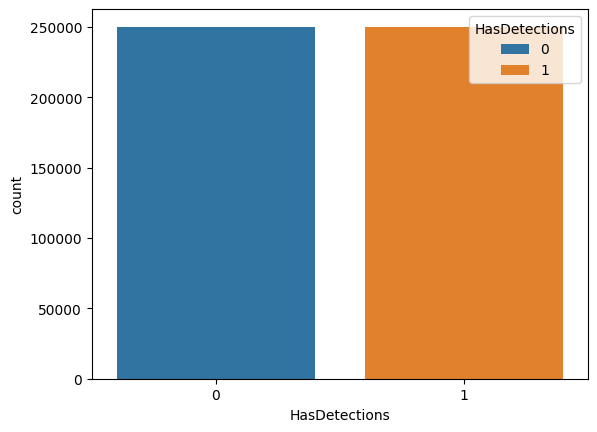

In [21]:
sns.countplot(data=df,x=TARGET,hue=TARGET);

# 3.- Estudio Univariable

#### 3.0- Atributo[0] - Census_OSInstallLanguageIdentifier

Atributo Numérico
El atributo 'Census_OSInstallLanguageIdentifier' tiene 3332 valores nulos (0.67%)

Descripción estadístiica:
count   496,668.00
mean         14.61
std          10.20
min           1.00
25%           8.00
50%           9.00
75%          20.00
max          39.00
Name: Census_OSInstallLanguageIdentifier, dtype: float64

El atributo tiene 39 valores únicos

TOP 10 porcentaje de valores únicos:
Census_OSInstallLanguageIdentifier
8.00    35.68
9.00    11.60
7.00     5.75
29.00    5.53
14.00    4.84
37.00    4.53
10.00    4.05
26.00    3.70
5.00     2.82
35.00    2.30
Name: proportion, dtype: float64


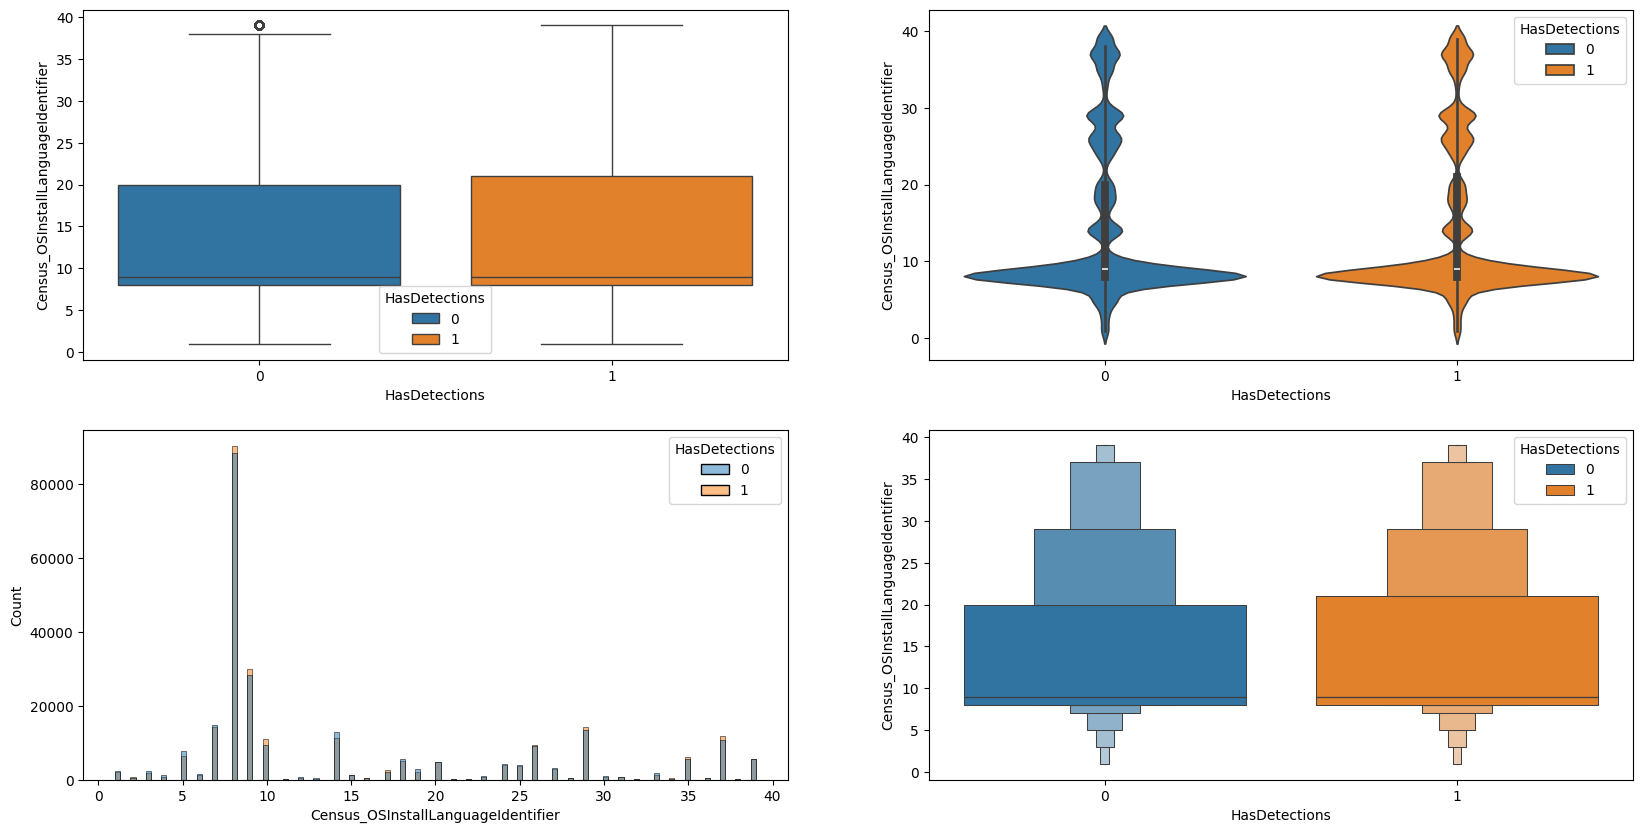

In [23]:
AnalisisAtributo(df,df.columns[0],tar=TARGET)

In [24]:
corr=df.iloc[:,0:2].corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

# Este atributo tiene una alta correlación con el atributo 'Census_OSUILocaleIdentifier' 
# debido a que uno indica el idioma del SO y el otro la localización del equipo.
# Como este atributo tiene nulos pero 'Census_OSUILocaleIdentifier' no, eliminaremos este.

In [25]:
# Creamos una lista de atributos a eliminar para poder tener continuidad con los indices.
columns_to_delete=[df.columns[0]]

In [26]:
columns_to_delete

['Census_OSInstallLanguageIdentifier']

#### 3.1- Atributo[1] - Census_OSUILocaleIdentifier

Atributo Numérico
El atributo 'Census_OSUILocaleIdentifier' tiene 0 valores nulos (0.0%)

Descripción estadístiica:
count   500,000.00
mean         60.45
std          45.00
min           1.00
25%          31.00
50%          34.00
75%          90.00
max         162.00
Name: Census_OSUILocaleIdentifier, dtype: float64

El atributo tiene 92 valores únicos

TOP 10 porcentaje de valores únicos:
Census_OSUILocaleIdentifier
31    35.60
34    11.66
30     5.76
125    5.60
49     4.88
158    4.59
35     4.18
119    3.74
26     2.82
148    2.32
Name: proportion, dtype: float64


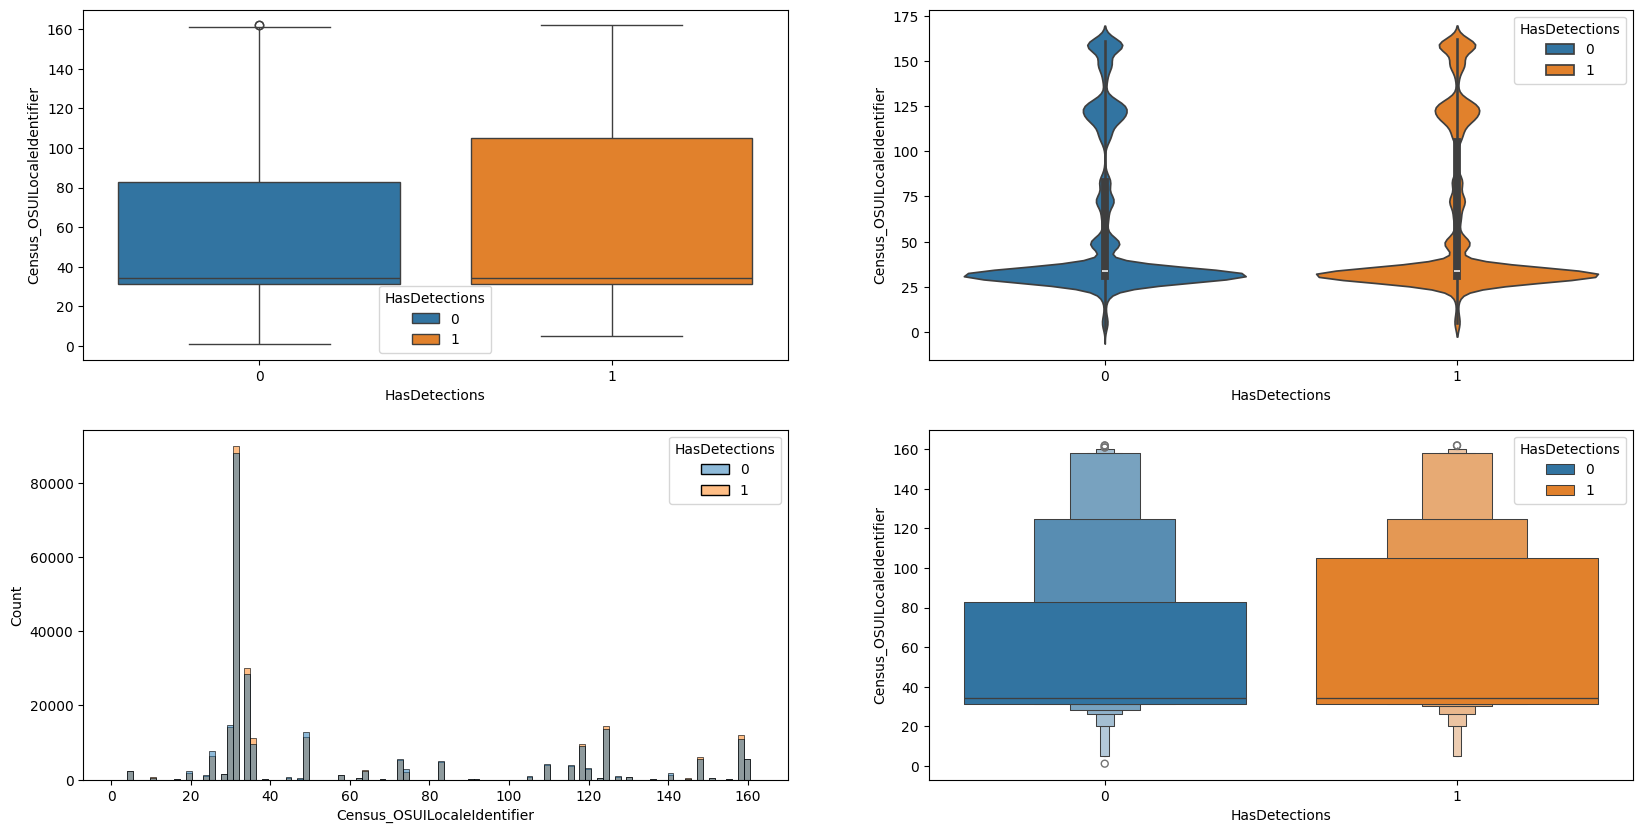

In [27]:
AnalisisAtributo(df,df.columns[1],tar=TARGET)

In [28]:
#Pasamos a int8 (0-256) para reducir carga de procesamiento
df['Census_OSUILocaleIdentifier']=df['Census_OSUILocaleIdentifier'].astype('int8')

#### 3.2- Atributo[2] - Census_OSWUAutoUpdateOptionsName

Atributo Categórico
El atributo 'Census_OSWUAutoUpdateOptionsName' tiene 0 valores nulos (0.0%)

Descripción estadístiica:

count       500000
unique           6
top       FullAuto
freq        222482
Name: Census_OSWUAutoUpdateOptionsName, dtype: object


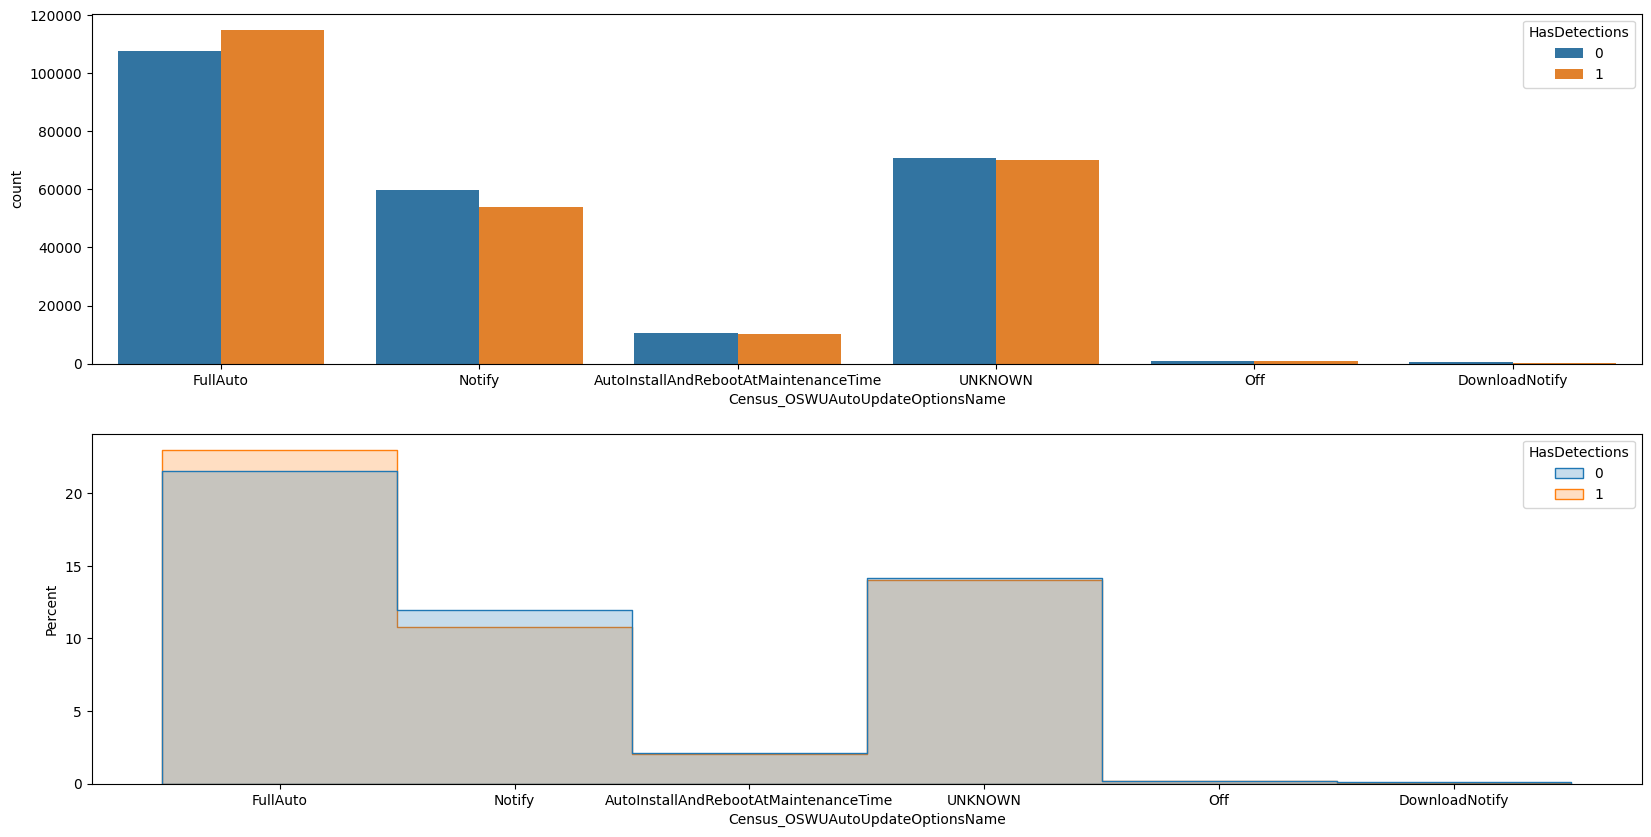

Equipos  Proporcion_Equipos  \
Census_OSWUAutoUpdateOptionsName                                     
FullAuto                                222482               44.50   
UNKNOWN                                 140961               28.19   
Notify                                  113507               22.70   
AutoInstallAndRebootAtMaintenanceTime    20731                4.15   
Off                                       1506                0.30   
DownloadNotify                             813                0.16   

                                       Infectados  Proporcion_Infectados  
Census_OSWUAutoUpdateOptionsName                                          
FullAuto                                   114807                  51.60  
UNKNOWN                                     70190                  49.79  
Notify                                      53867                  47.46  
AutoInstallAndRebootAtMaintenanceTime       10056                  48.51  
Off                                           732                  48.61  
DownloadNotify                                301                  37.02

In [29]:
AnalisisAtributo(df,df.columns[2],tar=TARGET)

In [30]:
group_list=('AutoInstallAndRebootAtMaintenanceTime', 'Off','DownloadNotify')

df['Census_OSWUAutoUpdateOptionsName']=df['Census_OSWUAutoUpdateOptionsName'].apply(lambda x: 'UNKNOWN' if (x in group_list) else x )

Atributo Categórico
El atributo 'Census_OSWUAutoUpdateOptionsName' tiene 0 valores nulos (0.0%)

Descripción estadístiica:

count       500000
unique           3
top       FullAuto
freq        222482
Name: Census_OSWUAutoUpdateOptionsName, dtype: object


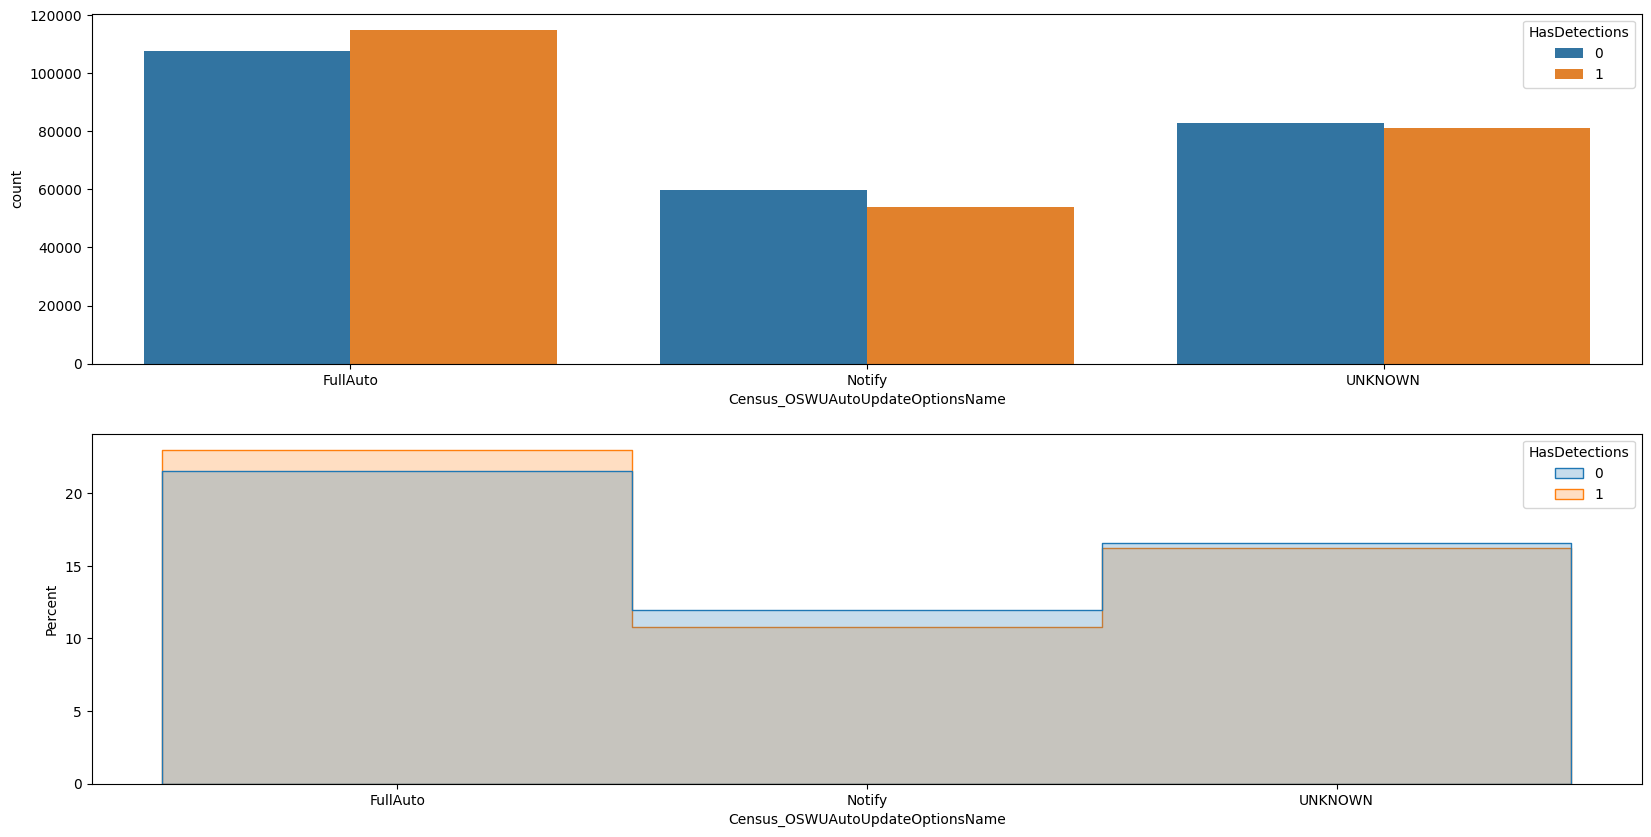

Equipos  Proporcion_Equipos  Infectados  \
Census_OSWUAutoUpdateOptionsName                                            
FullAuto                           222482               44.50      114807   
UNKNOWN                            164011               32.80       81279   
Notify                             113507               22.70       53867   

                                  Proporcion_Infectados  
Census_OSWUAutoUpdateOptionsName                         
FullAuto                                          51.60  
UNKNOWN                                           49.56  
Notify                                            47.46

In [31]:
AnalisisAtributo(df,df.columns[2],tar=TARGET)

#### 3.3- Atributo[3] - Census_IsPortableOperatingSystem

Atributo Numérico
El atributo 'Census_IsPortableOperatingSystem' tiene 0 valores nulos (0.0%)

Descripción estadístiica:
count   500,000.00
mean          0.00
std           0.02
min           0.00
25%           0.00
50%           0.00
75%           0.00
max           1.00
Name: Census_IsPortableOperatingSystem, dtype: float64

El atributo tiene 2 valores únicos

TOP 10 porcentaje de valores únicos:
Census_IsPortableOperatingSystem
0   99.95
1    0.05
Name: proportion, dtype: float64


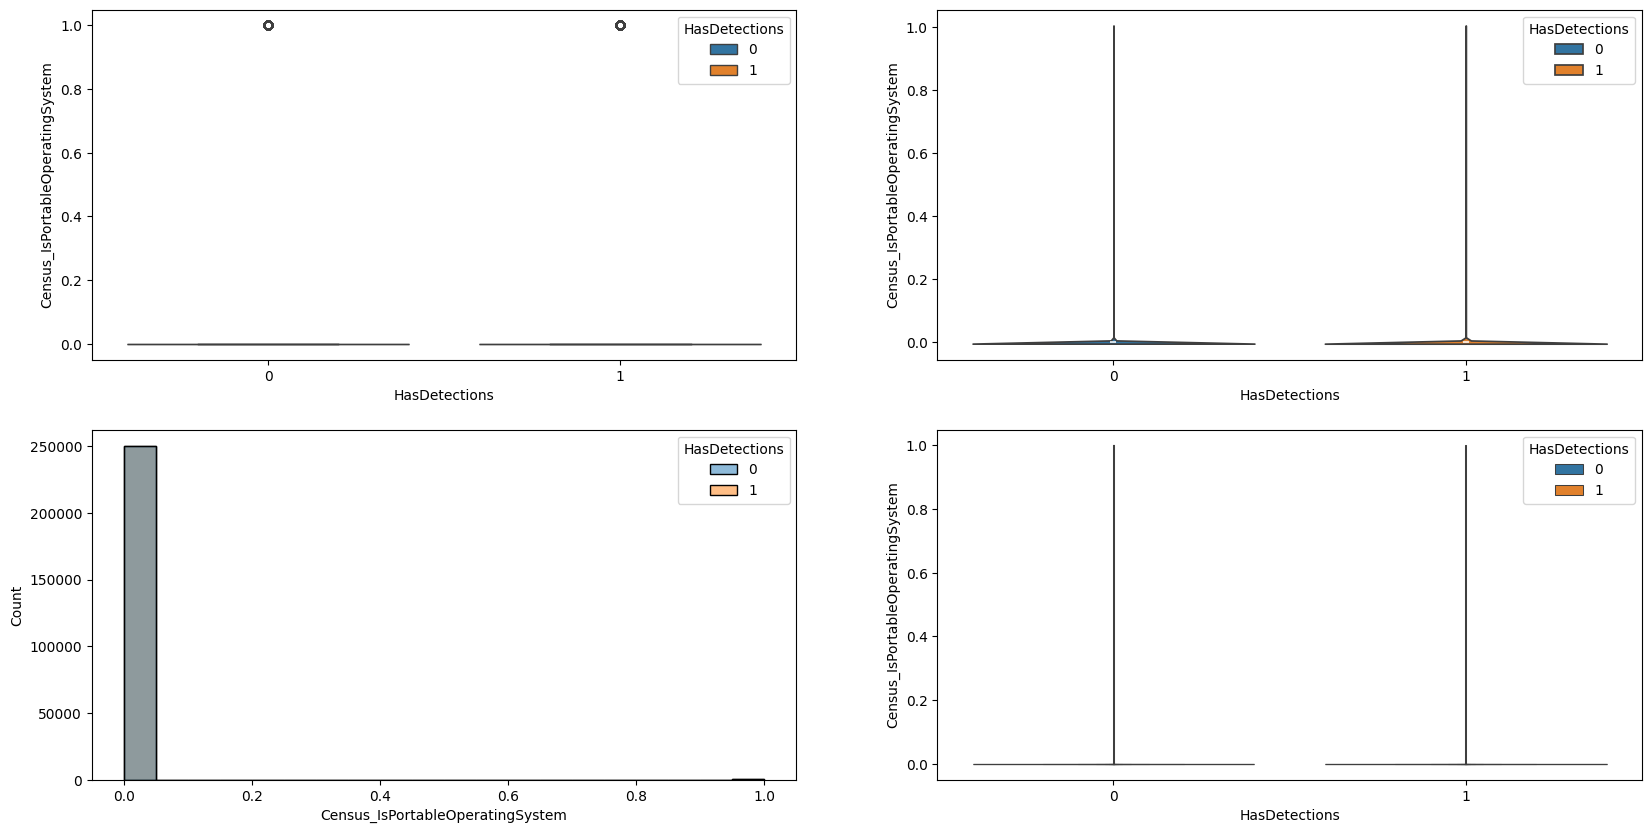

In [32]:
AnalisisAtributo(df,df.columns[3],tar=TARGET)

In [33]:
df.iloc[:,3].value_counts()

Census_IsPortableOperatingSystem
0    499739
1       261
Name: count, dtype: int64

In [34]:
#A la lista para eliminar.
columns_to_delete.append(df.columns[3])

#### 3.4- Atributo[4] - Census_GenuineStateName

Atributo Categórico
El atributo 'Census_GenuineStateName' tiene 0 valores nulos (0.0%)

Descripción estadístiica:

count         500000
unique             4
top       IS_GENUINE
freq          441402
Name: Census_GenuineStateName, dtype: object


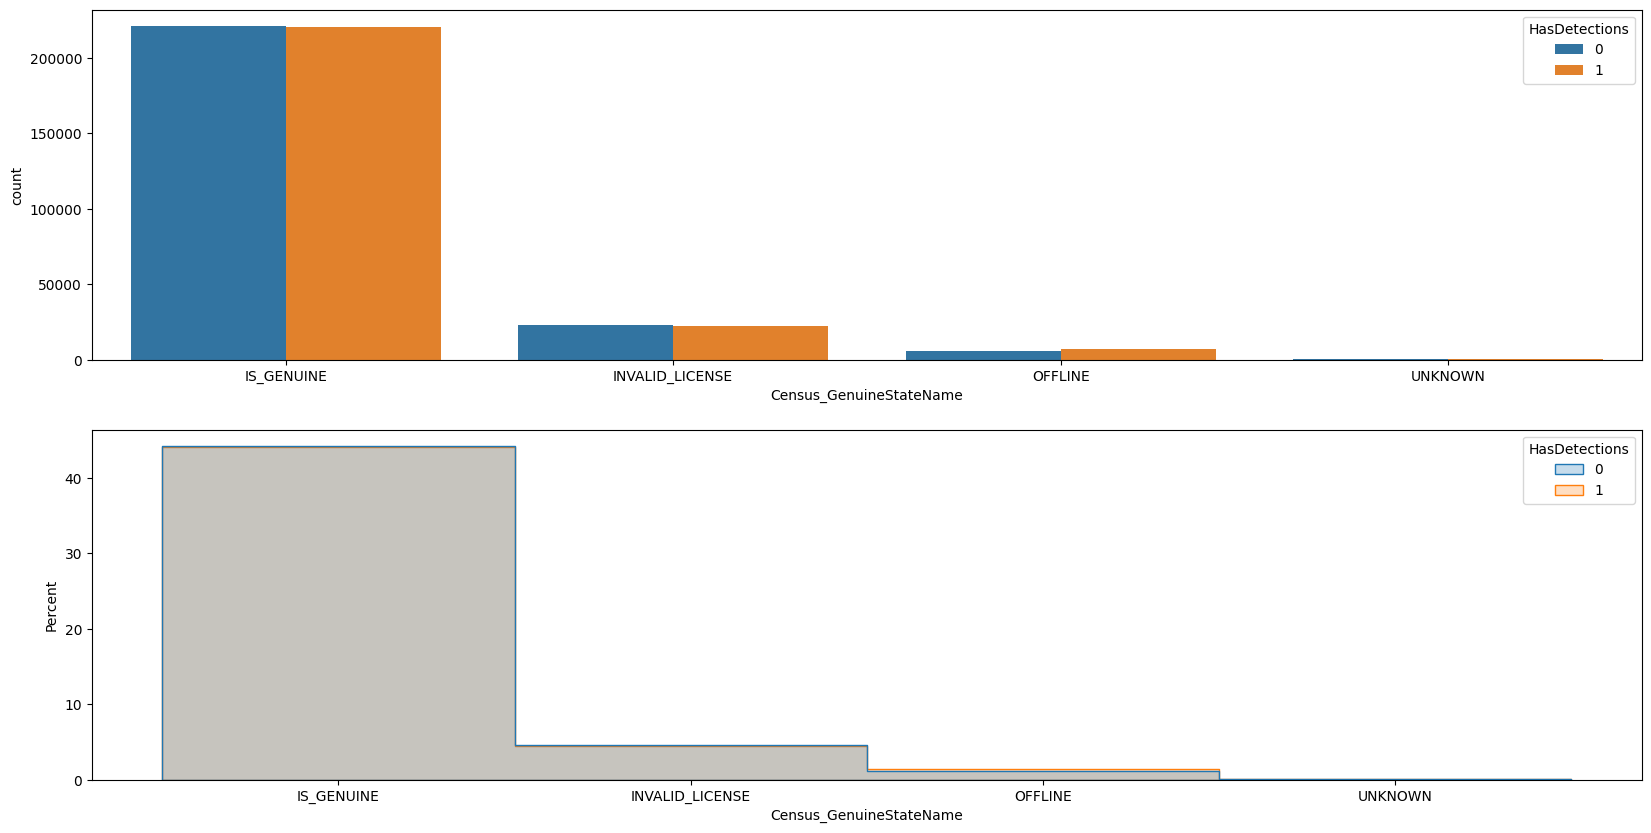

Equipos  Proporcion_Equipos  Infectados  \
Census_GenuineStateName                                            
IS_GENUINE                441402               88.28      220477   
INVALID_LICENSE            44990                9.00       22236   
OFFLINE                    12834                2.57        6994   
UNKNOWN                      774                0.15         246   

                         Proporcion_Infectados  
Census_GenuineStateName                         
IS_GENUINE                               49.95  
INVALID_LICENSE                          49.42  
OFFLINE                                  54.50  
UNKNOWN                                  31.78

In [35]:
AnalisisAtributo(df,df.columns[4],tar=TARGET)

In [36]:
# Agrupamos categorías minoritarias en 'INVALID_LICENSE'
df['Census_GenuineStateName']=df['Census_GenuineStateName'].apply(lambda x: 'INVALID_LICENSE' if (x != 'IS_GENUINE') else x)

Atributo Categórico
El atributo 'Census_GenuineStateName' tiene 0 valores nulos (0.0%)

Descripción estadístiica:

count         500000
unique             2
top       IS_GENUINE
freq          441402
Name: Census_GenuineStateName, dtype: object


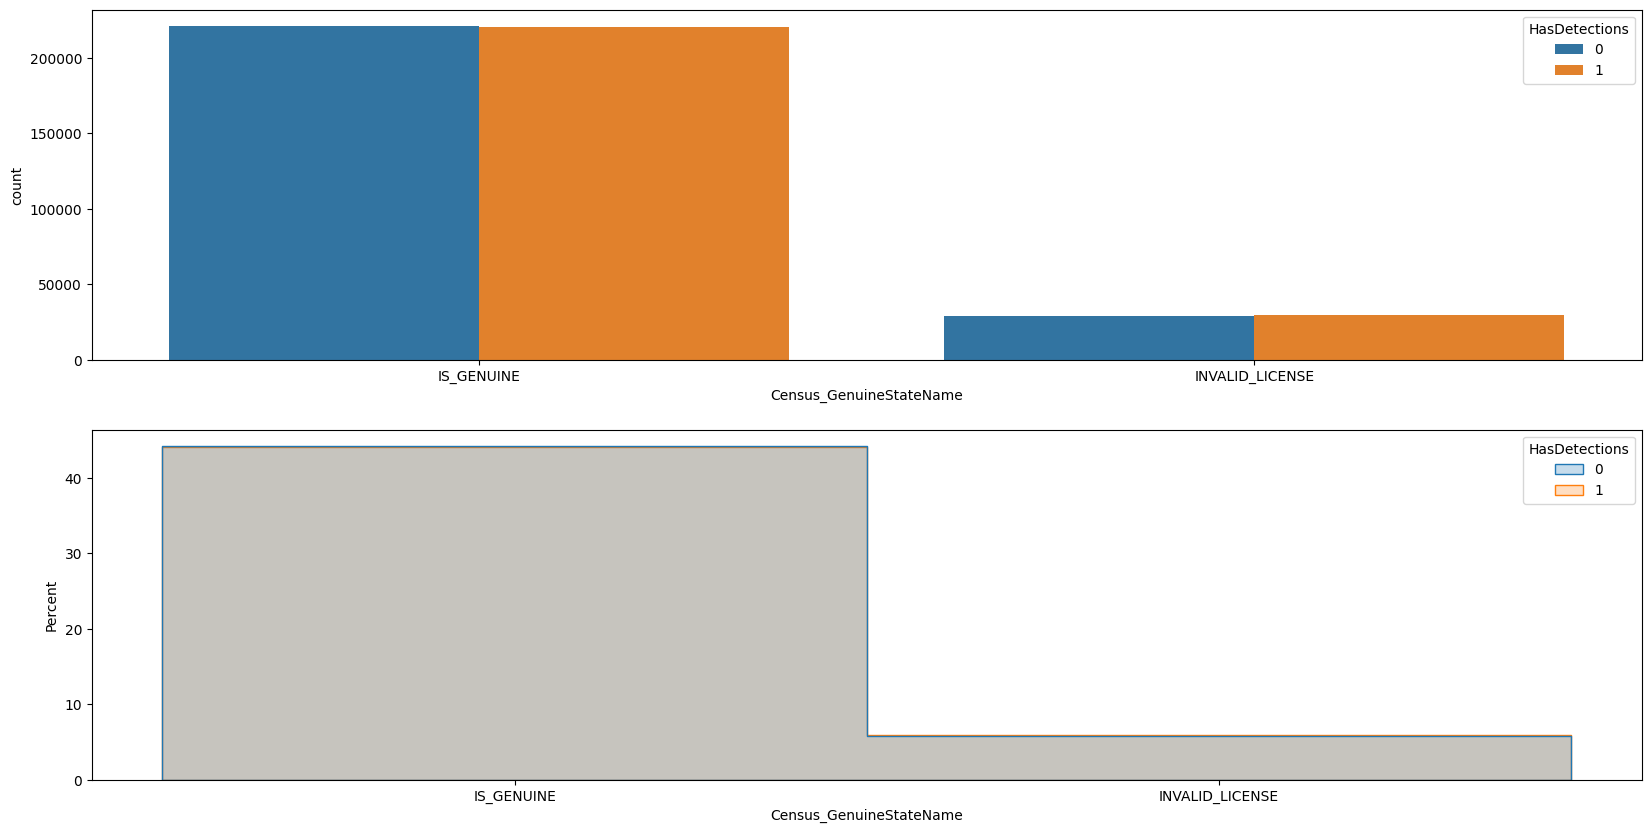

Equipos  Proporcion_Equipos  Infectados  \
Census_GenuineStateName                                            
IS_GENUINE                441402               88.28      220477   
INVALID_LICENSE            58598               11.72       29476   

                         Proporcion_Infectados  
Census_GenuineStateName                         
IS_GENUINE                               49.95  
INVALID_LICENSE                          50.30

In [37]:
AnalisisAtributo(df,df.columns[4],tar=TARGET)

#### 3.5- Atributo[5] - Census_ActivationChannel

Atributo Categórico
El atributo 'Census_ActivationChannel' tiene 0 valores nulos (0.0%)

Descripción estadístiica:

count     500000
unique         6
top       Retail
freq      264932
Name: Census_ActivationChannel, dtype: object


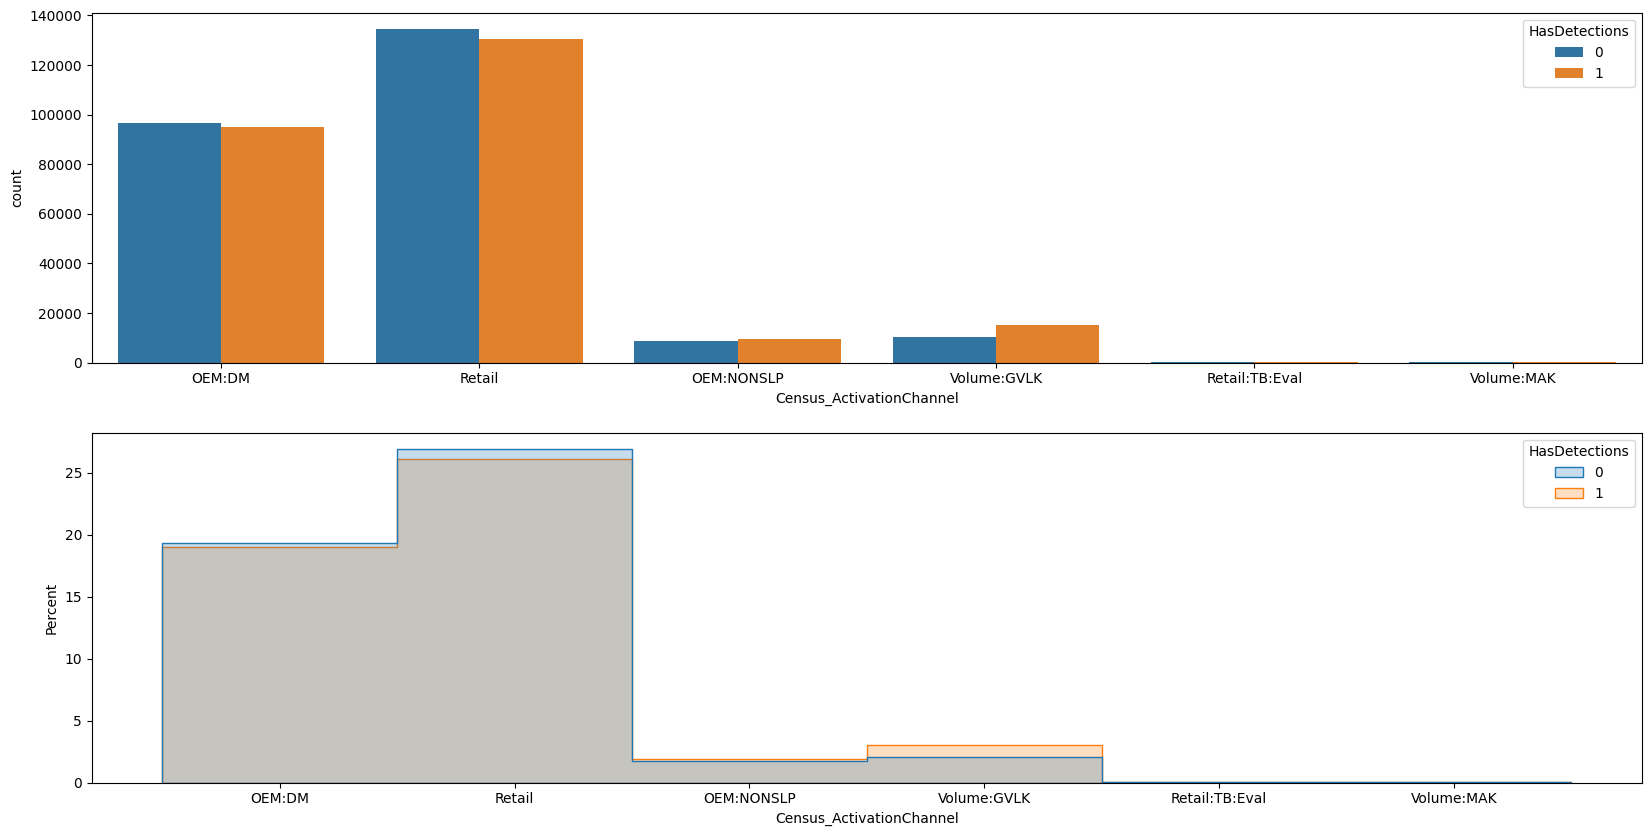

Equipos  Proporcion_Equipos  Infectados  \
Census_ActivationChannel                                            
Retail                     264932               52.99      130532   
OEM:DM                     191350               38.27       94880   
Volume:GVLK                 25109                5.02       14963   
OEM:NONSLP                  17943                3.59        9314   
Volume:MAK                    468                0.09         212   
Retail:TB:Eval                198                0.04          52   

                          Proporcion_Infectados  
Census_ActivationChannel                         
Retail                                    49.27  
OEM:DM                                    49.58  
Volume:GVLK                               59.59  
OEM:NONSLP                                51.91  
Volume:MAK                                45.30  
Retail:TB:Eval                            26.26

In [38]:
AnalisisAtributo(df,df.columns[5],tar=TARGET)

In [39]:
#Agrupamos por categorias principales
df['Census_ActivationChannel']=df['Census_ActivationChannel'].apply(lambda x: 'OEM' if x.startswith('OEM') else 'Volume' if x.startswith('Volume') else 'Retail')


Atributo Categórico
El atributo 'Census_ActivationChannel' tiene 0 valores nulos (0.0%)

Descripción estadístiica:

count     500000
unique         3
top       Retail
freq      265130
Name: Census_ActivationChannel, dtype: object


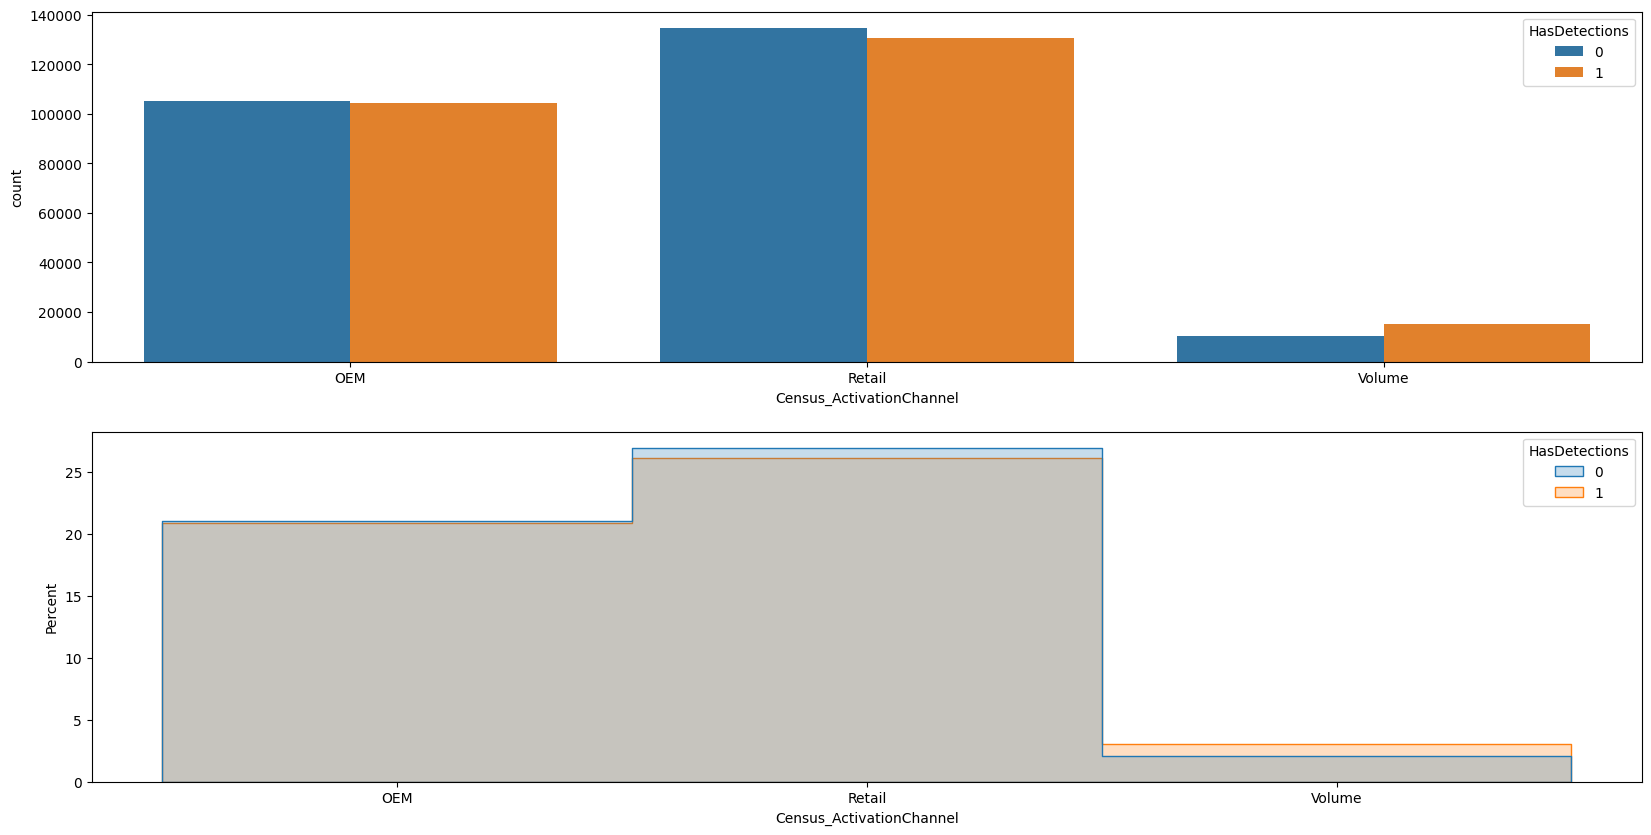

Equipos  Proporcion_Equipos  Infectados  \
Census_ActivationChannel                                            
Retail                     265130               53.03      130584   
OEM                        209293               41.86      104194   
Volume                      25577                5.12       15175   

                          Proporcion_Infectados  
Census_ActivationChannel                         
Retail                                    49.25  
OEM                                       49.78  
Volume                                    59.33

In [40]:
AnalisisAtributo(df,df.columns[5],tar=TARGET)

#### 3.6- Atributo[6] - Census_IsFlightingInternal

Atributo Numérico
El atributo 'Census_IsFlightingInternal' tiene 415225 valores nulos (83.04%)

Descripción estadístiica:
count   84,775.00
mean         0.00
std          0.00
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          1.00
Name: Census_IsFlightingInternal, dtype: float64

El atributo tiene 2 valores únicos

TOP 10 porcentaje de valores únicos:
Census_IsFlightingInternal
NaN    83.05
0.00   16.95
1.00    0.00
Name: proportion, dtype: float64


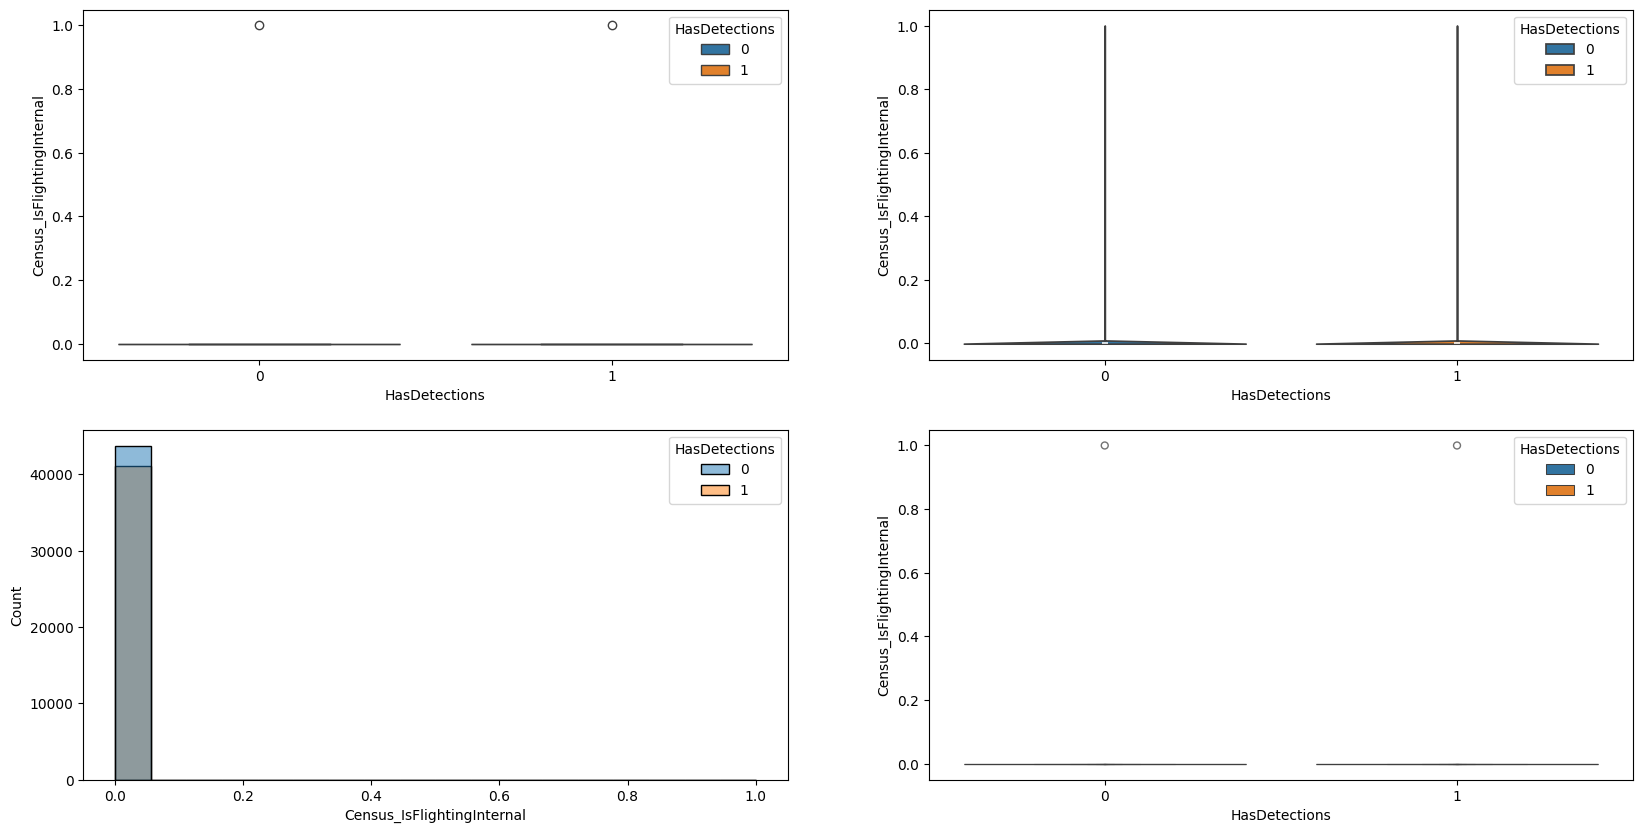

In [41]:
AnalisisAtributo(df,df.columns[6],tar=TARGET)

In [42]:
df.Census_IsFlightingInternal.value_counts()

Census_IsFlightingInternal
0.00    84773
1.00        2
Name: count, dtype: int64

In [43]:
columns_to_delete.append(df.columns[6])

#### 3.7- Atributo[7] - Census_IsFlightsDisabled

Atributo Numérico
El atributo 'Census_IsFlightsDisabled' tiene 8933 valores nulos (1.79%)

Descripción estadístiica:
count   491,067.00
mean          0.00
std           0.00
min           0.00
25%           0.00
50%           0.00
75%           0.00
max           1.00
Name: Census_IsFlightsDisabled, dtype: float64

El atributo tiene 2 valores únicos

TOP 10 porcentaje de valores únicos:
Census_IsFlightsDisabled
0.00   98.21
NaN     1.79
1.00    0.00
Name: proportion, dtype: float64


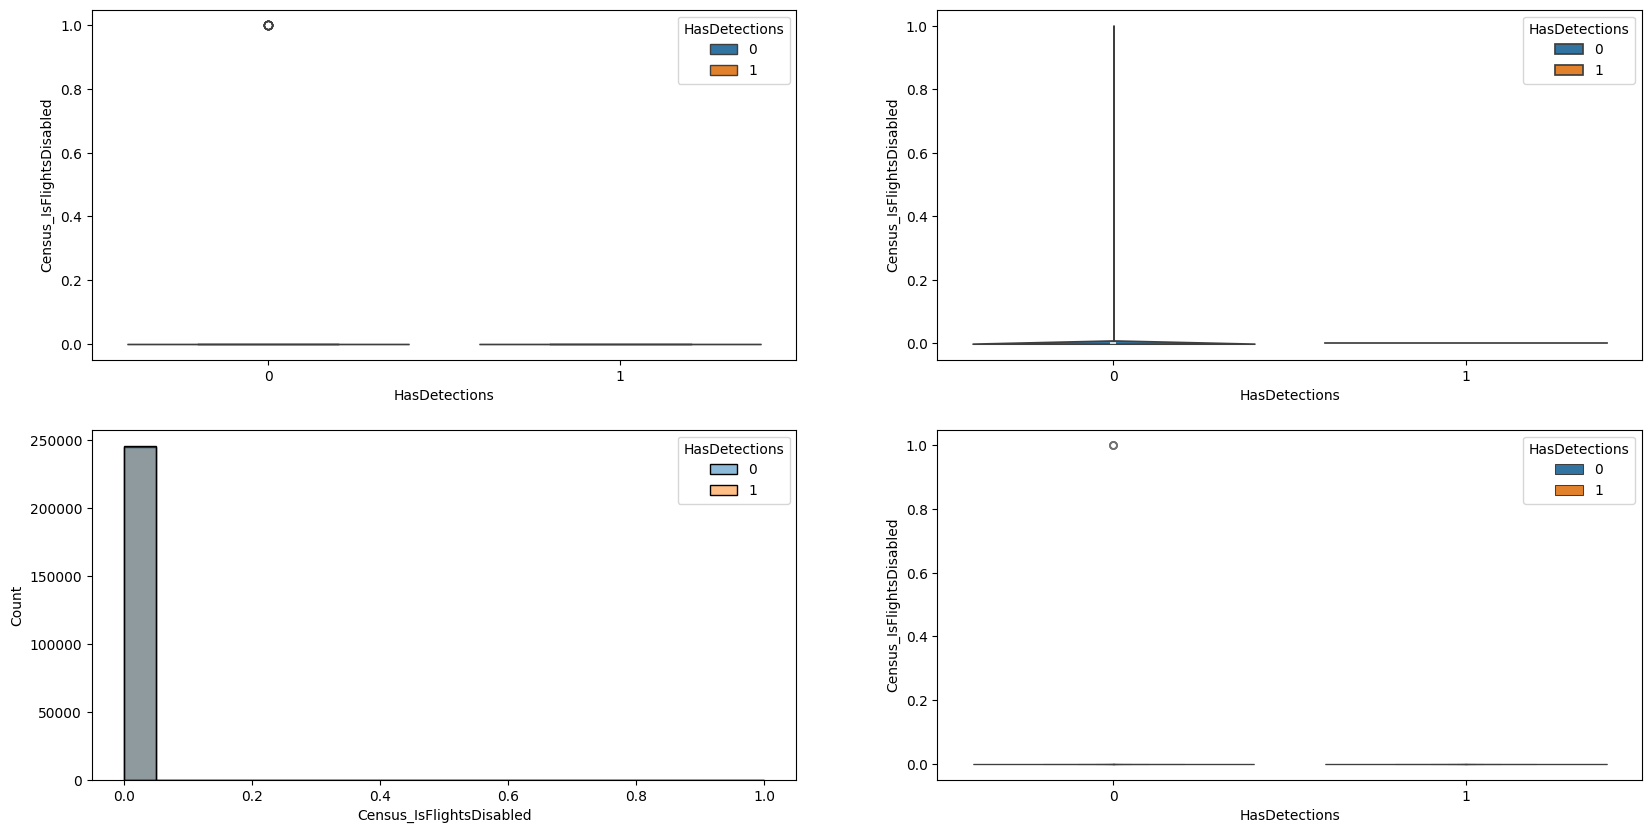

In [44]:
AnalisisAtributo(df,df.columns[7],tar=TARGET)

In [45]:
df.Census_IsFlightsDisabled.value_counts()

Census_IsFlightsDisabled
0.00    491060
1.00         7
Name: count, dtype: int64

In [46]:
columns_to_delete.append(df.columns[7])

#### 3.8- Atributo[8] - Census_FlightRing

Atributo Categórico
El atributo 'Census_FlightRing' tiene 0 valores nulos (0.0%)

Descripción estadístiica:

count     500000
unique         8
top       Retail
freq      468299
Name: Census_FlightRing, dtype: object


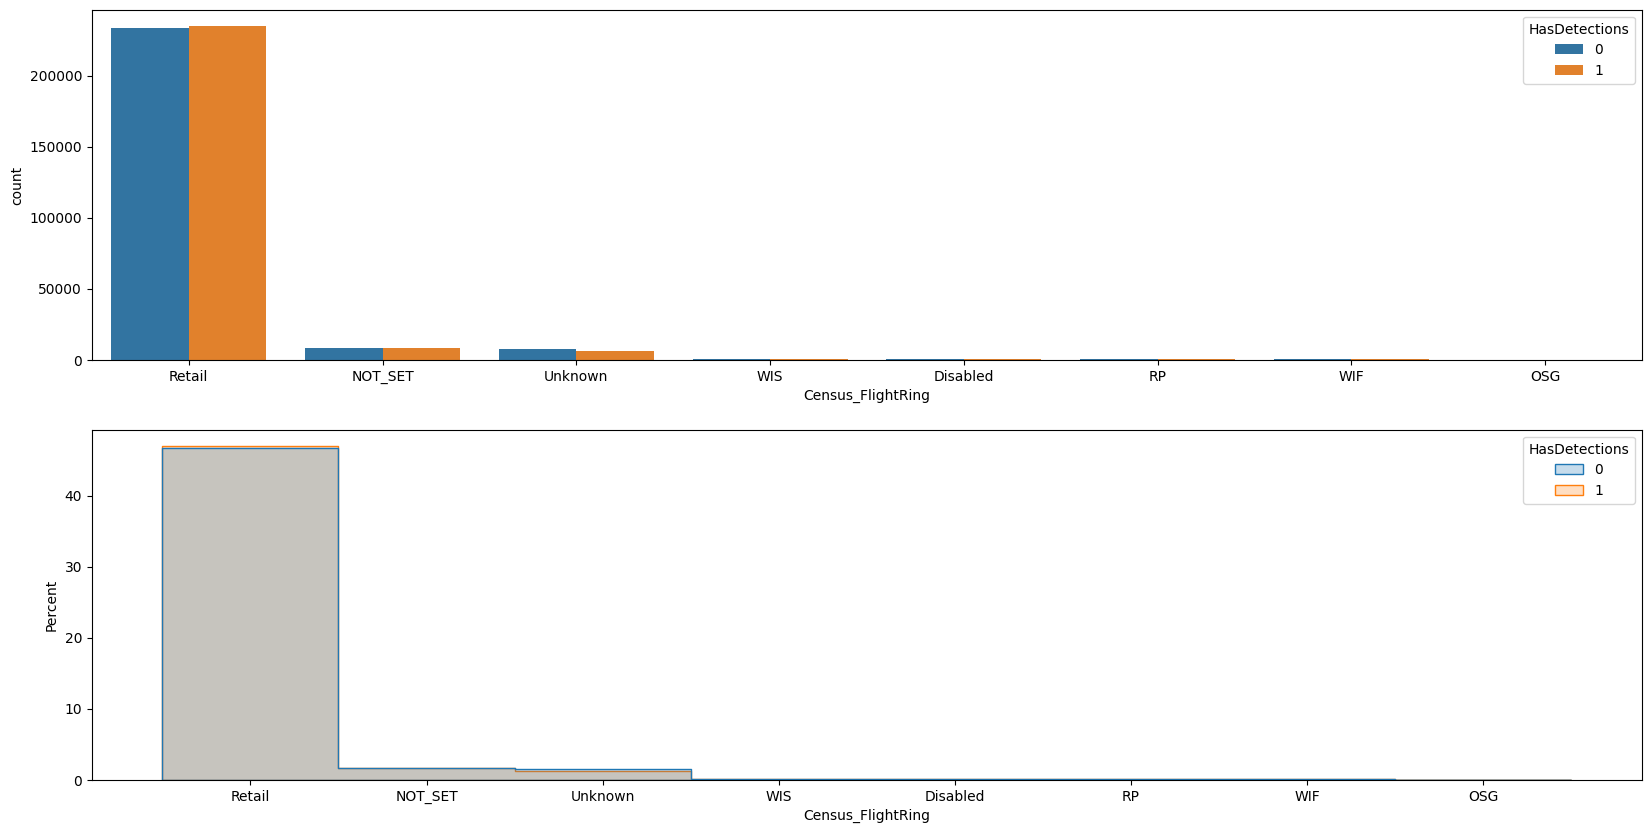

Equipos  Proporcion_Equipos  Infectados  \
Census_FlightRing                                            
Retail              468299               93.66      234693   
NOT_SET              16044                3.21        7980   
Unknown              13701                2.74        6378   
WIS                    606                0.12         250   
RP                     583                0.12         299   
WIF                    549                0.11         253   
Disabled               217                0.04         100   
OSG                      1                0.00           0   

                   Proporcion_Infectados  
Census_FlightRing                         
Retail                             50.12  
NOT_SET                            49.74  
Unknown                            46.55  
WIS                                41.25  
RP                                 51.29  
WIF                                46.08  
Disabled                           46.08  
OSG                                 0.00

In [47]:
AnalisisAtributo(df,df.columns[8],tar=TARGET)

In [48]:
columns_to_delete.append(df.columns[8])

#### 3.9- Atributo[9] - Census_ThresholdOptIn

Atributo Numérico
El atributo 'Census_ThresholdOptIn' tiene 318104 valores nulos (63.62%)

Descripción estadístiica:
count   181,896.00
mean          0.00
std           0.02
min           0.00
25%           0.00
50%           0.00
75%           0.00
max           1.00
Name: Census_ThresholdOptIn, dtype: float64

El atributo tiene 2 valores únicos

TOP 10 porcentaje de valores únicos:
Census_ThresholdOptIn
NaN    63.62
0.00   36.37
1.00    0.01
Name: proportion, dtype: float64


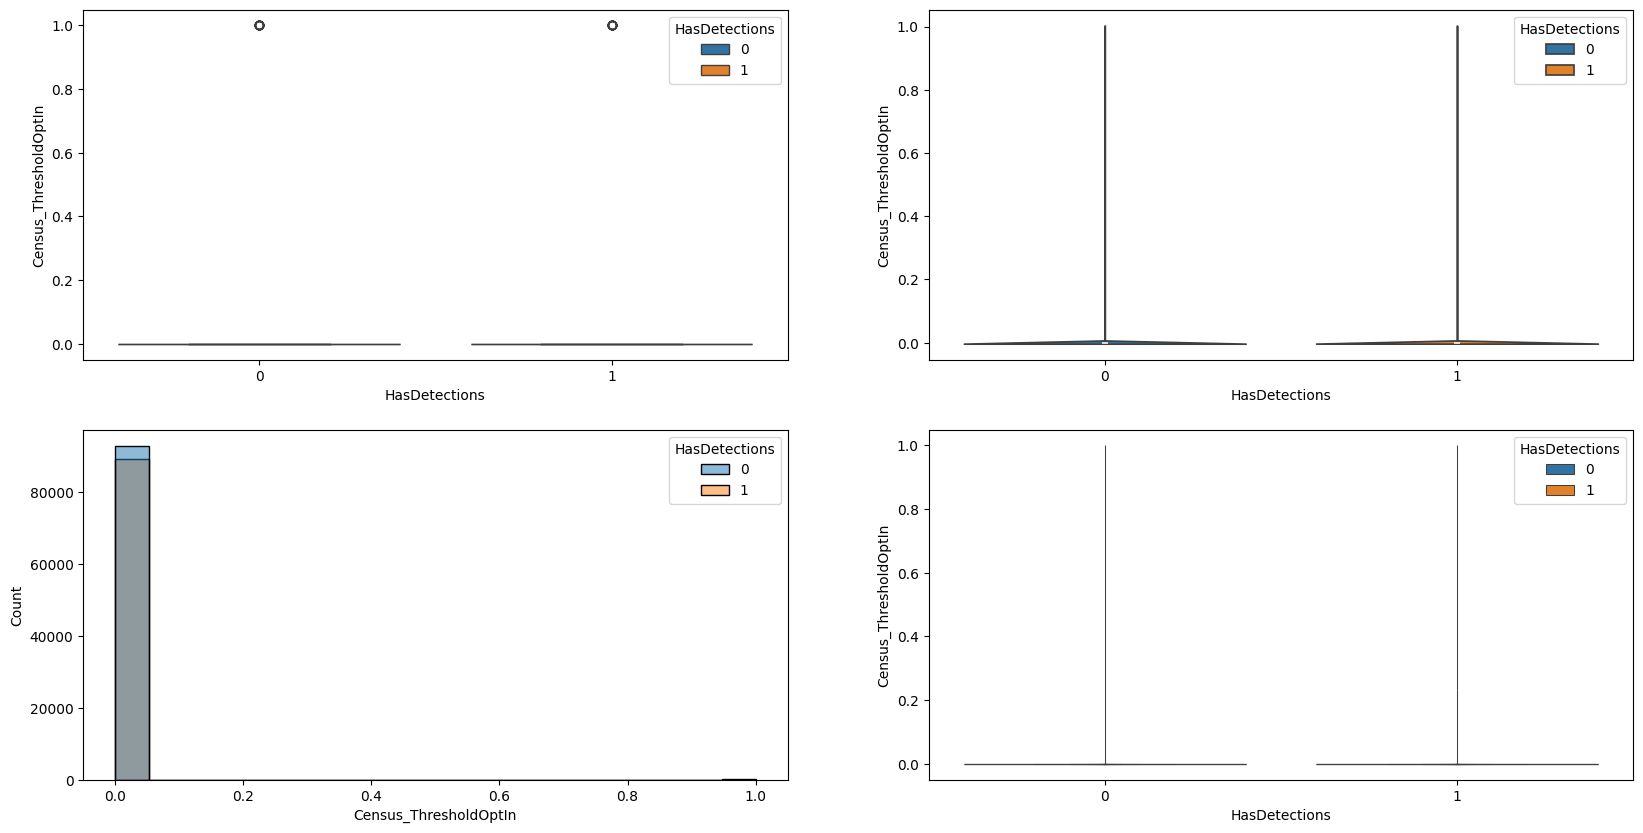

In [49]:
AnalisisAtributo(df,df.columns[9],tar=TARGET)

In [50]:
df.Census_ThresholdOptIn.value_counts()

Census_ThresholdOptIn
0.00    181849
1.00        47
Name: count, dtype: int64

In [51]:
columns_to_delete.append(df.columns[9])

#### 3.10- Atributo[10] - Census_FirmwareManufacturerIdentifier

Atributo Numérico
El atributo 'Census_FirmwareManufacturerIdentifier' tiene 10349 valores nulos (2.07%)

Descripción estadístiica:
count   489,651.00
mean        402.68
std         221.53
min          11.00
25%         142.00
50%         500.00
75%         556.00
max       1,084.00
Name: Census_FirmwareManufacturerIdentifier, dtype: float64

El atributo tiene 303 valores únicos

TOP 10 porcentaje de valores únicos:
Census_FirmwareManufacturerIdentifier
142.00   30.27
628.00   13.76
554.00   13.13
355.00   10.55
556.00    8.98
500.00    4.34
93.00     2.13
NaN       2.07
807.00    1.76
513.00    1.58
Name: proportion, dtype: float64


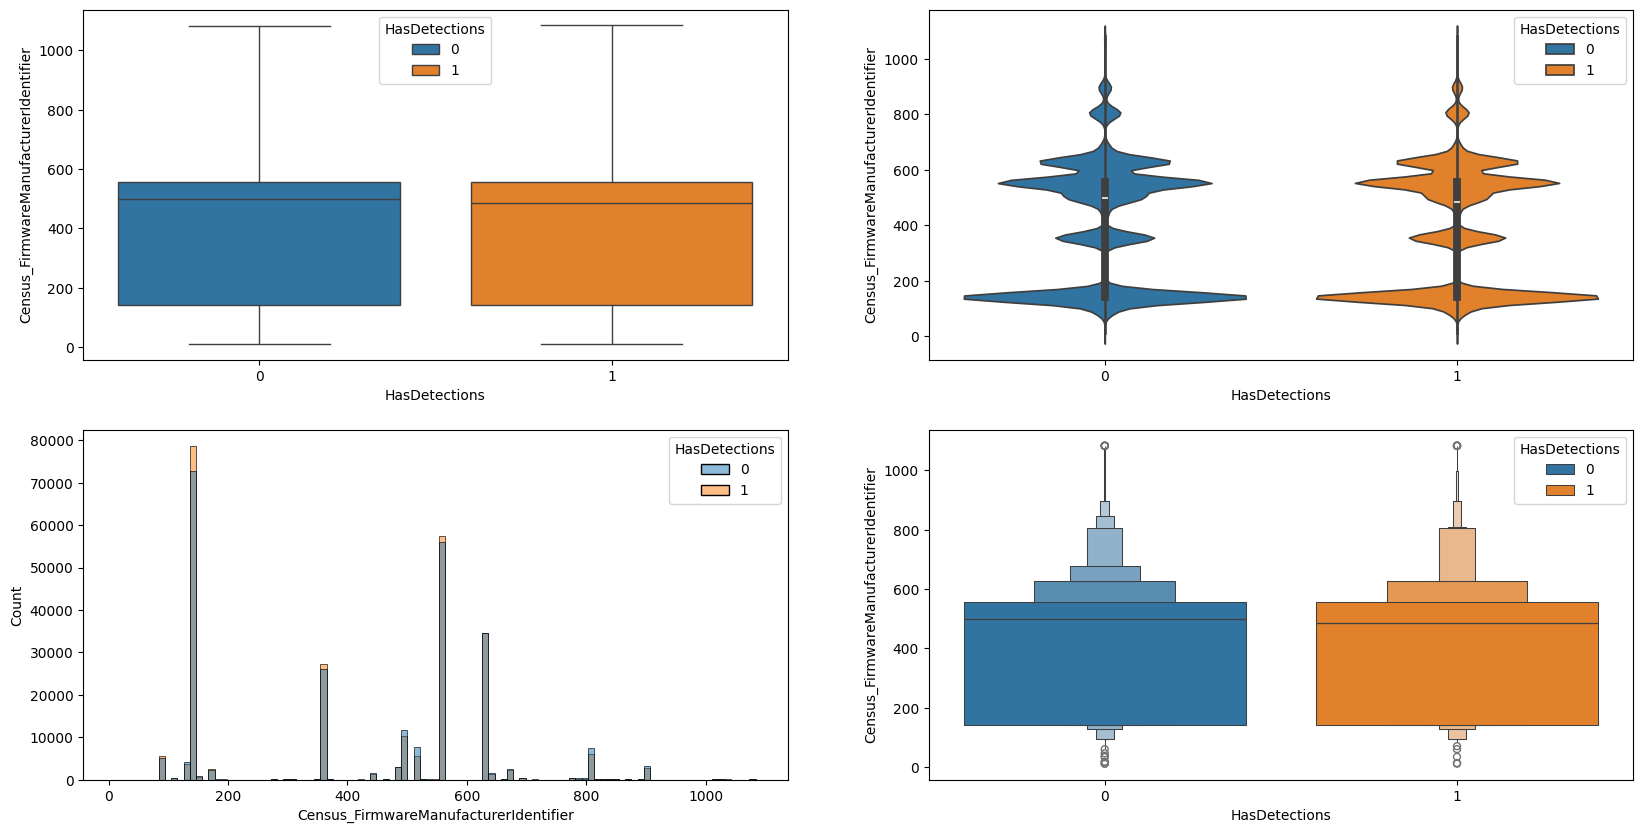

In [52]:
AnalisisAtributo(df,df.columns[10],tar=TARGET)

In [54]:
(df.Census_FirmwareManufacturerIdentifier.value_counts(normalize=True)*100).to_frame().head(15)

proportion
Census_FirmwareManufacturerIdentifier            
142.00                                      30.91
628.00                                      14.05
554.00                                      13.41
355.00                                      10.77
556.00                                       9.17
500.00                                       4.43
93.00                                        2.18
807.00                                       1.80
513.00                                       1.61
127.00                                       1.42
486.00                                       1.24
897.00                                       1.23
512.00                                       1.08
677.00                                       0.95
168.00                                       0.94

In [55]:
top4=(142,628,554,355)
df['Census_FirmwareManufacturerIdentifier']=df['Census_FirmwareManufacturerIdentifier'].apply(lambda x: 0 if (x not in top4) else x)
del(top4)

Atributo Numérico
El atributo 'Census_FirmwareManufacturerIdentifier' tiene 0 valores nulos (0.0%)

Descripción estadístiica:
count   500,000.00
mean        239.60
std         237.82
min           0.00
25%           0.00
50%         142.00
75%         554.00
max         628.00
Name: Census_FirmwareManufacturerIdentifier, dtype: float64

El atributo tiene 5 valores únicos

TOP 10 porcentaje de valores únicos:
Census_FirmwareManufacturerIdentifier
0.00     32.28
142.00   30.27
628.00   13.76
554.00   13.13
355.00   10.55
Name: proportion, dtype: float64


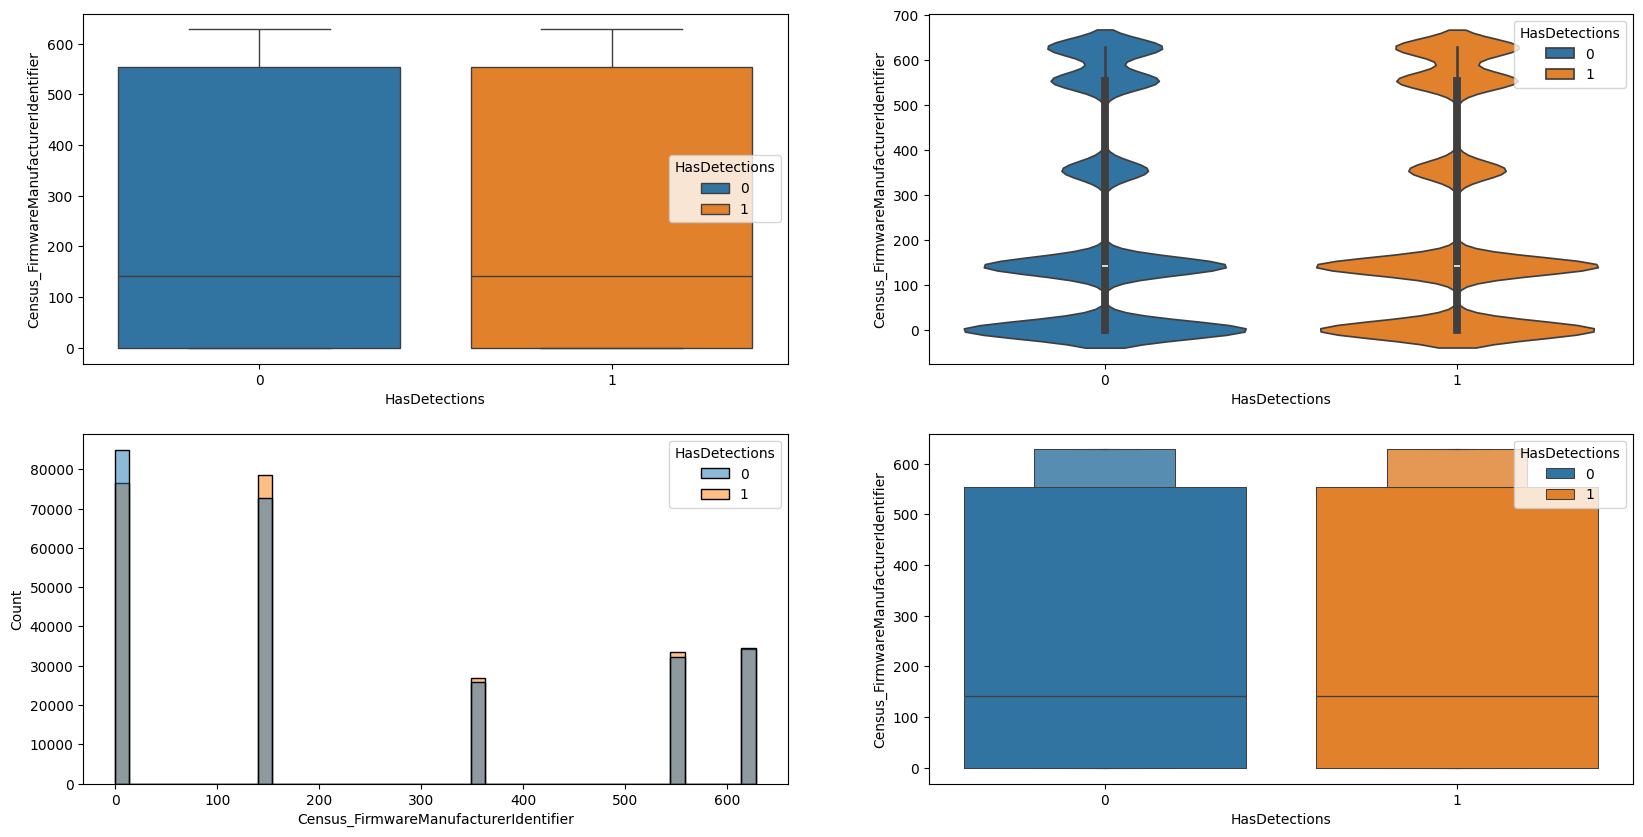

In [56]:
AnalisisAtributo(df,df.columns[10],tar=TARGET)

#### 3.11- Atributo[11] - Census_FirmwareVersionIdentifier

Atributo Numérico
El atributo 'Census_FirmwareVersionIdentifier' tiene 9061 valores nulos (1.81%)

Descripción estadístiica:
count   490,939.00
mean     33,030.99
std      21,220.16
min          10.00
25%      13,156.00
50%      33,070.00
75%      52,436.00
max      72,091.00
Name: Census_FirmwareVersionIdentifier, dtype: float64

El atributo tiene 23569 valores únicos

TOP 10 porcentaje de valores únicos:
Census_FirmwareVersionIdentifier
NaN         1.81
33,105.00   1.01
33,111.00   0.67
33,054.00   0.62
33,108.00   0.61
63,175.00   0.59
11,778.00   0.59
33,115.00   0.58
63,155.00   0.56
33,060.00   0.54
Name: proportion, dtype: float64


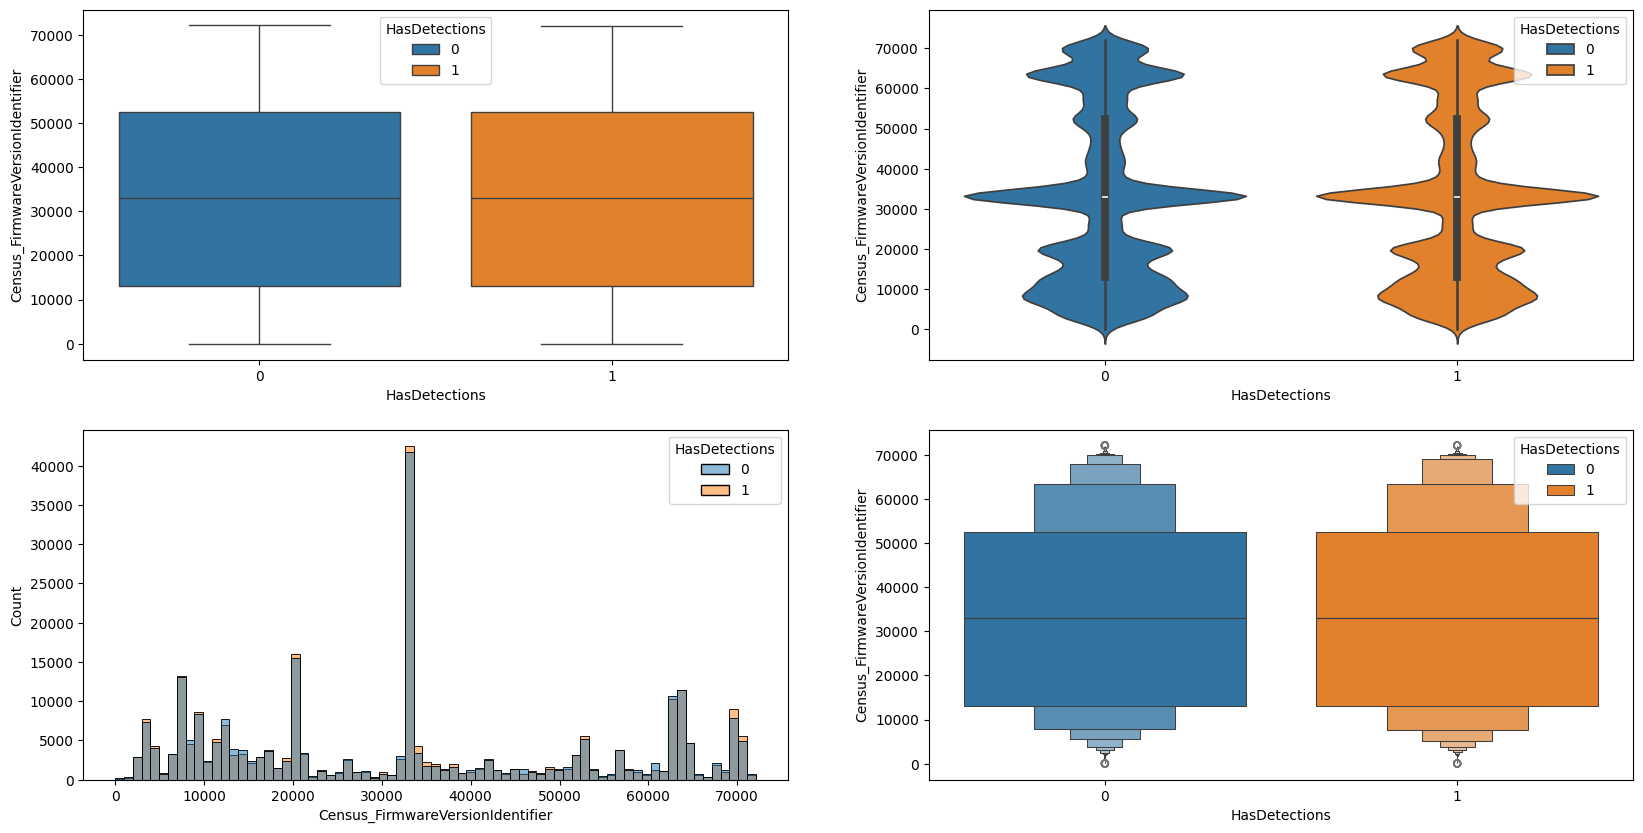

In [57]:
AnalisisAtributo(df,df.columns[11],tar=TARGET)

In [58]:
df['Census_FirmwareVersionIdentifier'].value_counts()

Census_FirmwareVersionIdentifier
33,105.00    5036
33,111.00    3356
33,054.00    3124
33,108.00    3071
63,175.00    2968
             ... 
41,482.00       1
41,752.00       1
20,762.00       1
15,577.00       1
54,497.00       1
Name: count, Length: 23569, dtype: int64

In [59]:
corr=df[['Census_FirmwareManufacturerIdentifier','Census_FirmwareVersionIdentifier']].corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

# Los atributos Census_FirmwareManufacturerIdentifier y Census_FirmwareVersionIdentifier pese a que estén
# relacionados, no presentan demasiada correlación entre ellos.

In [60]:
mode=df['Census_FirmwareVersionIdentifier'].mode()[0]
mode

33105.0

In [61]:
df['Census_FirmwareVersionIdentifier'].fillna(mode,inplace=True)
#bmw5.tipo_coche.fillna('otros',inplace=True)

In [62]:
df.Census_FirmwareVersionIdentifier.isna().sum()

0

In [63]:
df['Census_FirmwareVersionIdentifier']=df['Census_FirmwareVersionIdentifier'].astype(int)

In [64]:
df['Census_FirmwareVersionIdentifier']=df['Census_FirmwareVersionIdentifier'].apply(lambda x: 0 if x<10000 \
    else 10 if (x in range(10000,19999)) else 20 if (x in range(20000,29999)) else\
    30 if (x in range(30000,39999)) else 40 if (x in range(40000,49999)) else 50 if (x in range(50000,59999)) else\
    60 if (x in range(60000,69999)) else 70)    

In [65]:
df.Census_FirmwareVersionIdentifier.sample(10)

1bb629b889620f3436114201dbd653a9     0
df3bec2b46668cad2a6d0f45bd25727d    20
a24f9f48e1fdcdec0fb706cb3ae0e20c    70
7b09d8b652b0c7d97f193a30bbb06a3b    10
ef8b72a5752ceaff3d76048f4bbef1ca    10
7283d5184460bfcbe28033096a4c1635     0
d554cec88db4a60c246d998ee958221f    50
68c4535fc23c1fea449f7069e002e432     0
d086e683d23e2bdc2da72c60cdb84c81    60
7ab804ada8d55e6ed75e228946ecc510    60
Name: Census_FirmwareVersionIdentifier, dtype: int64

Atributo Numérico
El atributo 'Census_FirmwareVersionIdentifier' tiene 0 valores nulos (0.0%)

Descripción estadístiica:
count   500,000.00
mean         28.35
std          21.65
min           0.00
25%          10.00
50%          30.00
75%          50.00
max          70.00
Name: Census_FirmwareVersionIdentifier, dtype: float64

El atributo tiene 8 valores únicos

TOP 10 porcentaje de valores únicos:
Census_FirmwareVersionIdentifier
30   24.92
0    18.34
10   17.89
60   16.31
50    7.94
20    6.73
40    5.09
70    2.79
Name: proportion, dtype: float64


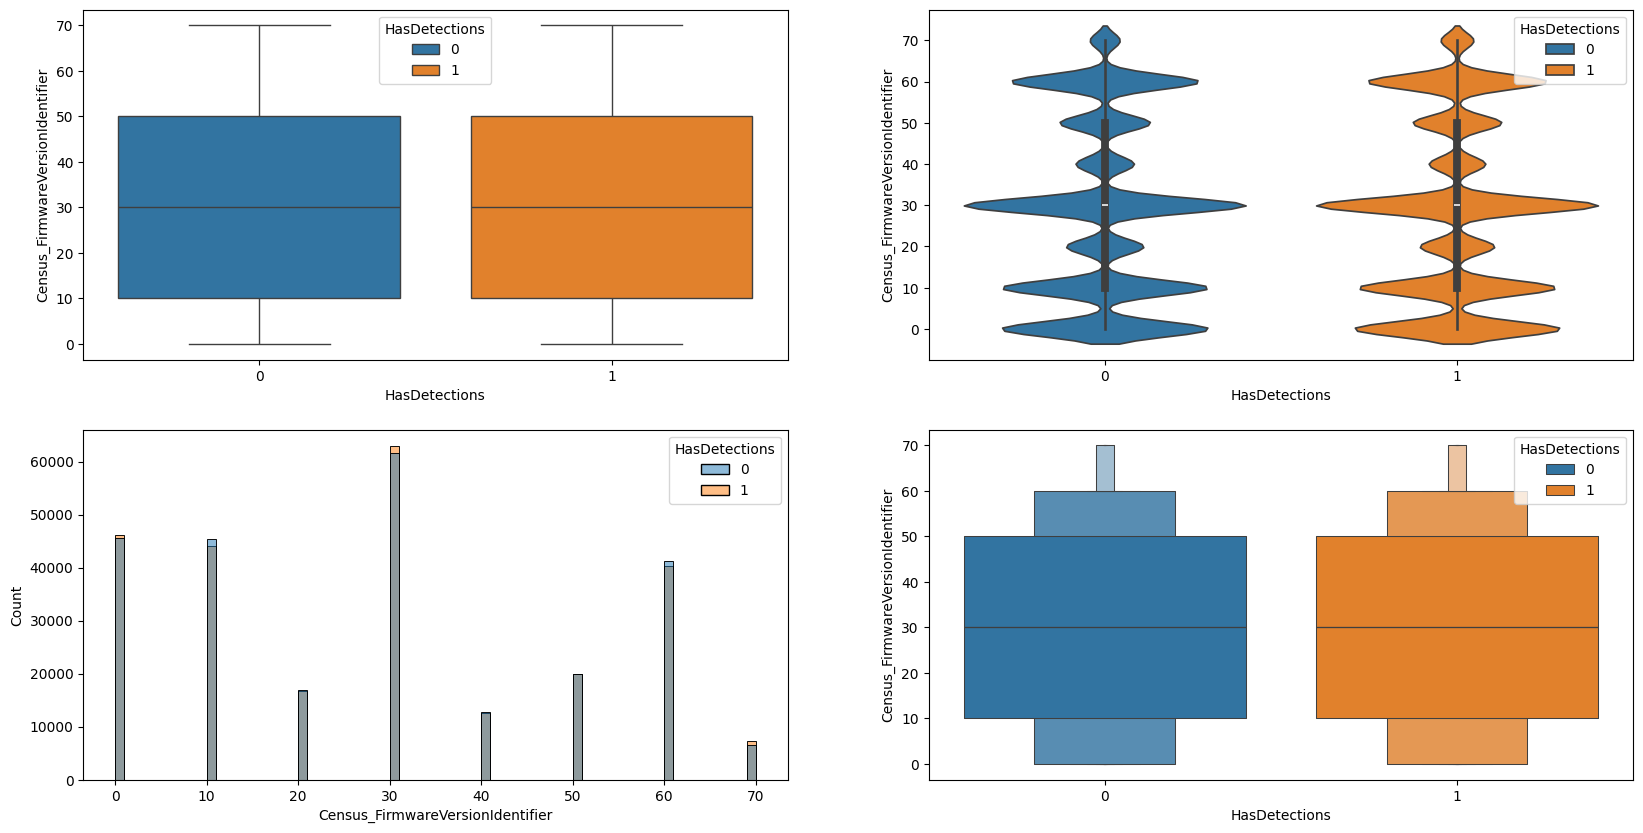

In [66]:
AnalisisAtributo(df, df.columns[11],tar=TARGET)

In [67]:
df.Census_FirmwareVersionIdentifier.info()

<class 'pandas.core.series.Series'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Series name: Census_FirmwareVersionIdentifier
Non-Null Count   Dtype
--------------   -----
500000 non-null  int64
dtypes: int64(1)
memory usage: 23.8+ MB


#### 3.12- Atributo[12] - Census_IsSecureBootEnabled

Atributo Numérico
El atributo 'Census_IsSecureBootEnabled' tiene 0 valores nulos (0.0%)

Descripción estadístiica:
count   500,000.00
mean          0.49
std           0.50
min           0.00
25%           0.00
50%           0.00
75%           1.00
max           1.00
Name: Census_IsSecureBootEnabled, dtype: float64

El atributo tiene 2 valores únicos

TOP 10 porcentaje de valores únicos:
Census_IsSecureBootEnabled
0   51.46
1   48.54
Name: proportion, dtype: float64


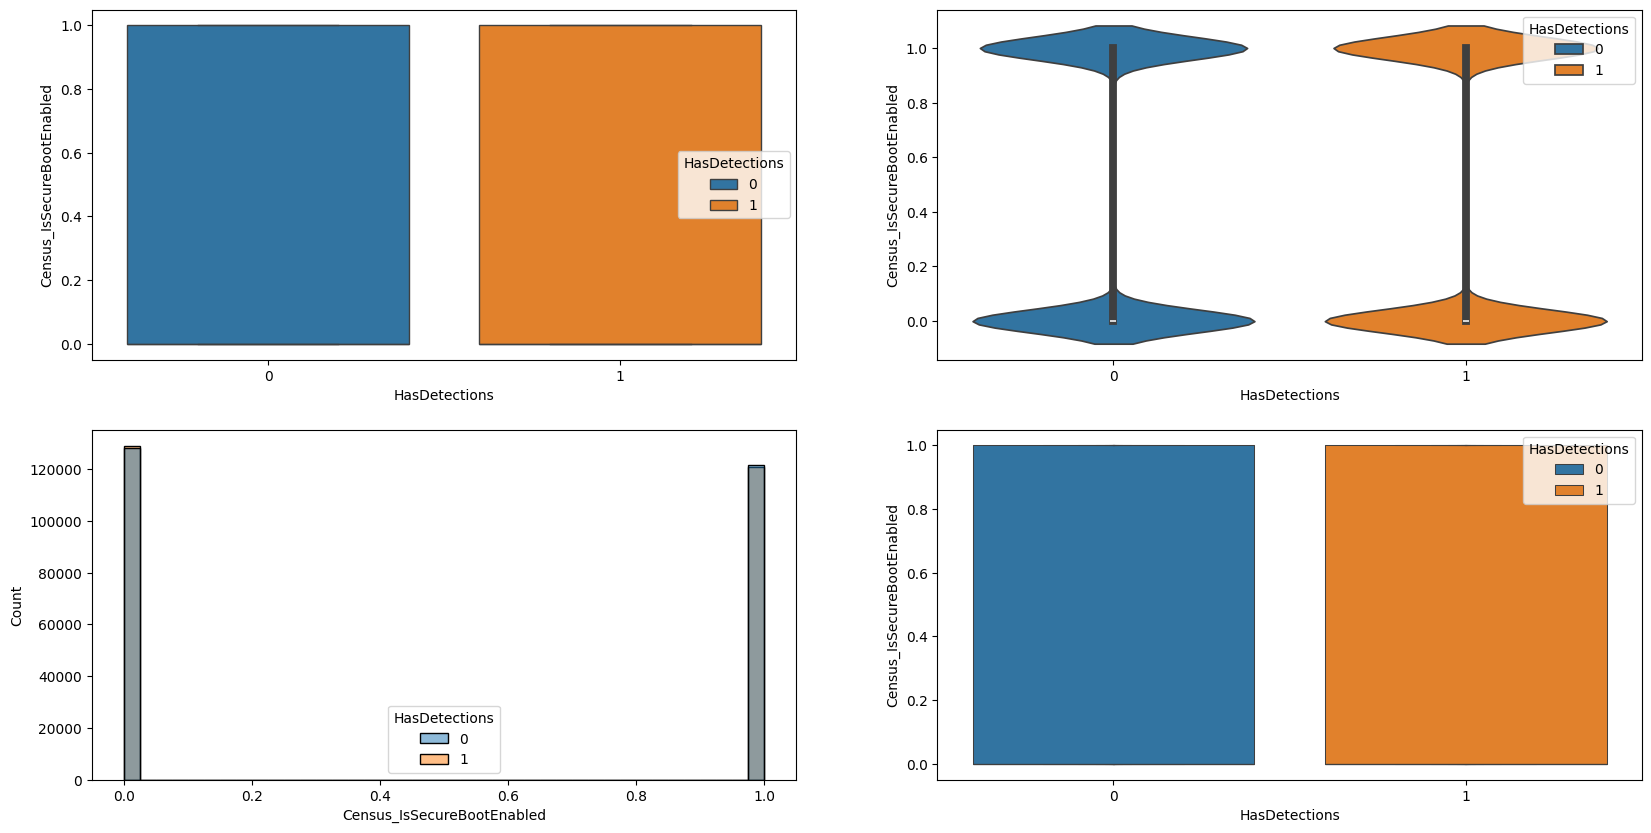

In [68]:
AnalisisAtributo(df,df.columns[12],tar=TARGET)

In [69]:
df.Census_IsSecureBootEnabled.value_counts()

Census_IsSecureBootEnabled
0    257281
1    242719
Name: count, dtype: int64

#### 3.13- Atributo[13] - Census_IsWIMBootEnabled

Atributo Numérico
El atributo 'Census_IsWIMBootEnabled' tiene 317666 valores nulos (63.53%)

Descripción estadístiica:
count   182,334.00
mean          0.00
std           0.00
min           0.00
25%           0.00
50%           0.00
75%           0.00
max           0.00
Name: Census_IsWIMBootEnabled, dtype: float64

El atributo tiene 1 valores únicos

TOP 10 porcentaje de valores únicos:
Census_IsWIMBootEnabled
NaN    63.53
0.00   36.47
Name: proportion, dtype: float64


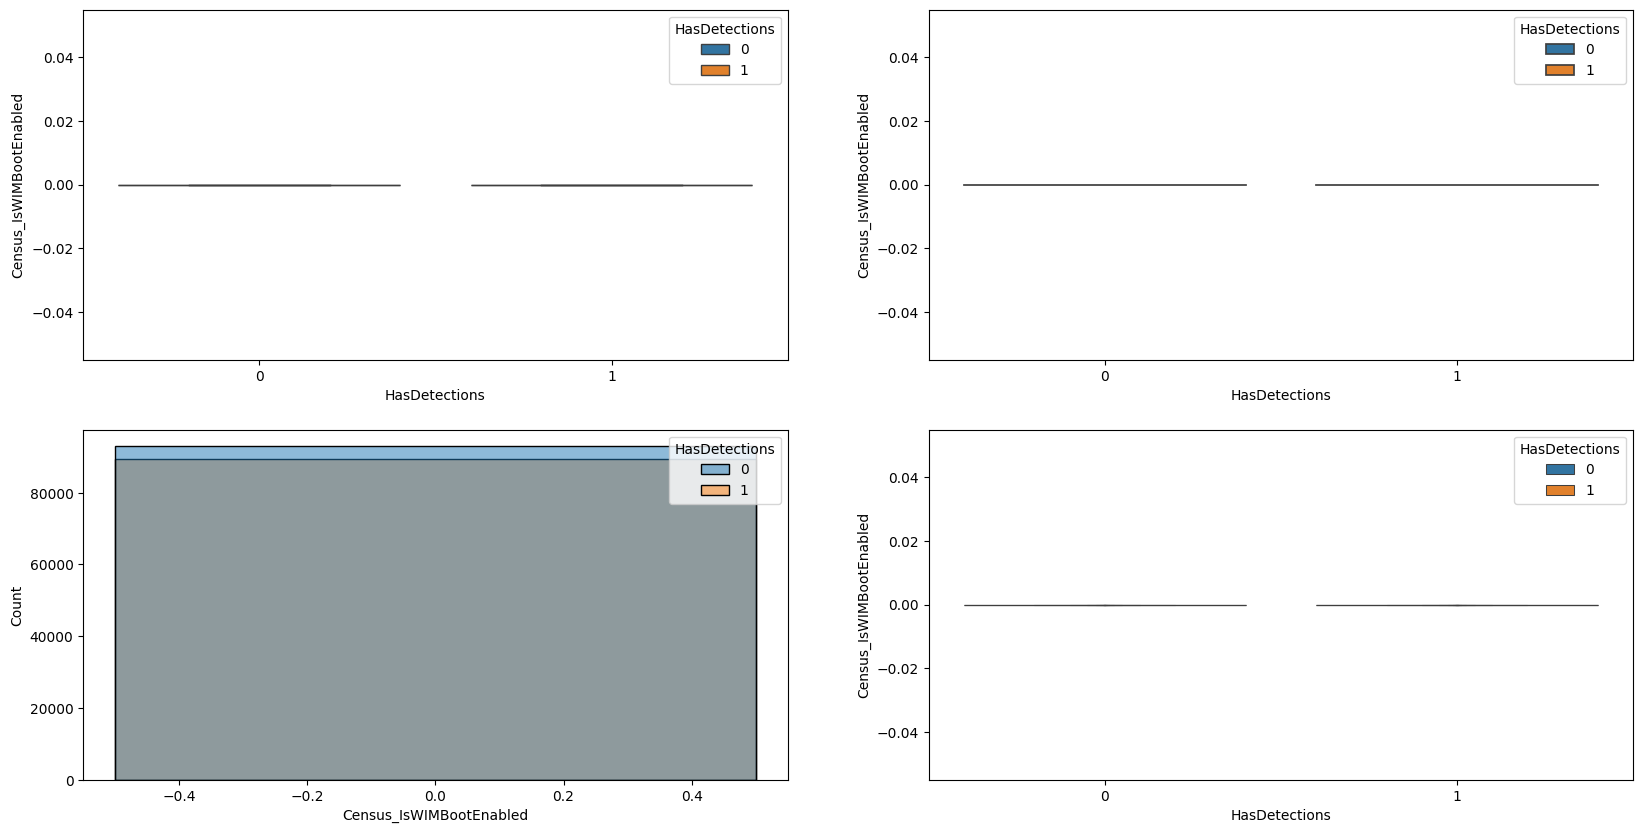

In [70]:
AnalisisAtributo(df,df.columns[13],tar=TARGET)

In [71]:
df.Census_IsWIMBootEnabled.value_counts()

Census_IsWIMBootEnabled
0.00    182334
Name: count, dtype: int64

In [72]:
columns_to_delete.append(df.columns[13])

In [73]:
columns_to_delete

['Census_OSInstallLanguageIdentifier',
 'Census_IsPortableOperatingSystem',
 'Census_IsFlightingInternal',
 'Census_IsFlightsDisabled',
 'Census_FlightRing',
 'Census_ThresholdOptIn',
 'Census_IsWIMBootEnabled']

#### 3.14- Atributo[14] - Census_IsVirtualDevice

Atributo Numérico
El atributo 'Census_IsVirtualDevice' tiene 901 valores nulos (0.18%)

Descripción estadístiica:
count   499,099.00
mean          0.01
std           0.08
min           0.00
25%           0.00
50%           0.00
75%           0.00
max           1.00
Name: Census_IsVirtualDevice, dtype: float64

El atributo tiene 2 valores únicos

TOP 10 porcentaje de valores únicos:
Census_IsVirtualDevice
0.00   99.11
1.00    0.71
NaN     0.18
Name: proportion, dtype: float64


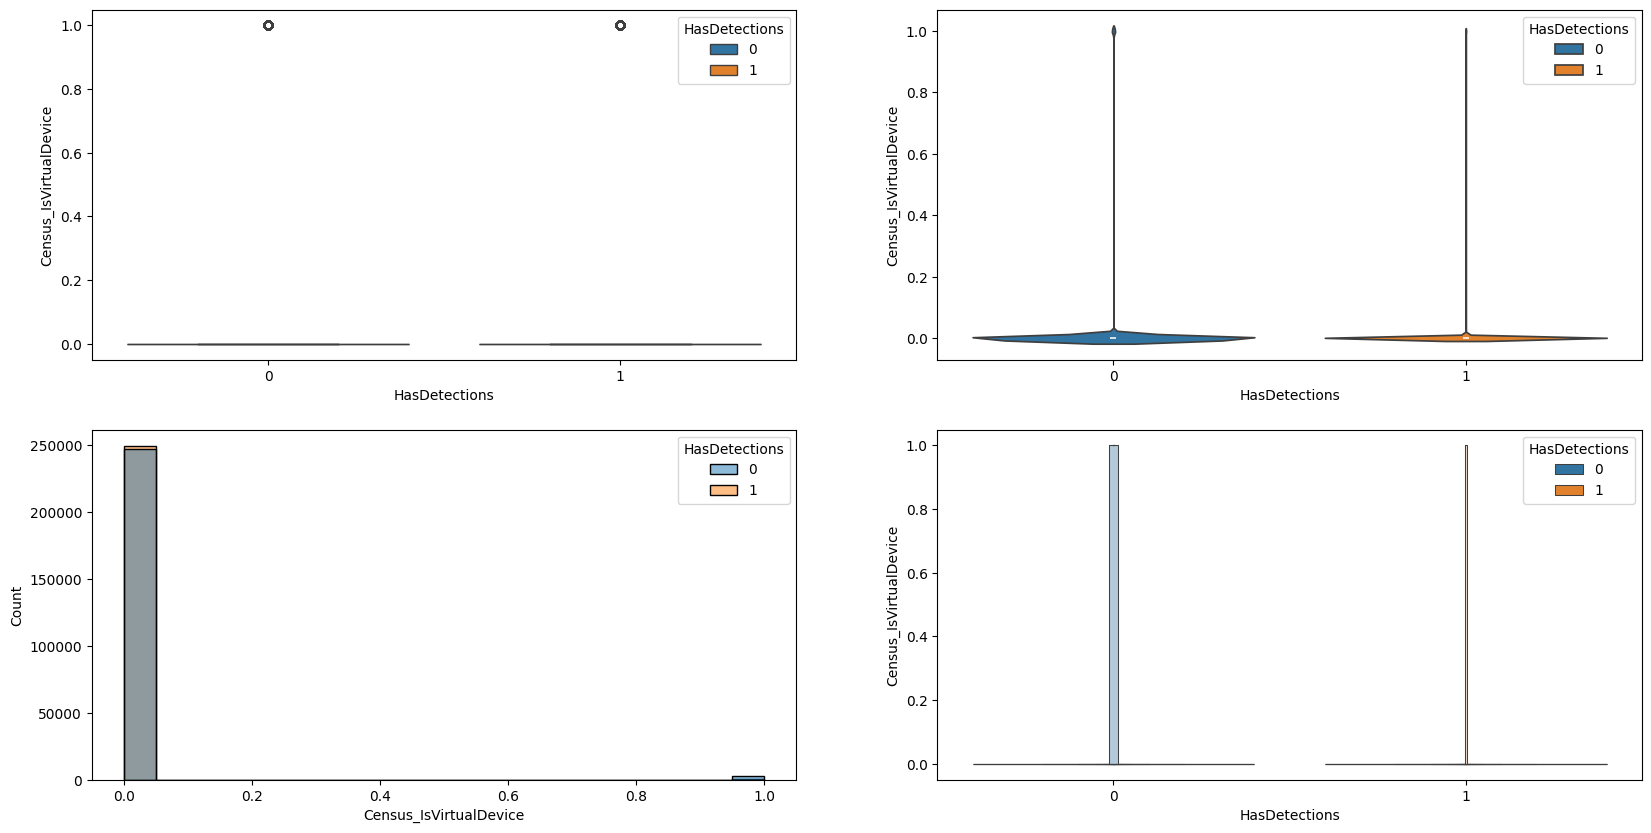

In [74]:
AnalisisAtributo(df,df.columns[14],tar=TARGET)

In [75]:
df.Census_IsVirtualDevice.value_counts(normalize=True)

Census_IsVirtualDevice
0.00   0.99
1.00   0.01
Name: proportion, dtype: float64

In [76]:
columns_to_delete.append(df.columns[14])

#### 3.15- Atributo[15] - Census_IsTouchEnabled

Atributo Numérico
El atributo 'Census_IsTouchEnabled' tiene 0 valores nulos (0.0%)

Descripción estadístiica:
count   500,000.00
mean          0.13
std           0.33
min           0.00
25%           0.00
50%           0.00
75%           0.00
max           1.00
Name: Census_IsTouchEnabled, dtype: float64

El atributo tiene 2 valores únicos

TOP 10 porcentaje de valores únicos:
Census_IsTouchEnabled
0   87.46
1   12.54
Name: proportion, dtype: float64


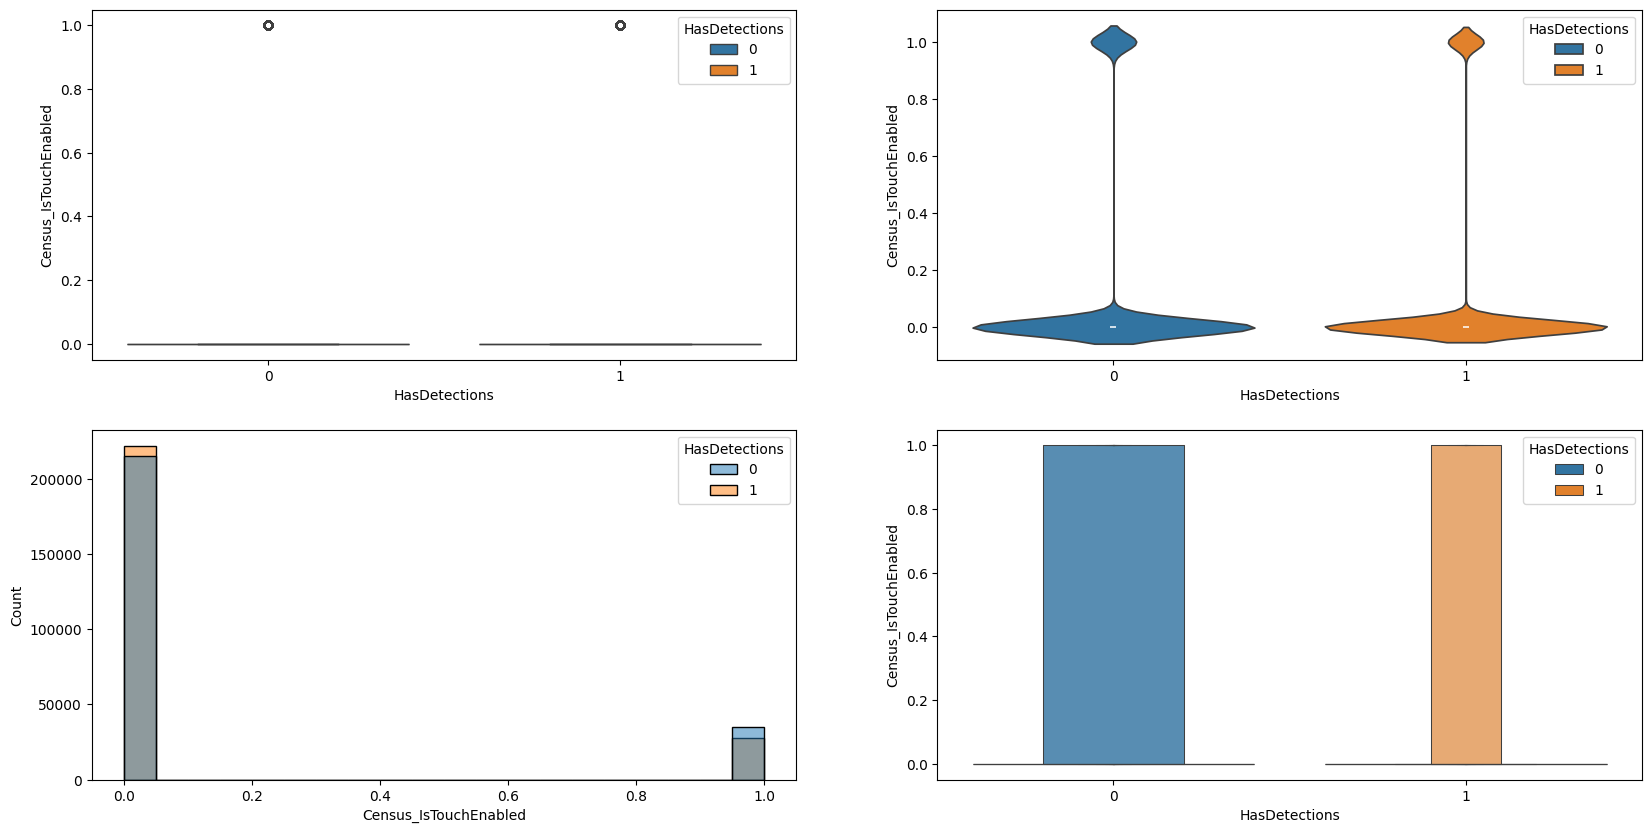

In [77]:
AnalisisAtributo(df,df.columns[15],tar=TARGET)

In [78]:
df.Census_IsTouchEnabled.value_counts(normalize=True)*100

Census_IsTouchEnabled
0   87.46
1   12.54
Name: proportion, dtype: float64

#### 3.16- Atributo[16] - Census_IsPenCapable

Atributo Numérico
El atributo 'Census_IsPenCapable' tiene 0 valores nulos (0.0%)

Descripción estadístiica:
count   500,000.00
mean          0.04
std           0.19
min           0.00
25%           0.00
50%           0.00
75%           0.00
max           1.00
Name: Census_IsPenCapable, dtype: float64

El atributo tiene 2 valores únicos

TOP 10 porcentaje de valores únicos:
Census_IsPenCapable
0   96.23
1    3.77
Name: proportion, dtype: float64


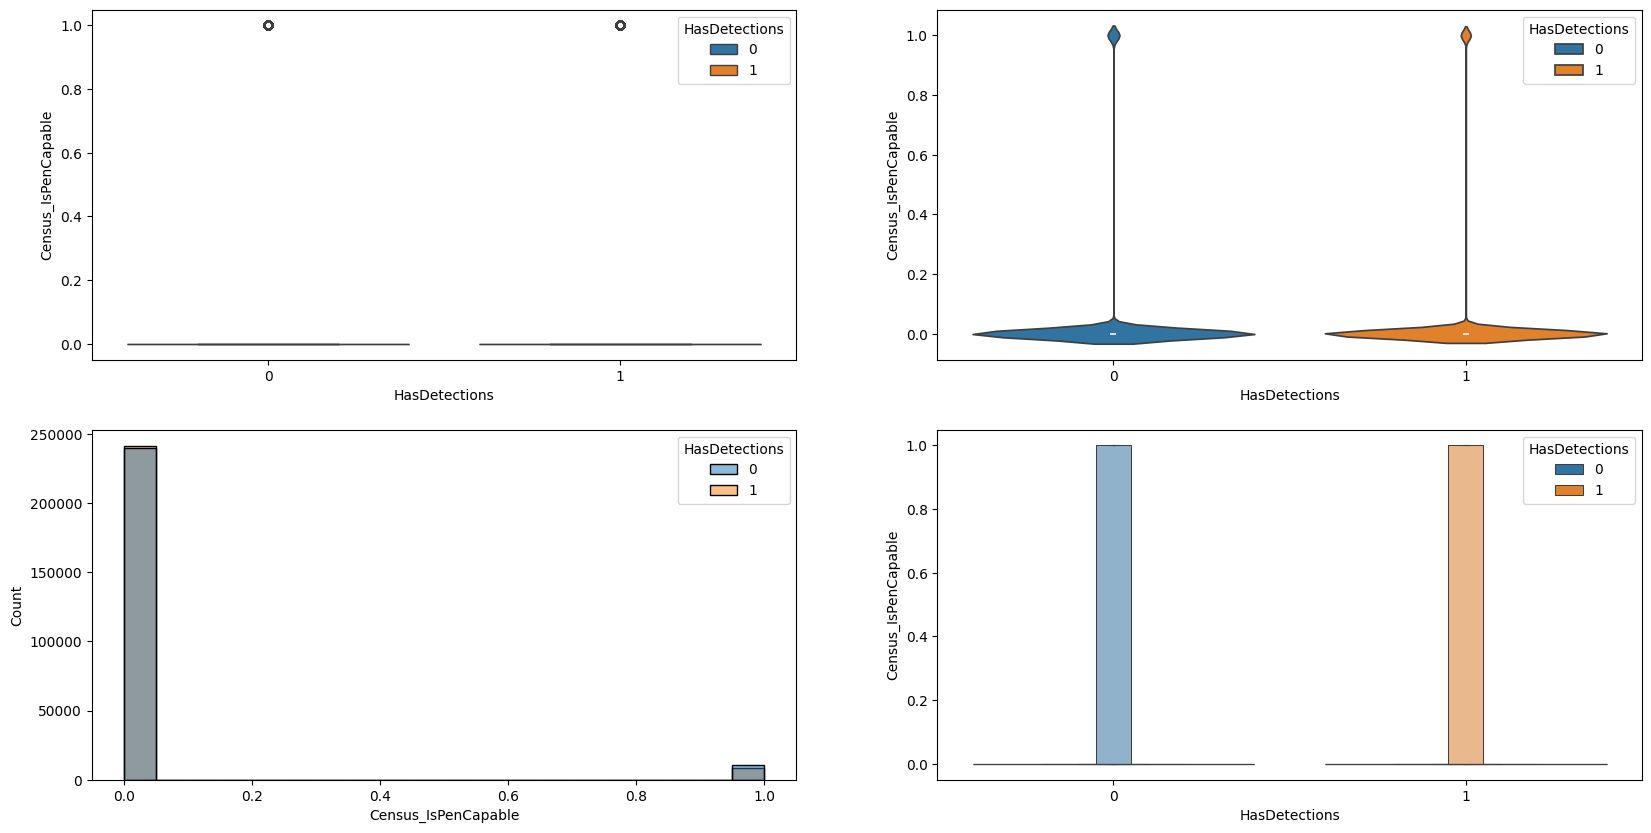

In [79]:
AnalisisAtributo(df,df.columns[16],tar=TARGET)

In [80]:
df.Census_IsPenCapable.value_counts(normalize=True)*100

Census_IsPenCapable
0   96.23
1    3.77
Name: proportion, dtype: float64

In [81]:
columns_to_delete.append(df.columns[16])

#### 3.17- Atributo[17] - Census_IsAlwaysOnAlwaysConnectedCapable

Atributo Numérico
El atributo 'Census_IsAlwaysOnAlwaysConnectedCapable' tiene 4040 valores nulos (0.81%)

Descripción estadístiica:
count   495,960.00
mean          0.06
std           0.23
min           0.00
25%           0.00
50%           0.00
75%           0.00
max           1.00
Name: Census_IsAlwaysOnAlwaysConnectedCapable, dtype: float64

El atributo tiene 2 valores únicos

TOP 10 porcentaje de valores únicos:
Census_IsAlwaysOnAlwaysConnectedCapable
0.00   93.51
1.00    5.68
NaN     0.81
Name: proportion, dtype: float64


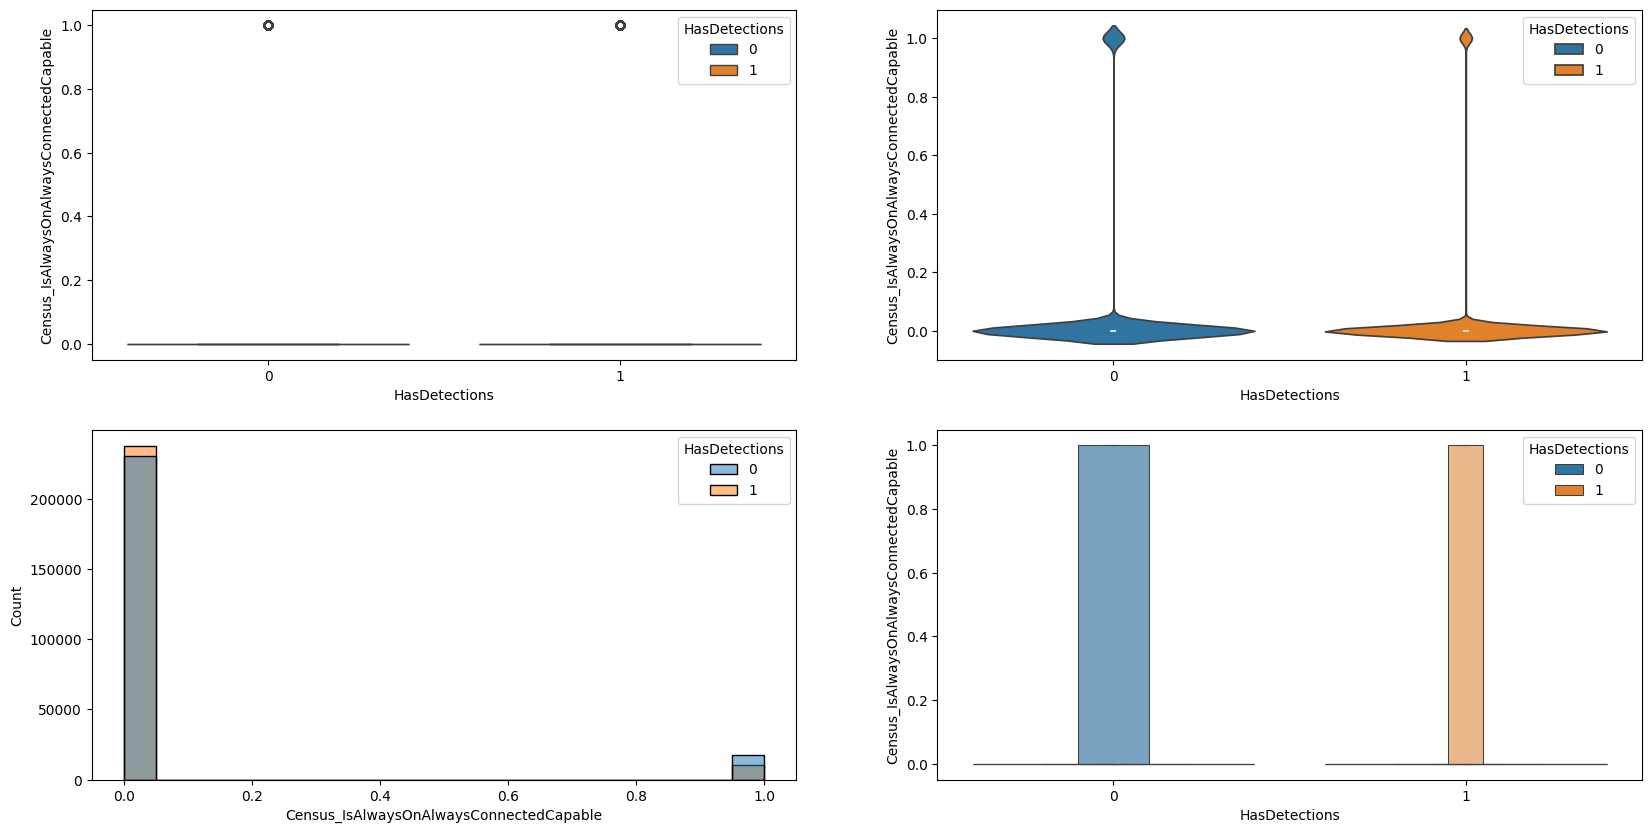

In [82]:
AnalisisAtributo(df,df.columns[17],tar=TARGET)

In [83]:
df.Census_IsAlwaysOnAlwaysConnectedCapable.value_counts(normalize=True)*100

Census_IsAlwaysOnAlwaysConnectedCapable
0.00   94.28
1.00    5.72
Name: proportion, dtype: float64

In [84]:
columns_to_delete.append(df.columns[17])

#### 3.16- Atributo[18] - Wdft_IsGamer

Atributo Numérico
El atributo 'Wdft_IsGamer' tiene 16950 valores nulos (3.39%)

Descripción estadístiica:
count   483,050.00
mean          0.28
std           0.45
min           0.00
25%           0.00
50%           0.00
75%           1.00
max           1.00
Name: Wdft_IsGamer, dtype: float64

El atributo tiene 2 valores únicos

TOP 10 porcentaje de valores únicos:
Wdft_IsGamer
0.00   69.17
1.00   27.44
NaN     3.39
Name: proportion, dtype: float64


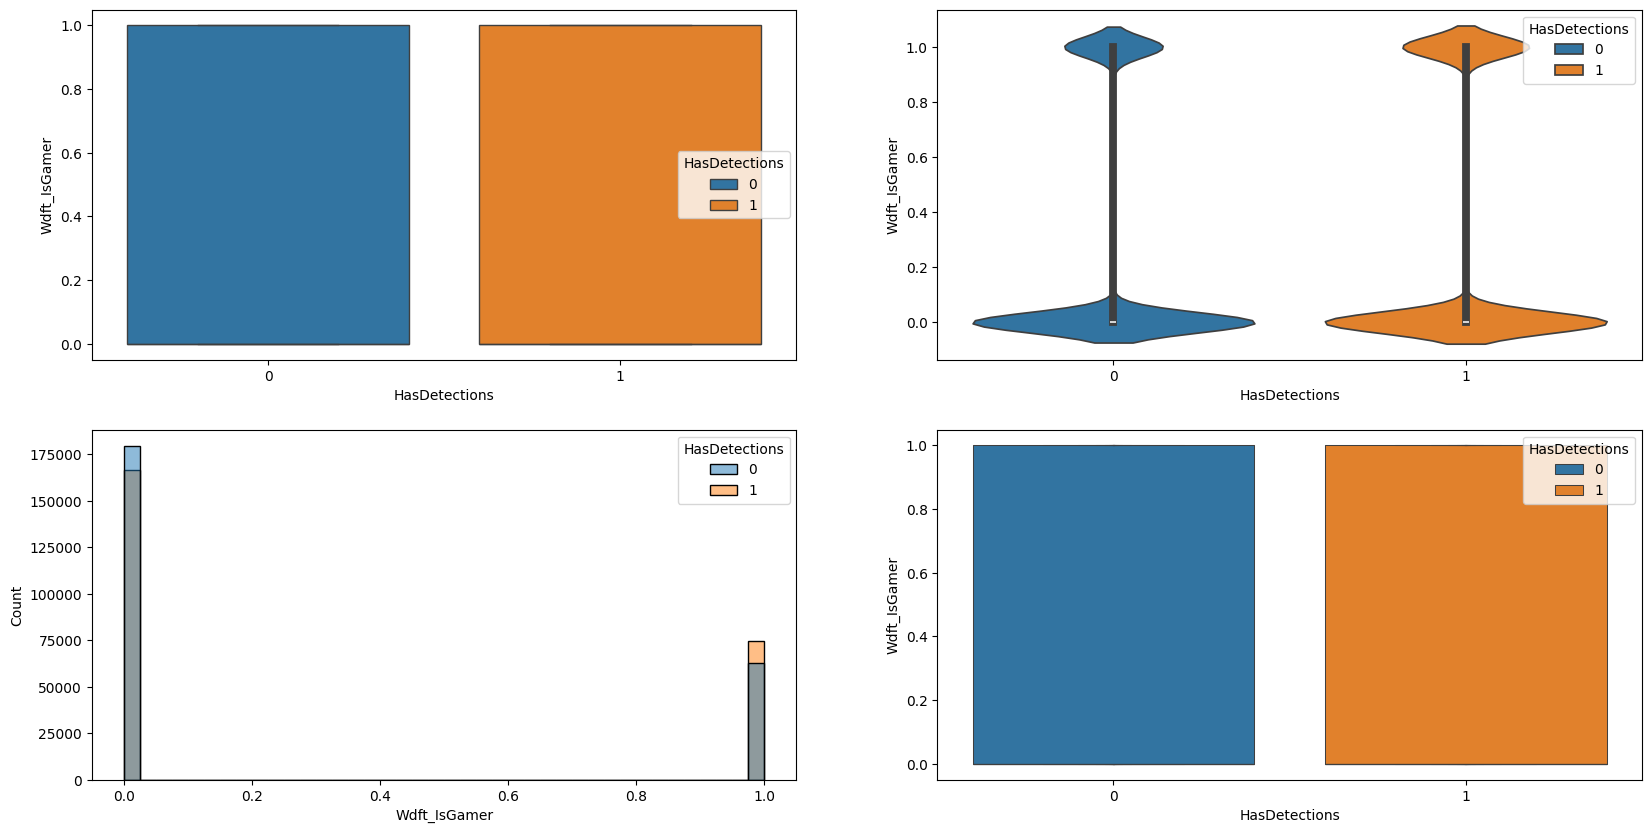

In [85]:
AnalisisAtributo(df,df.columns[18],tar=TARGET)

In [86]:
df.Wdft_IsGamer.value_counts(normalize=True)*100

Wdft_IsGamer
0.00   71.59
1.00   28.41
Name: proportion, dtype: float64

In [87]:
# Imputamos le valor mínimo ya que por lo generla, los equipos gamer suelen llevar software dedicado para identificación de Hardware.
# Si asumimos que el nulo es que no ha podido identificar el Hardware, podemos asumir también que el equipo, porbablemente no sea Gamer
df.Wdft_IsGamer.fillna(df.Wdft_IsGamer.min(),inplace=True)

Atributo Numérico
El atributo 'Wdft_IsGamer' tiene 0 valores nulos (0.0%)

Descripción estadístiica:
count   500,000.00
mean          0.27
std           0.45
min           0.00
25%           0.00
50%           0.00
75%           1.00
max           1.00
Name: Wdft_IsGamer, dtype: float64

El atributo tiene 2 valores únicos

TOP 10 porcentaje de valores únicos:
Wdft_IsGamer
0.00   72.56
1.00   27.44
Name: proportion, dtype: float64


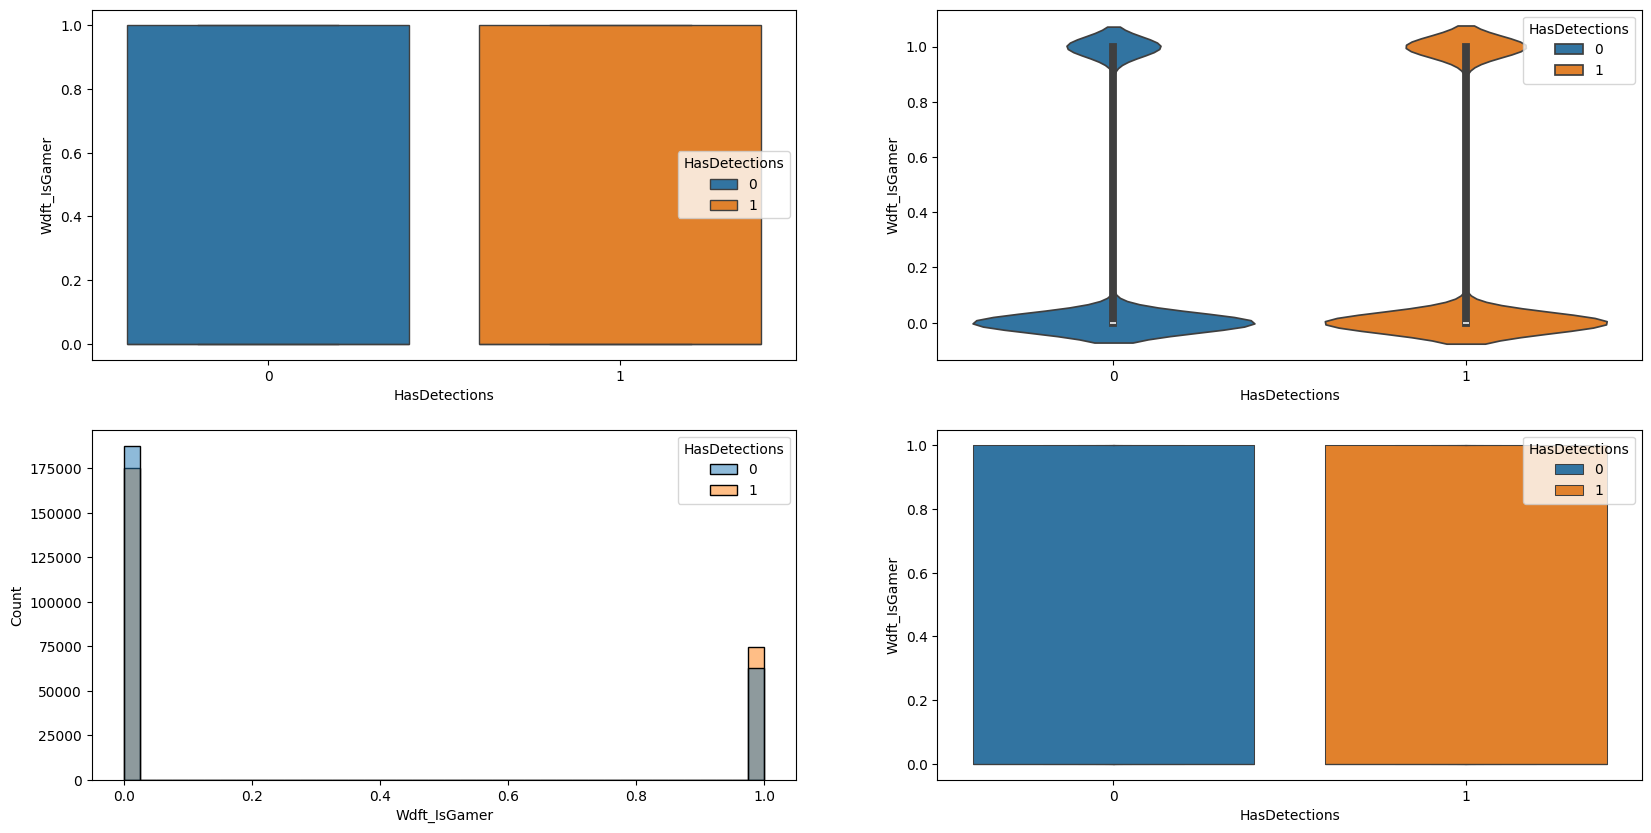

In [88]:
AnalisisAtributo(df,df.columns[18],tar=TARGET)

#### 3.19- Atributo[19] - Wdft_RegionIdentifier

Atributo Numérico
El atributo 'Wdft_RegionIdentifier' tiene 16950 valores nulos (3.39%)

Descripción estadístiica:
count   483,050.00
mean          7.89
std           4.55
min           1.00
25%           3.00
50%          10.00
75%          11.00
max          15.00
Name: Wdft_RegionIdentifier, dtype: float64

El atributo tiene 15 valores únicos

TOP 10 porcentaje de valores únicos:
Wdft_RegionIdentifier
10.00   20.08
11.00   15.12
3.00    14.61
1.00    13.74
15.00   11.47
7.00     6.67
NaN      3.39
8.00     3.15
13.00    2.54
5.00     2.29
Name: proportion, dtype: float64


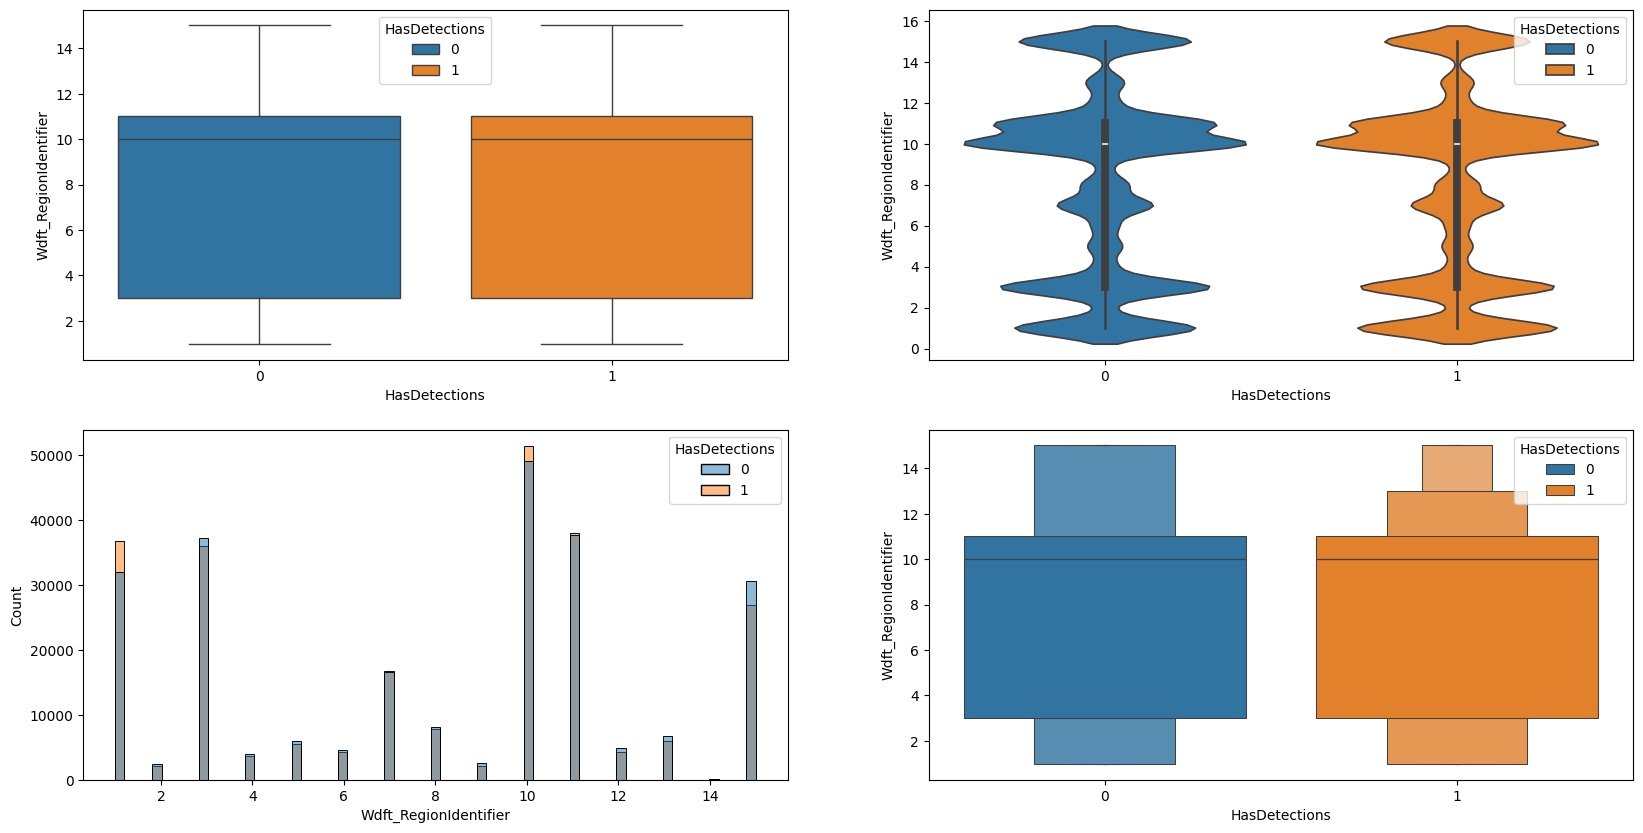

In [89]:
AnalisisAtributo(df,df.columns[19],tar=TARGET)

In [90]:
df.Wdft_RegionIdentifier.fillna(df.Wdft_RegionIdentifier.mode()[0],inplace=True)

In [91]:
(df.Wdft_RegionIdentifier.value_counts(normalize=True)*100).sort_values()

Wdft_RegionIdentifier
14.00    0.05
2.00     0.89
9.00     0.90
4.00     1.52
6.00     1.75
12.00    1.82
5.00     2.29
13.00    2.54
8.00     3.15
7.00     6.67
15.00   11.47
1.00    13.74
3.00    14.61
11.00   15.12
10.00   23.47
Name: proportion, dtype: float64

In [92]:
top6=(1,3,10,11,15)
df.Wdft_RegionIdentifier=df.Wdft_RegionIdentifier.apply(lambda x: 0 if (x not in top6) else x)
del(top6)

In [93]:
(df.Wdft_RegionIdentifier.value_counts(normalize=True)*100).sort_values()

Wdft_RegionIdentifier
15.00   11.47
1.00    13.74
3.00    14.61
11.00   15.12
0.00    21.59
10.00   23.47
Name: proportion, dtype: float64

Atributo Numérico
El atributo 'Wdft_RegionIdentifier' tiene 0 valores nulos (0.0%)

Descripción estadístiica:
count   500,000.00
mean          6.31
std           5.41
min           0.00
25%           1.00
50%          10.00
75%          11.00
max          15.00
Name: Wdft_RegionIdentifier, dtype: float64

El atributo tiene 6 valores únicos

TOP 10 porcentaje de valores únicos:
Wdft_RegionIdentifier
10.00   23.47
0.00    21.59
11.00   15.12
3.00    14.61
1.00    13.74
15.00   11.47
Name: proportion, dtype: float64


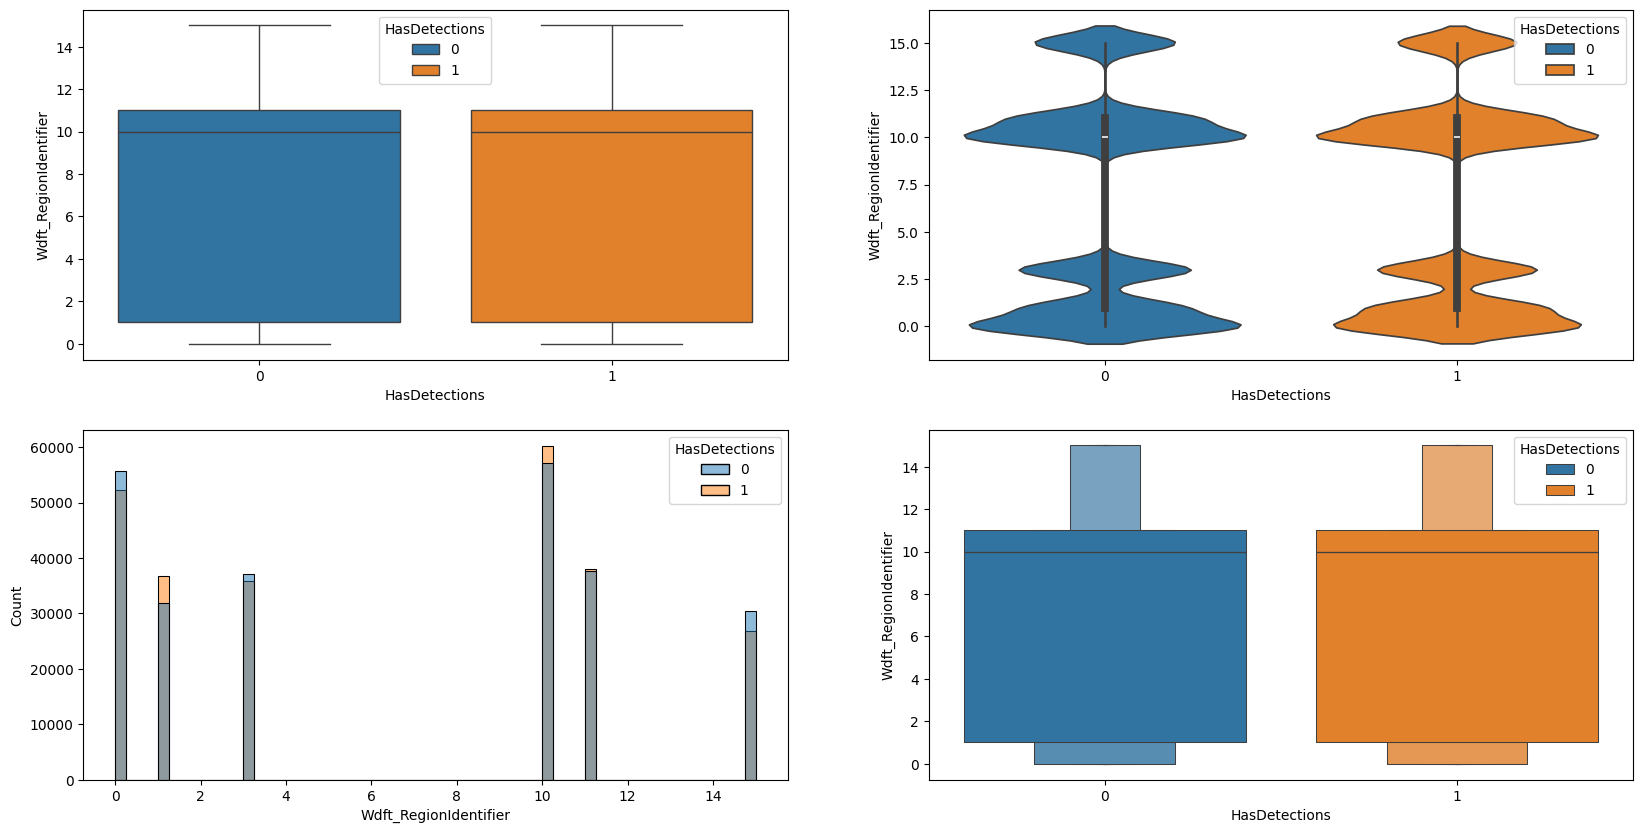

In [94]:
AnalisisAtributo(df,df.columns[19],tar=TARGET)

#### 3.20- Atributo[20] - OsSuite

Atributo Numérico
El atributo 'OsSuite' tiene 0 valores nulos (0.0%)

Descripción estadístiica:
count   500,000.00
mean        574.72
std         248.20
min          16.00
25%         256.00
50%         768.00
75%         768.00
max         784.00
Name: OsSuite, dtype: float64

El atributo tiene 9 valores únicos

TOP 10 porcentaje de valores únicos:
OsSuite
768   62.25
256   37.59
272    0.14
16     0.01
400    0.01
305    0.01
784    0.00
274    0.00
18     0.00
Name: proportion, dtype: float64


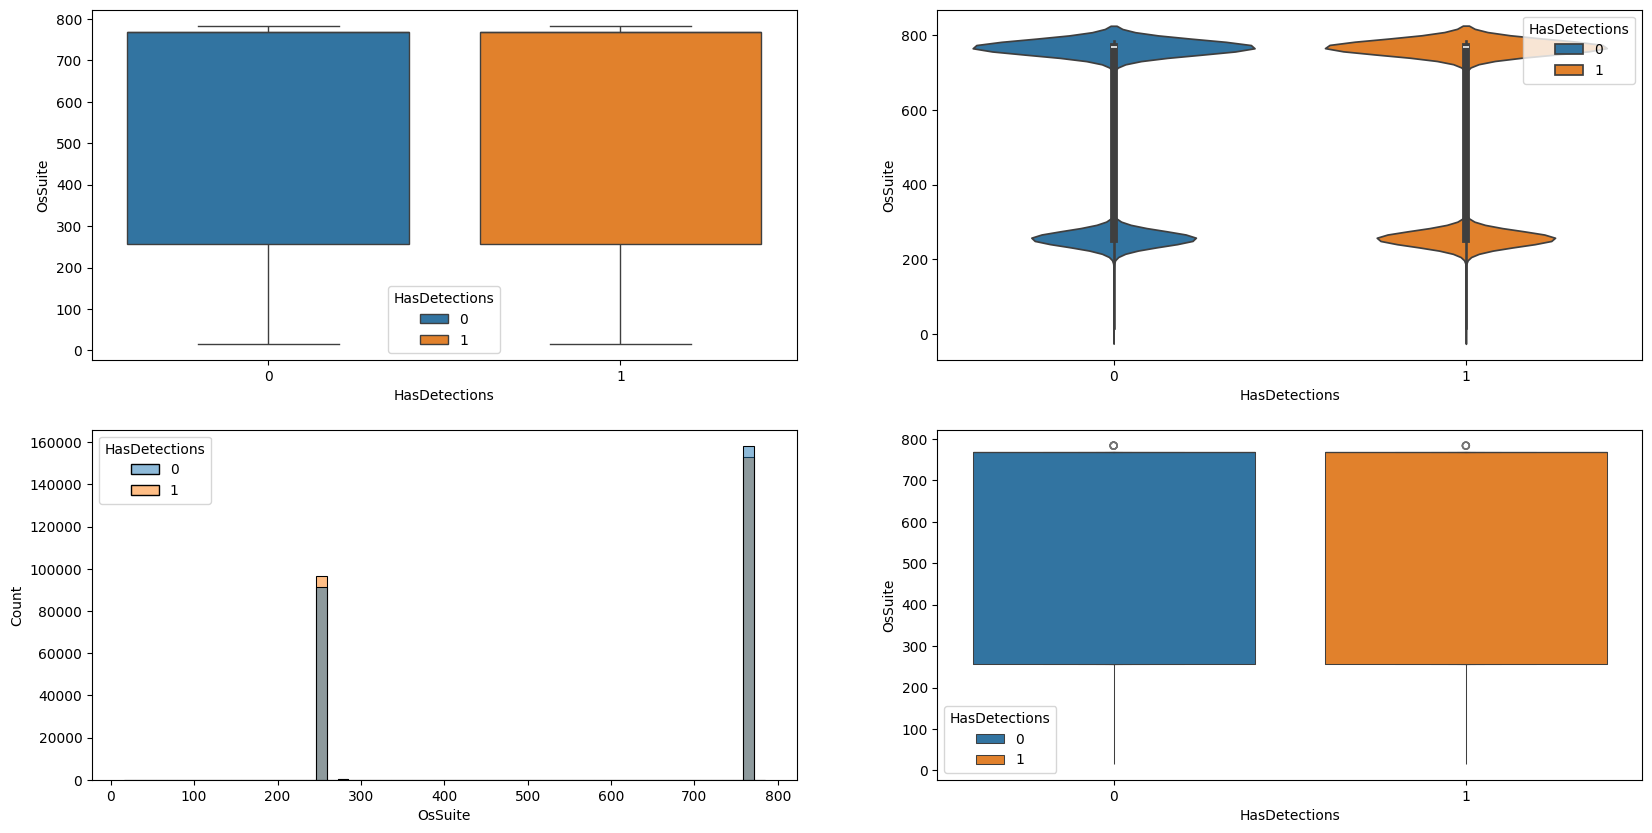

In [95]:
AnalisisAtributo(df,df.columns[20],tar=TARGET)

In [96]:
df['OsSuite'].value_counts(normalize=True)*100

OsSuite
768   62.25
256   37.59
272    0.14
16     0.01
400    0.01
305    0.01
784    0.00
274    0.00
18     0.00
Name: proportion, dtype: float64

In [97]:
top=(768,256)
df['OsSuite']=df['OsSuite'].apply(lambda x: 0 if x not in top else x)
del(top)

In [98]:
df['OsSuite'].value_counts(normalize=True)*100

OsSuite
768   62.25
256   37.59
0      0.16
Name: proportion, dtype: float64

Atributo Numérico
El atributo 'OsSuite' tiene 0 valores nulos (0.0%)

Descripción estadístiica:
count   500,000.00
mean        574.27
std         248.96
min           0.00
25%         256.00
50%         768.00
75%         768.00
max         768.00
Name: OsSuite, dtype: float64

El atributo tiene 3 valores únicos

TOP 10 porcentaje de valores únicos:
OsSuite
768   62.25
256   37.59
0      0.16
Name: proportion, dtype: float64


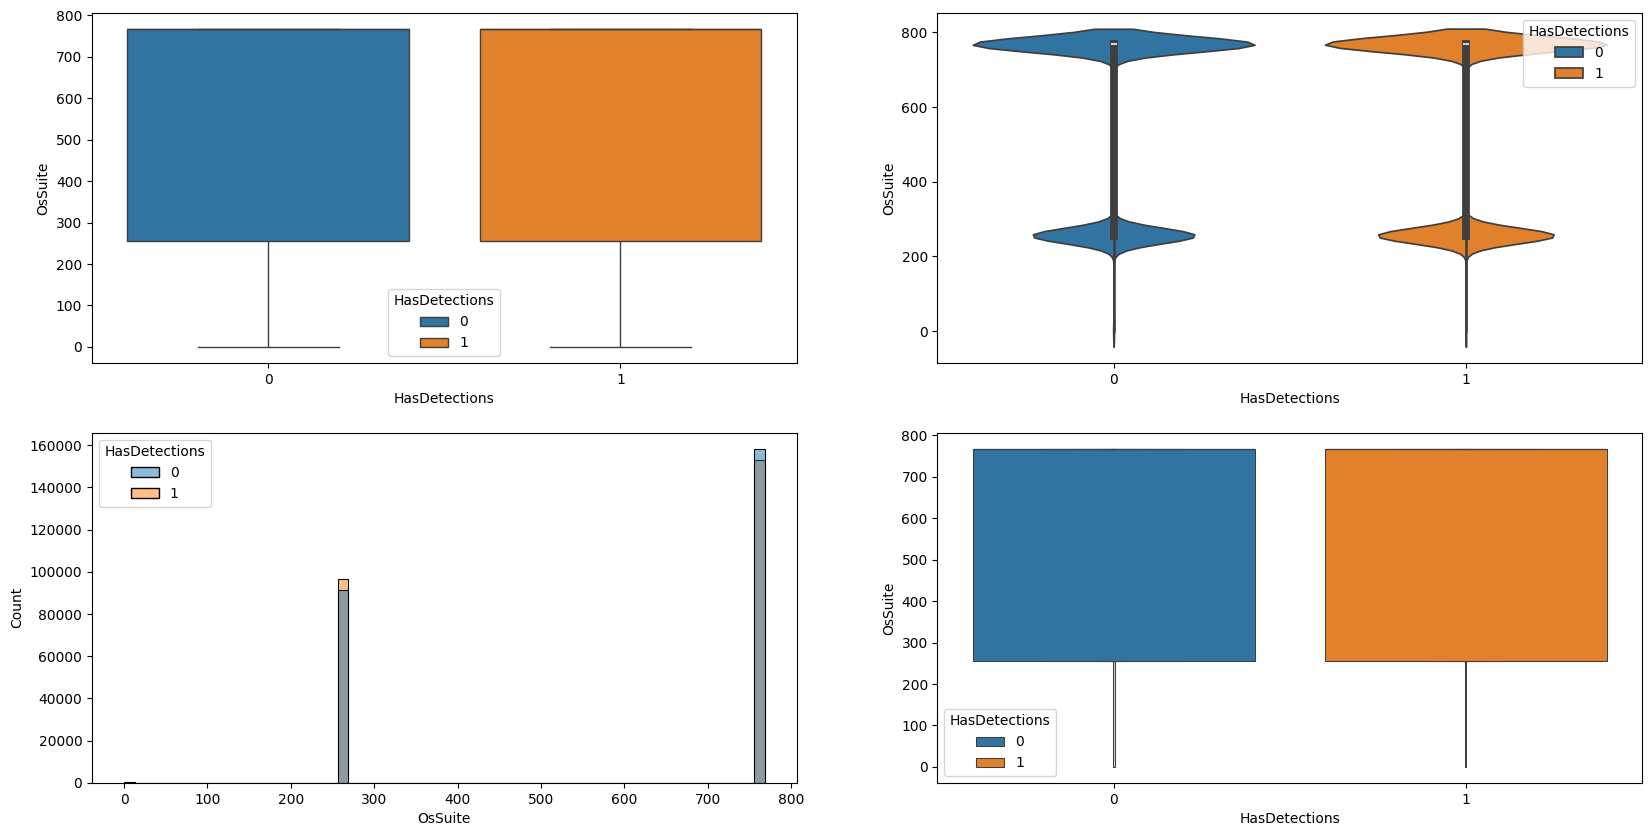

In [99]:
AnalisisAtributo(df,df.columns[20],tar=TARGET)

#### 3.21- Atributo[21] - OsPlatformSubRelease

Atributo Categórico
El atributo 'OsPlatformSubRelease' tiene 0 valores nulos (0.0%)

Descripción estadístiica:

count     500000
unique         9
top          rs4
freq      220779
Name: OsPlatformSubRelease, dtype: object


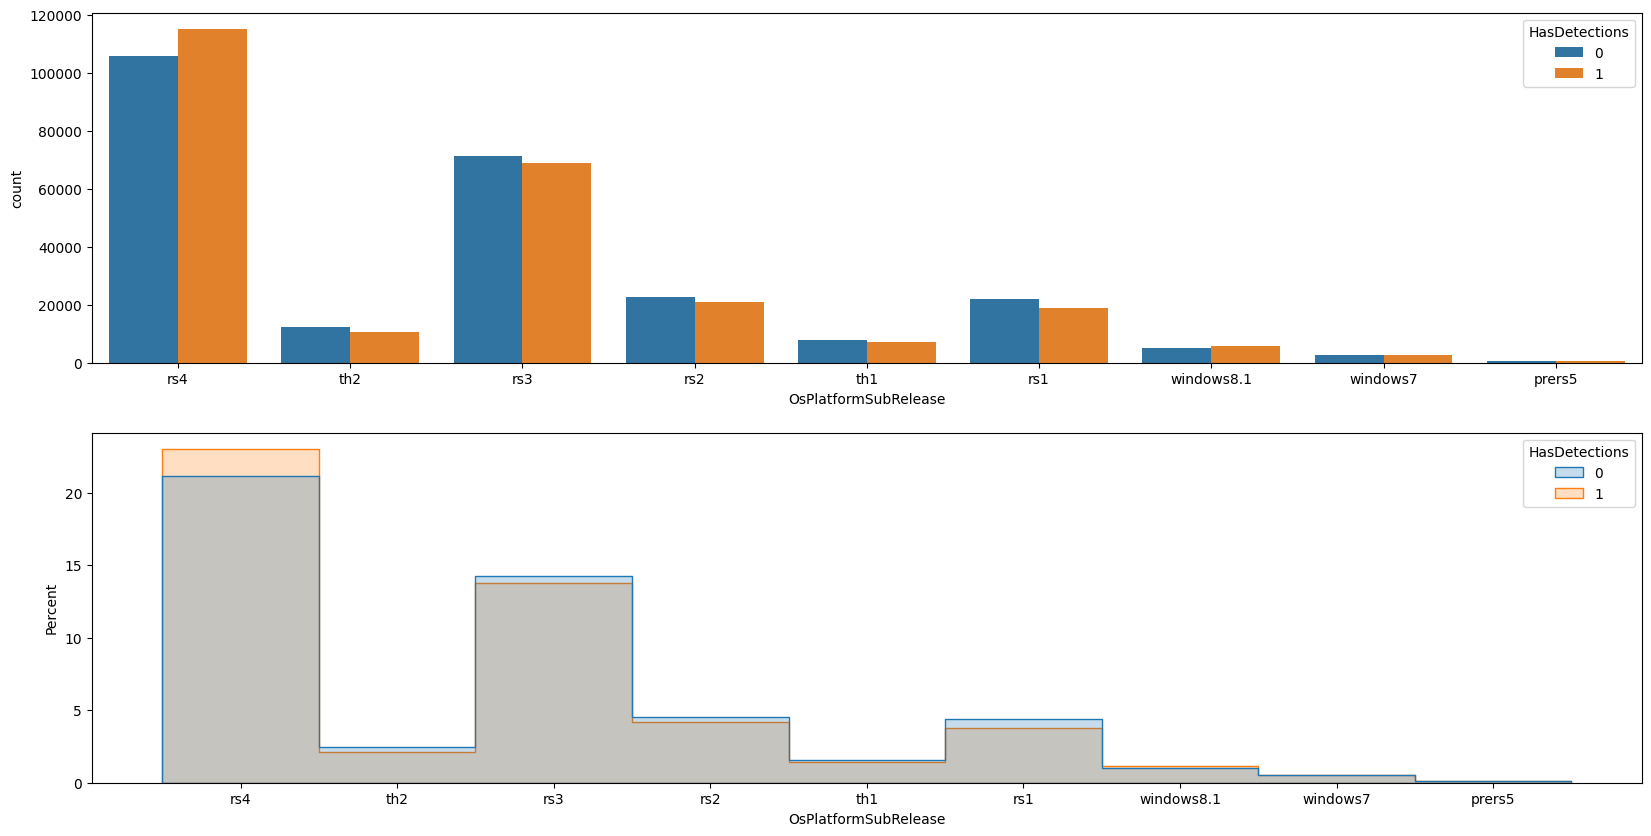

Equipos  Proporcion_Equipos  Infectados  \
OsPlatformSubRelease                                            
rs4                    220779               44.16      114996   
rs3                    139901               27.98       68735   
rs2                     43352                8.67       20778   
rs1                     40717                8.14       18848   
th2                     22955                4.59       10608   
th1                     15014                3.00        7309   
windows8.1              10825                2.16        5614   
windows7                 5314                1.06        2562   
prers5                   1143                0.23         503   

                      Proporcion_Infectados  
OsPlatformSubRelease                         
rs4                                   52.09  
rs3                                   49.13  
rs2                                   47.93  
rs1                                   46.29  
th2                                   46.21  
th1                                   48.68  
windows8.1                            51.86  
windows7                              48.21  
prers5                                44.01

In [100]:
AnalisisAtributo(df,df.columns[21],tar=TARGET)

In [101]:
# Como prers5 representa un 0.23 de la muestra y se refiere a versiones previas a la versión de W10 de Octubre del 2018, la agruparemos con la versión rs1

In [102]:
df['OsPlatformSubRelease']=df['OsPlatformSubRelease'].apply(lambda x: 'rs1' if x=='prers5' else x)

Atributo Categórico
El atributo 'OsPlatformSubRelease' tiene 0 valores nulos (0.0%)

Descripción estadístiica:

count     500000
unique         8
top          rs4
freq      220779
Name: OsPlatformSubRelease, dtype: object


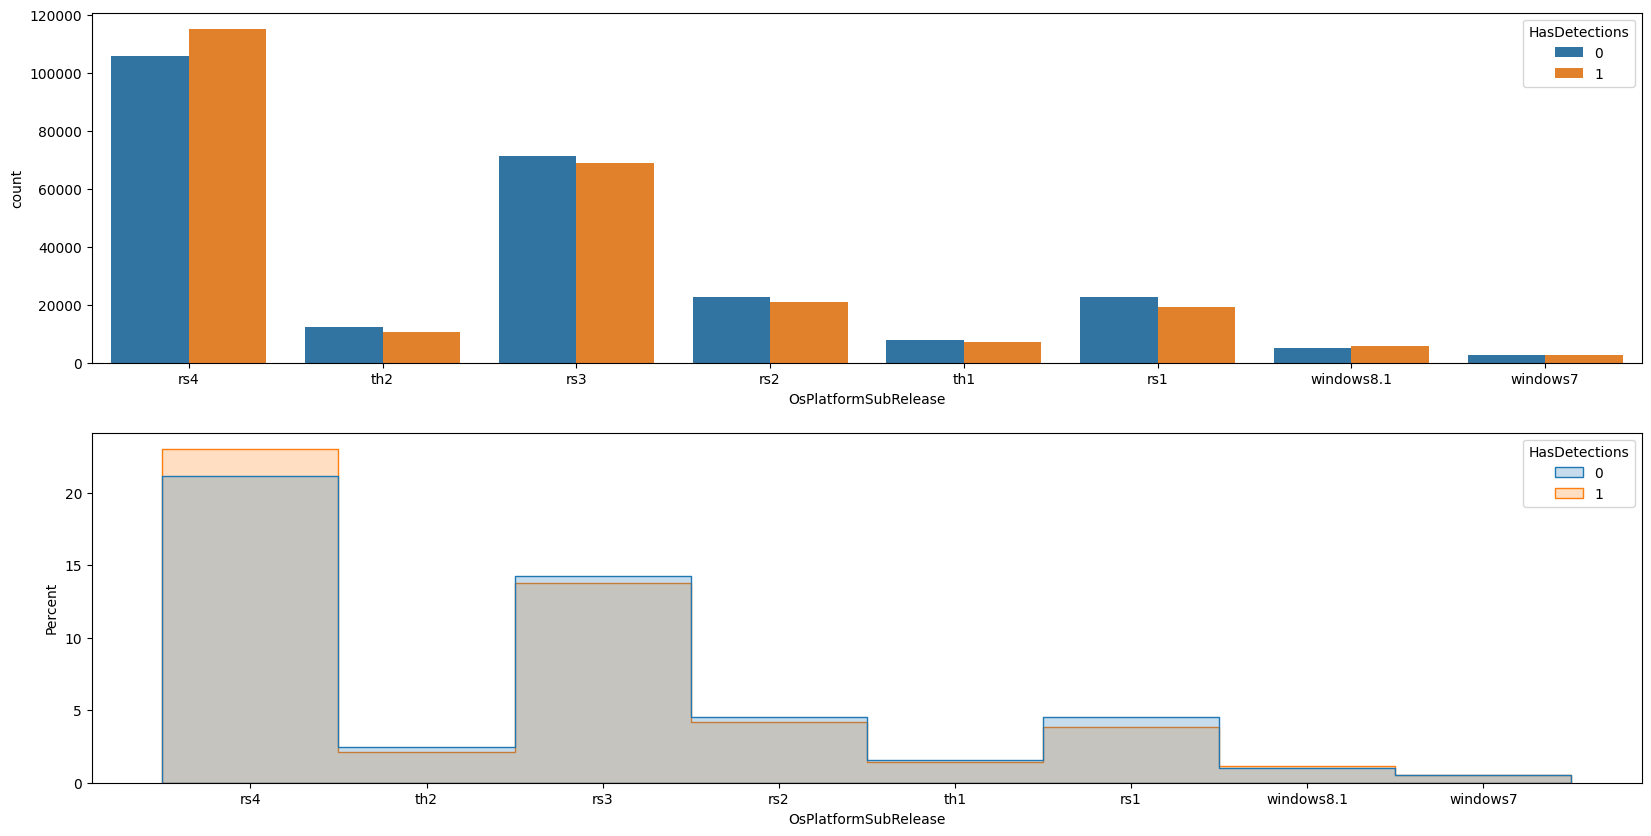

Equipos  Proporcion_Equipos  Infectados  \
OsPlatformSubRelease                                            
rs4                    220779               44.16      114996   
rs3                    139901               27.98       68735   
rs2                     43352                8.67       20778   
rs1                     41860                8.37       19351   
th2                     22955                4.59       10608   
th1                     15014                3.00        7309   
windows8.1              10825                2.16        5614   
windows7                 5314                1.06        2562   

                      Proporcion_Infectados  
OsPlatformSubRelease                         
rs4                                   52.09  
rs3                                   49.13  
rs2                                   47.93  
rs1                                   46.23  
th2                                   46.21  
th1                                   48.68  
windows8.1                            51.86  
windows7                              48.21

In [103]:
AnalisisAtributo(df,df.columns[21],tar=TARGET)

#### 3.22- Atributo[22] - OsBuildLab

Atributo Categórico
El atributo 'OsBuildLab' tiene 1 valores nulos (0.0%)

Descripción estadístiica:

count                                       499999
unique                                         453
top       17134.1.amd64fre.rs4_release.180410-1804
freq                                        206436
Name: OsBuildLab, dtype: object


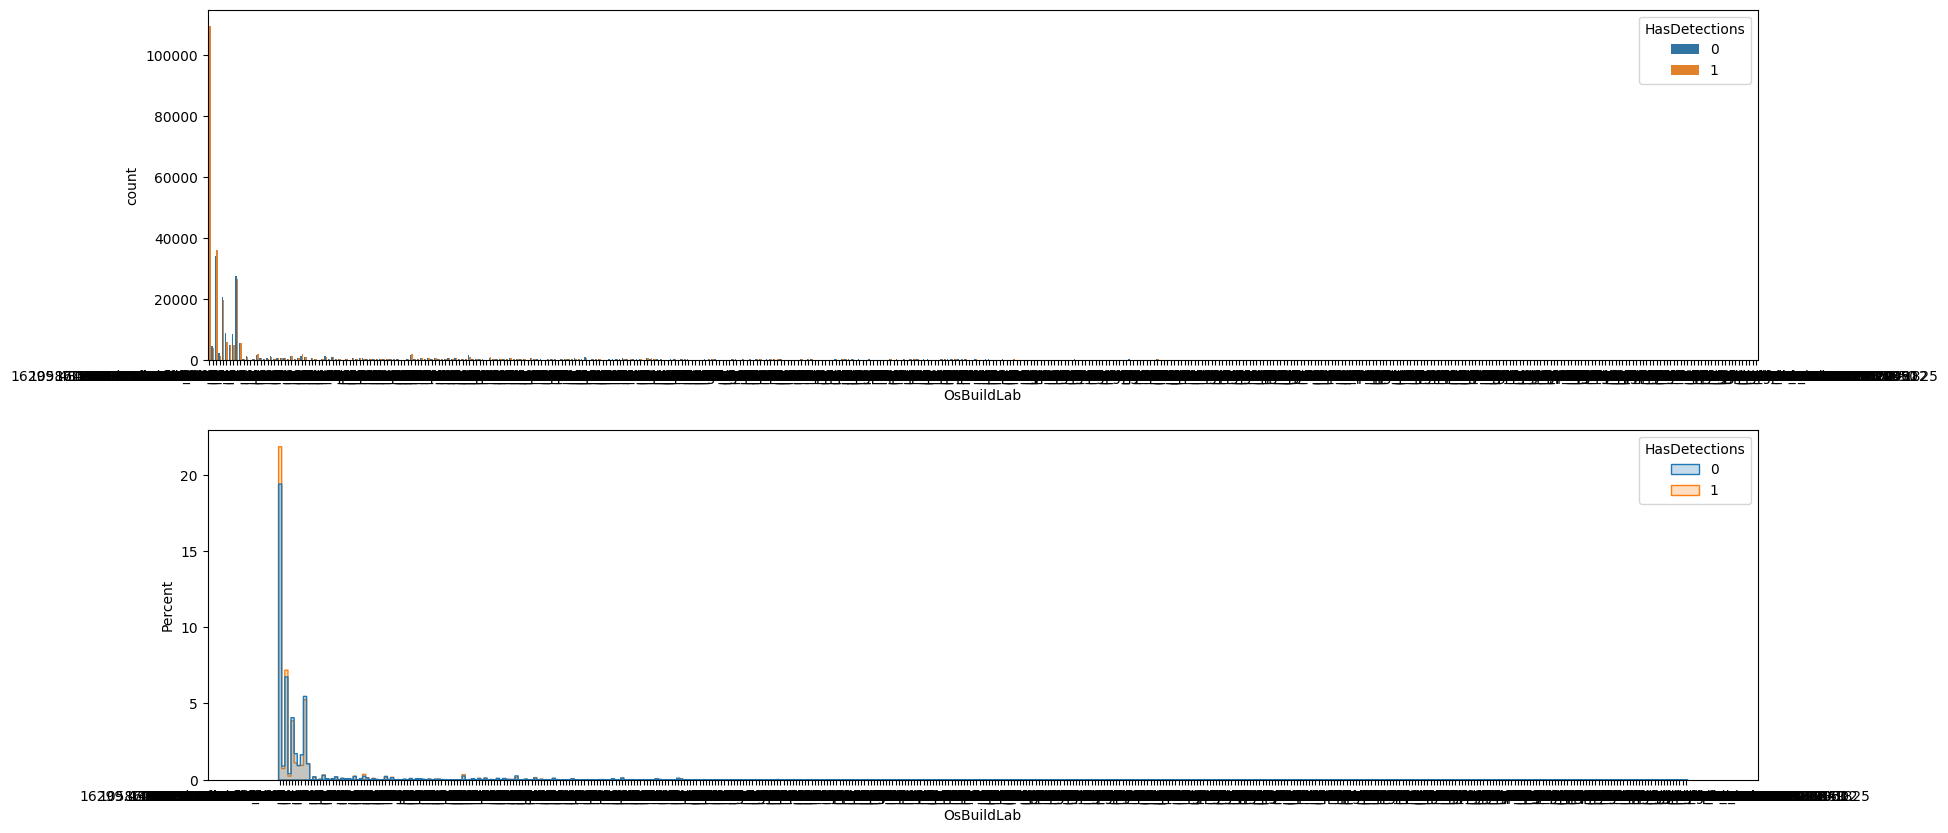

Equipos  \
OsBuildLab                                                    
17134.1.amd64fre.rs4_release.180410-1804             206436   
16299.431.amd64fre.rs3_release_svc_escrow.18050...    69884   
16299.15.amd64fre.rs3_release.170928-1534             53826   
15063.0.amd64fre.rs2_release.170317-1834              39908   
17134.1.x86fre.rs4_release.180410-1804                14334   
...                                                     ...   
7600.17118.amd64fre.win7_gdr.120830-0334                  1   
7600.16841.amd64fre.win7_gdr.110622-1503                  1   
18219.1000.amd64fre.rs_prerelease.180810-1721             1   
18214.1000.amd64fre.rs_prerelease.180803-1553             1   
NaN                                                       1   

                                                    Proporcion_Equipos  \
OsBuildLab                                                               
17134.1.amd64fre.rs4_release.180410-1804                         41.29   
16299.431.amd64fre.rs3_release_svc_escrow.18050...               13.98   
16299.15.amd64fre.rs3_release.170928-1534                        10.77   
15063.0.amd64fre.rs2_release.170317-1834                          7.98   
17134.1.x86fre.rs4_release.180410-1804                            2.87   
...                                                                ...   
7600.17118.amd64fre.win7_gdr.120830-0334                          0.00   
7600.16841.amd64fre.win7_gdr.110622-1503                          0.00   
18219.1000.amd64fre.rs_prerelease.180810-1721                     0.00   
18214.1000.amd64fre.rs_prerelease.180803-1553                     0.00   
NaN                                                               0.00   

                                                    Infectados  \
OsBuildLab                                                       
17134.1.amd64fre.rs4_release.180410-1804                109335   
16299.431.amd64fre.rs3_release_svc_escrow.18050...       36047   
16299.15.amd64fre.rs3_release.170928-1534                26378   
15063.0.amd64fre.rs2_release.170317-1834                 19454   
17134.1.x86fre.rs4_release.180410-1804                    5661   
...                                                        ...   
7600.17118.amd64fre.win7_gdr.120830-0334                     0   
7600.16841.amd64fre.win7_gdr.110622-1503                     0   
18219.1000.amd64fre.rs_prerelease.180810-1721                1   
18214.1000.amd64fre.rs_prerelease.180803-1553                0   
NaN                                                          0   

                                                    Proporcion_Infectados  
OsBuildLab                                                                 
17134.1.amd64fre.rs4_release.180410-1804                            52.96  
16299.431.amd64fre.rs3_release_svc_escrow.18050...                  51.58  
16299.15.amd64fre.rs3_release.170928-1534                           49.01  
15063.0.amd64fre.rs2_release.170317-1834                            48.75  
17134.1.x86fre.rs4_release.180410-1804                              39.49  
...                                                                   ...  
7600.17118.amd64fre.win7_gdr.120830-0334                             0.00  
7600.16841.amd64fre.win7_gdr.110622-1503                             0.00  
18219.1000.amd64fre.rs_prerelease.180810-1721                      100.00  
18214.1000.amd64fre.rs_prerelease.180803-1553                        0.00  
NaN                                                                  0.00  

[454 rows x 4 columns]

In [104]:
AnalisisAtributo(df,df.columns[22],tar=TARGET)

In [105]:
(df.OsBuildLab.value_counts(normalize=True)*100).head(10)

OsBuildLab
17134.1.amd64fre.rs4_release.180410-1804                41.29
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908   13.98
16299.15.amd64fre.rs3_release.170928-1534               10.77
15063.0.amd64fre.rs2_release.170317-1834                 7.98
17134.1.x86fre.rs4_release.180410-1804                   2.87
16299.15.x86fre.rs3_release.170928-1534                  2.62
14393.2189.amd64fre.rs1_release.180329-1711              2.14
10240.17443.amd64fre.th1.170602-2340                     1.91
10586.1176.amd64fre.th2_release_sec.170913-1848          1.68
15063.0.x86fre.rs2_release.170317-1834                   0.69
Name: proportion, dtype: float64

In [106]:
top4=(df.OsBuildLab.value_counts(normalize=True)*100)[:4].index.tolist()
top4
df['OsBuildLab']=df['OsBuildLab'].apply(lambda x: x if x in top4 else 'Other')
del(top4)

In [107]:
(df.OsBuildLab.value_counts(normalize=True)*100).head(10)

OsBuildLab
17134.1.amd64fre.rs4_release.180410-1804                41.29
Other                                                   25.99
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908   13.98
16299.15.amd64fre.rs3_release.170928-1534               10.77
15063.0.amd64fre.rs2_release.170317-1834                 7.98
Name: proportion, dtype: float64

Atributo Categórico
El atributo 'OsBuildLab' tiene 0 valores nulos (0.0%)

Descripción estadístiica:

count                                       500000
unique                                           5
top       17134.1.amd64fre.rs4_release.180410-1804
freq                                        206436
Name: OsBuildLab, dtype: object


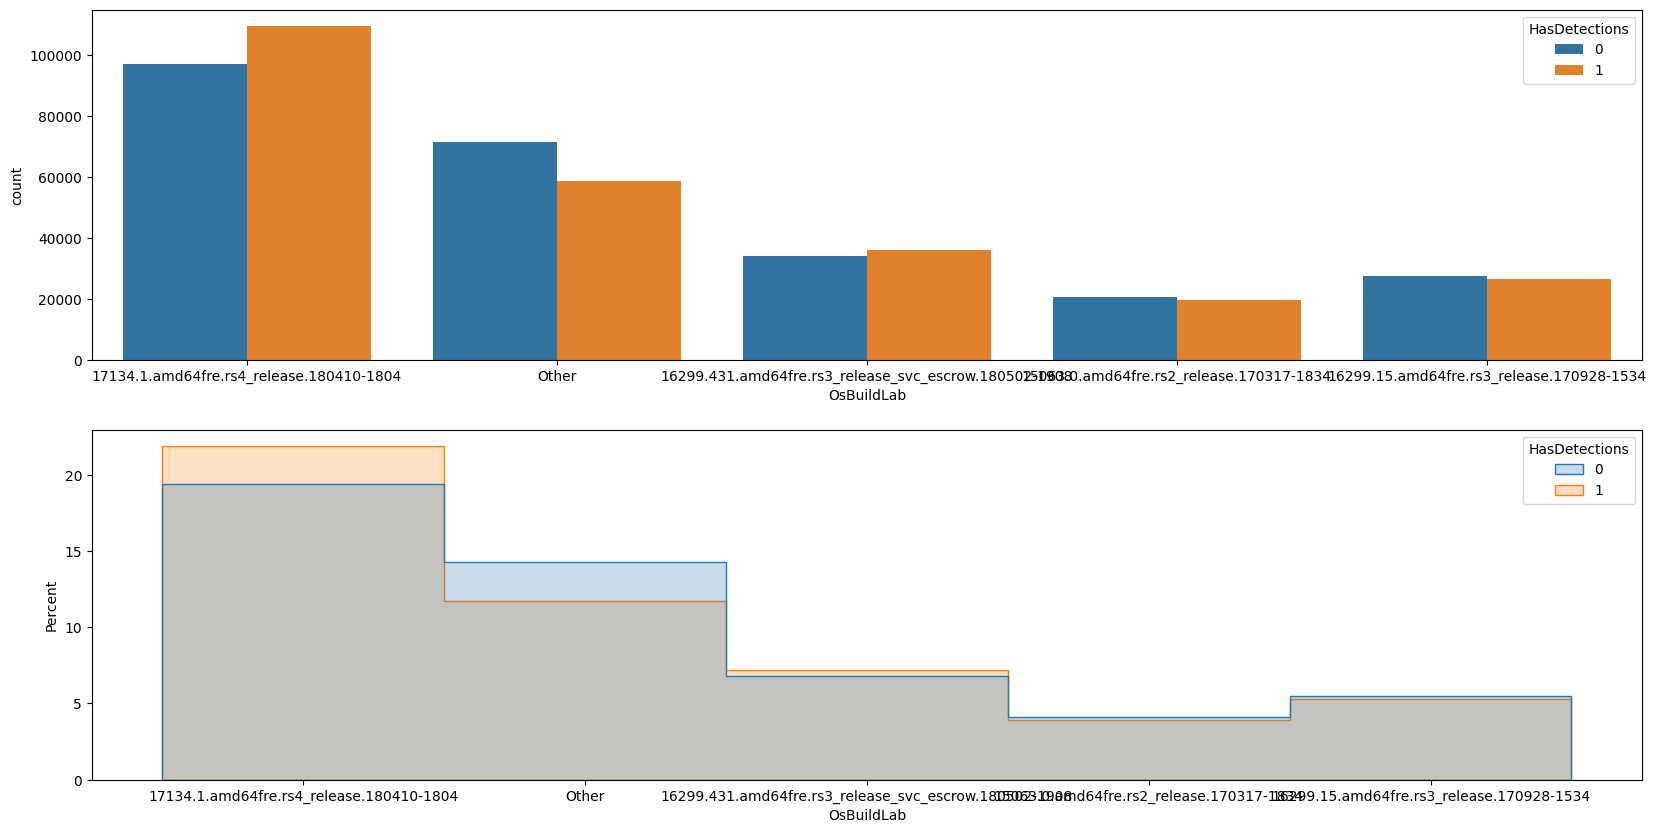

Equipos  \
OsBuildLab                                                    
17134.1.amd64fre.rs4_release.180410-1804             206436   
Other                                                129946   
16299.431.amd64fre.rs3_release_svc_escrow.18050...    69884   
16299.15.amd64fre.rs3_release.170928-1534             53826   
15063.0.amd64fre.rs2_release.170317-1834              39908   

                                                    Proporcion_Equipos  \
OsBuildLab                                                               
17134.1.amd64fre.rs4_release.180410-1804                         41.29   
Other                                                            25.99   
16299.431.amd64fre.rs3_release_svc_escrow.18050...               13.98   
16299.15.amd64fre.rs3_release.170928-1534                        10.77   
15063.0.amd64fre.rs2_release.170317-1834                          7.98   

                                                    Infectados  \
OsBuildLab                                                       
17134.1.amd64fre.rs4_release.180410-1804                109335   
Other                                                    58739   
16299.431.amd64fre.rs3_release_svc_escrow.18050...       36047   
16299.15.amd64fre.rs3_release.170928-1534                26378   
15063.0.amd64fre.rs2_release.170317-1834                 19454   

                                                    Proporcion_Infectados  
OsBuildLab                                                                 
17134.1.amd64fre.rs4_release.180410-1804                            52.96  
Other                                                               45.20  
16299.431.amd64fre.rs3_release_svc_escrow.18050...                  51.58  
16299.15.amd64fre.rs3_release.170928-1534                           49.01  
15063.0.amd64fre.rs2_release.170317-1834                            48.75

In [108]:
AnalisisAtributo(df,df.columns[22],tar=TARGET)

#### 3.23- Atributo[23] - SkuEdition

Atributo Categórico
El atributo 'SkuEdition' tiene 0 valores nulos (0.0%)

Descripción estadístiica:

count     500000
unique         8
top         Home
freq      308567
Name: SkuEdition, dtype: object


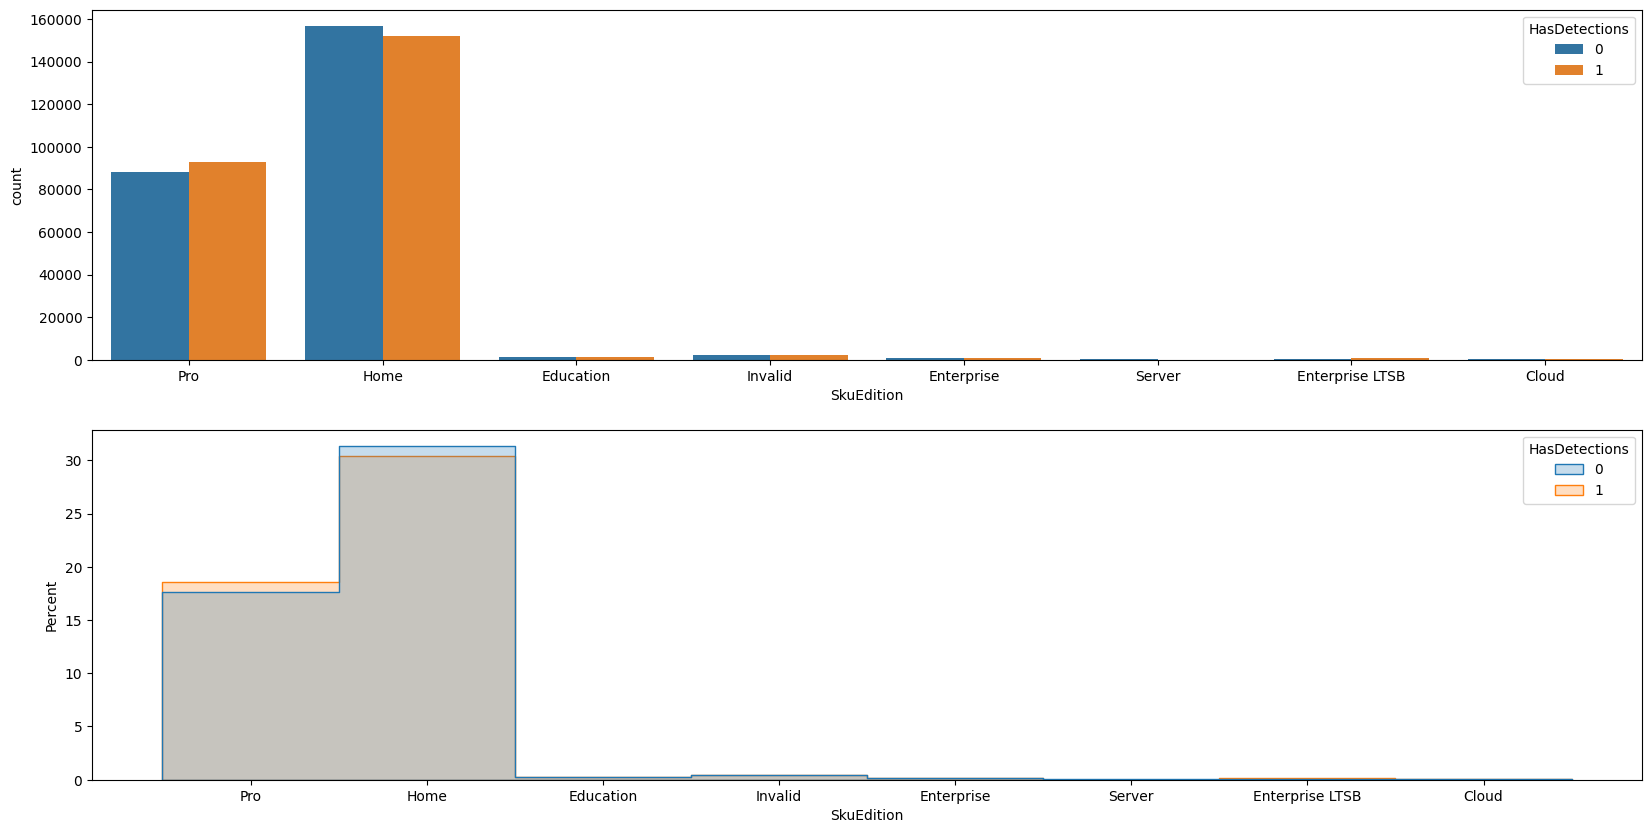

Equipos  Proporcion_Equipos  Infectados  \
SkuEdition                                                 
Home              308567               61.71      152007   
Pro               181042               36.21       92853   
Invalid             4423                0.88        2069   
Education           2321                0.46        1202   
Enterprise          1999                0.40        1035   
Enterprise LTSB     1141                0.23         614   
Cloud                309                0.06         121   
Server               198                0.04          52   

                 Proporcion_Infectados  
SkuEdition                              
Home                             49.26  
Pro                              51.29  
Invalid                          46.78  
Education                        51.79  
Enterprise                       51.78  
Enterprise LTSB                  53.81  
Cloud                            39.16  
Server                           26.26

In [109]:
AnalisisAtributo(df,df.columns[23],tar=TARGET)

In [110]:
top2=('Home', 'Pro')
df['SkuEdition']=df['SkuEdition'].apply(lambda x: x if x in top2 else 'Other')
del(top2)

Atributo Categórico
El atributo 'SkuEdition' tiene 0 valores nulos (0.0%)

Descripción estadístiica:

count     500000
unique         3
top         Home
freq      308567
Name: SkuEdition, dtype: object


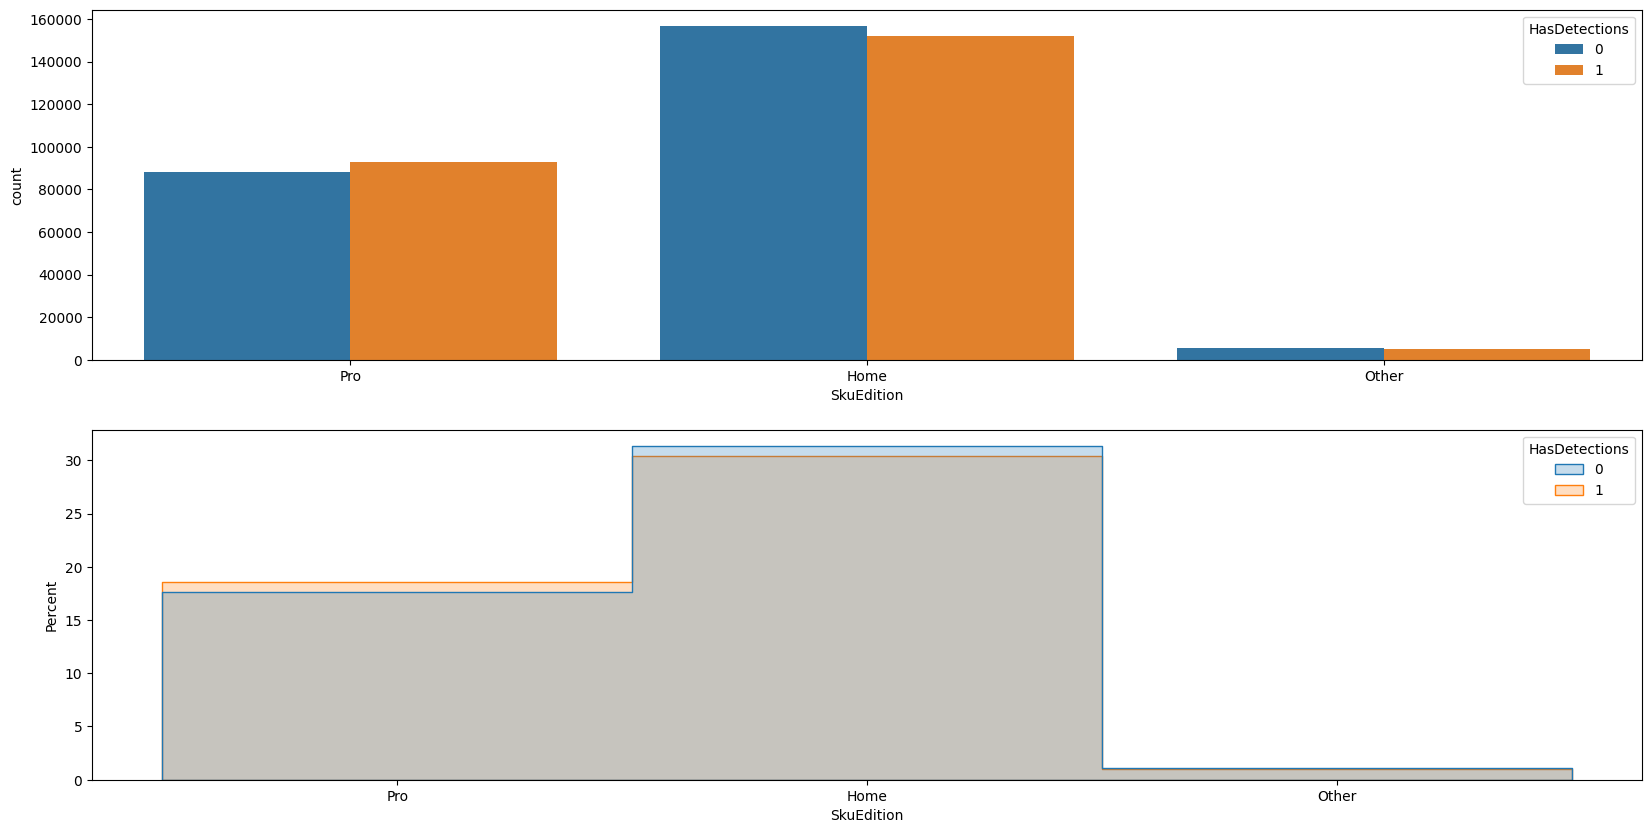

Equipos  Proporcion_Equipos  Infectados  Proporcion_Infectados
SkuEdition                                                                
Home         308567               61.71      152007                  49.26
Pro          181042               36.21       92853                  51.29
Other         10391                2.08        5093                  49.01

In [111]:
AnalisisAtributo(df,df.columns[23],tar=TARGET)

#### 3.24- Atributo[24] - IsProtected

Atributo Numérico
El atributo 'IsProtected' tiene 1926 valores nulos (0.39%)

Descripción estadístiica:
count   498,074.00
mean          0.95
std           0.23
min           0.00
25%           1.00
50%           1.00
75%           1.00
max           1.00
Name: IsProtected, dtype: float64

El atributo tiene 2 valores únicos

TOP 10 porcentaje de valores únicos:
IsProtected
1.00   94.21
0.00    5.40
NaN     0.39
Name: proportion, dtype: float64


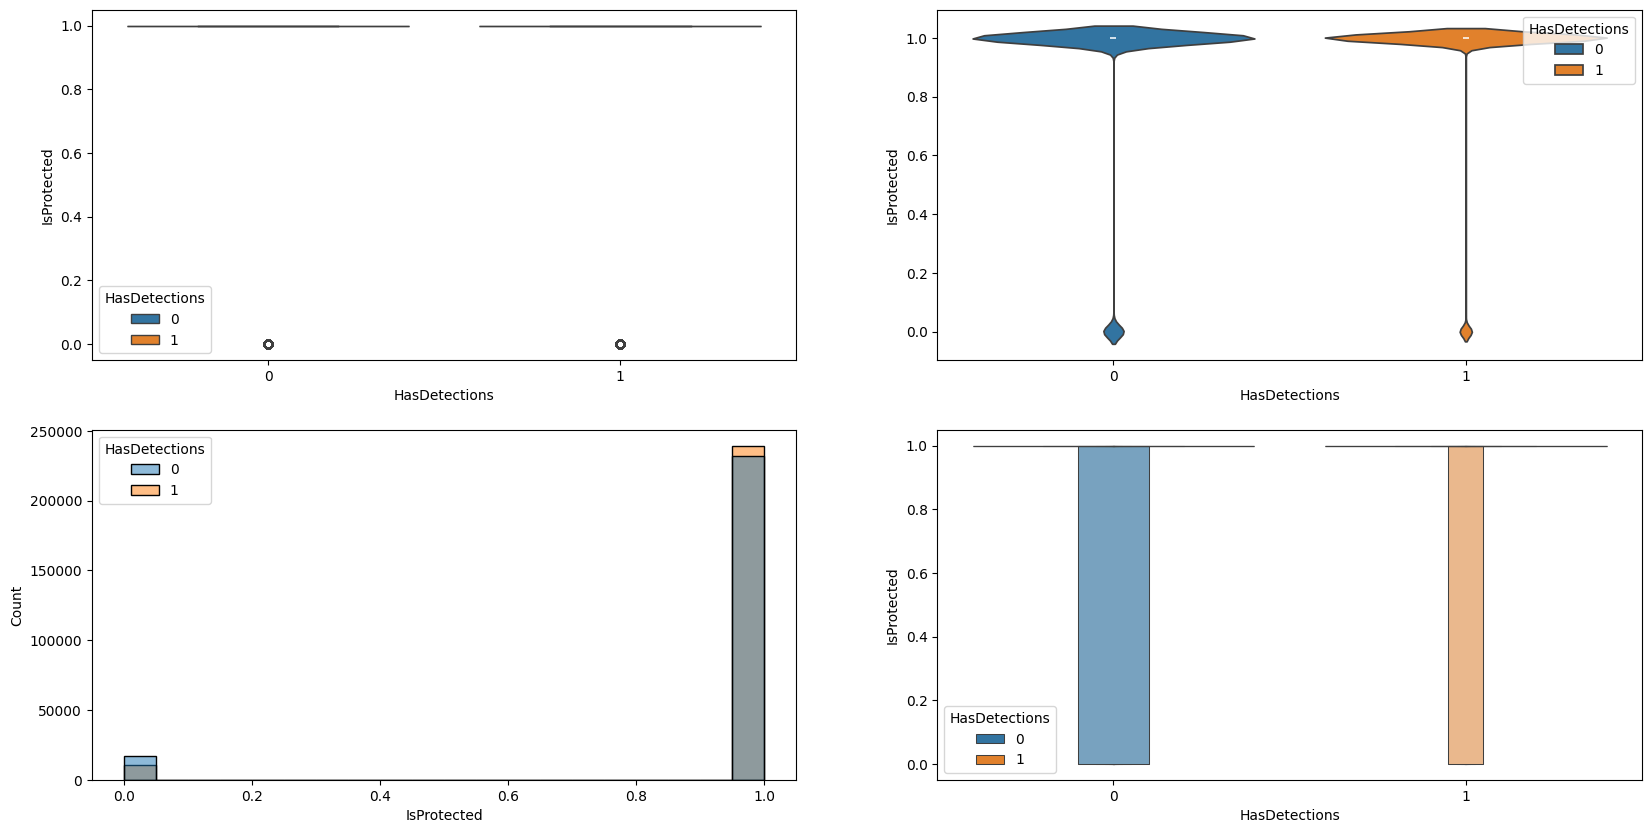

In [112]:
AnalisisAtributo(df,df.columns[24],tar=TARGET)

In [113]:
columns_to_delete.append(df.columns[24])

#### 3.25- Atributo[25] - AutoSampleOptIn

Atributo Numérico
El atributo 'AutoSampleOptIn' tiene 0 valores nulos (0.0%)

Descripción estadístiica:
count   500,000.00
mean          0.00
std           0.01
min           0.00
25%           0.00
50%           0.00
75%           0.00
max           1.00
Name: AutoSampleOptIn, dtype: float64

El atributo tiene 2 valores únicos

TOP 10 porcentaje de valores únicos:
AutoSampleOptIn
0   100.00
1     0.00
Name: proportion, dtype: float64


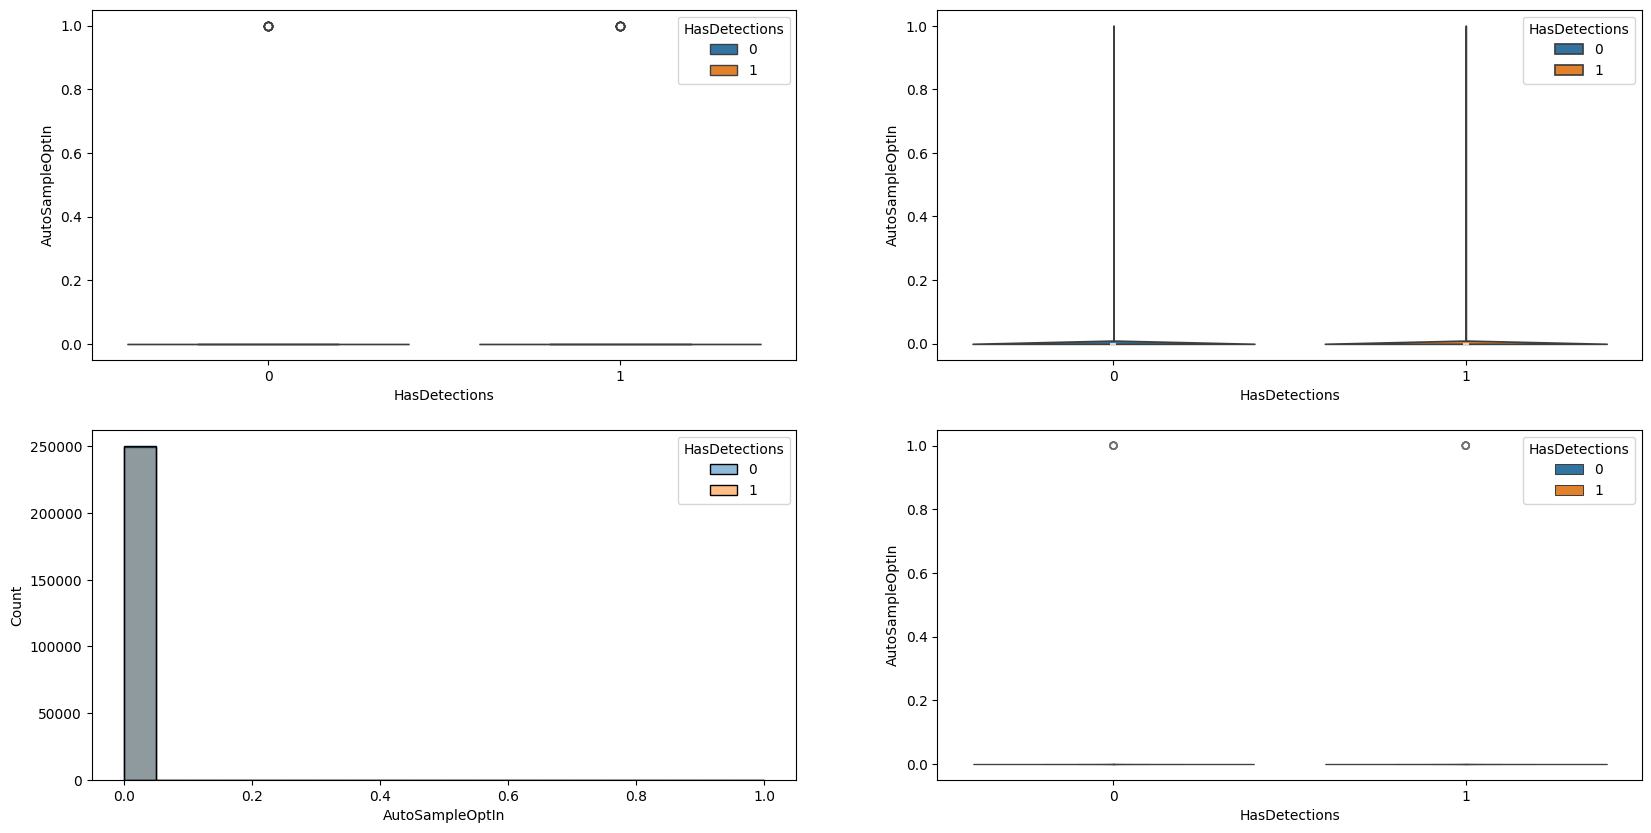

In [114]:
AnalisisAtributo(df,df.columns[25],tar=TARGET)

In [115]:
df['AutoSampleOptIn'].value_counts()

AutoSampleOptIn
0    499986
1        14
Name: count, dtype: int64

In [116]:
columns_to_delete.append(df.columns[25])

#### 3.26- Atributo[26] - PuaMode

Atributo Categórico
El atributo 'PuaMode' tiene 499874 valores nulos (99.97%)

Descripción estadístiica:

count     126
unique      1
top        on
freq      126
Name: PuaMode, dtype: object


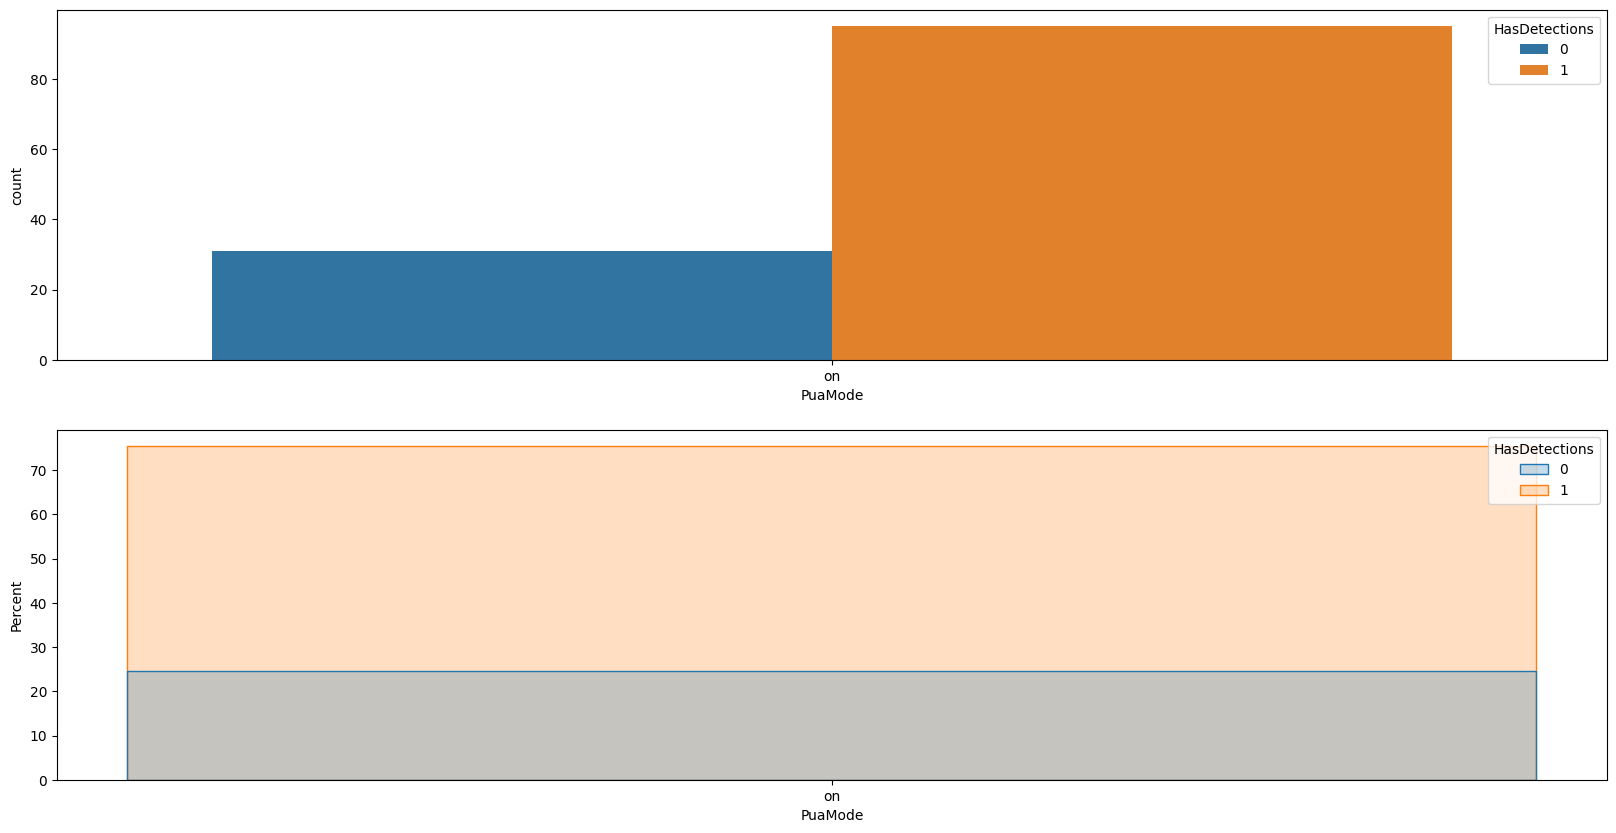

Equipos  Proporcion_Equipos  Infectados  Proporcion_Infectados
PuaMode                                                                
NaN       499874               99.97      249858                  49.98
on           126                0.03          95                  75.40

In [117]:
AnalisisAtributo(df,df.columns[26],tar=TARGET)

In [118]:
columns_to_delete.append(df.columns[26])

#### 3.27- Atributo[27] - SMode

Atributo Numérico
El atributo 'SMode' tiene 29848 valores nulos (5.97%)

Descripción estadístiica:
count   470,152.00
mean          0.00
std           0.02
min           0.00
25%           0.00
50%           0.00
75%           0.00
max           1.00
Name: SMode, dtype: float64

El atributo tiene 2 valores únicos

TOP 10 porcentaje de valores únicos:
SMode
0.00   93.99
NaN     5.97
1.00    0.04
Name: proportion, dtype: float64


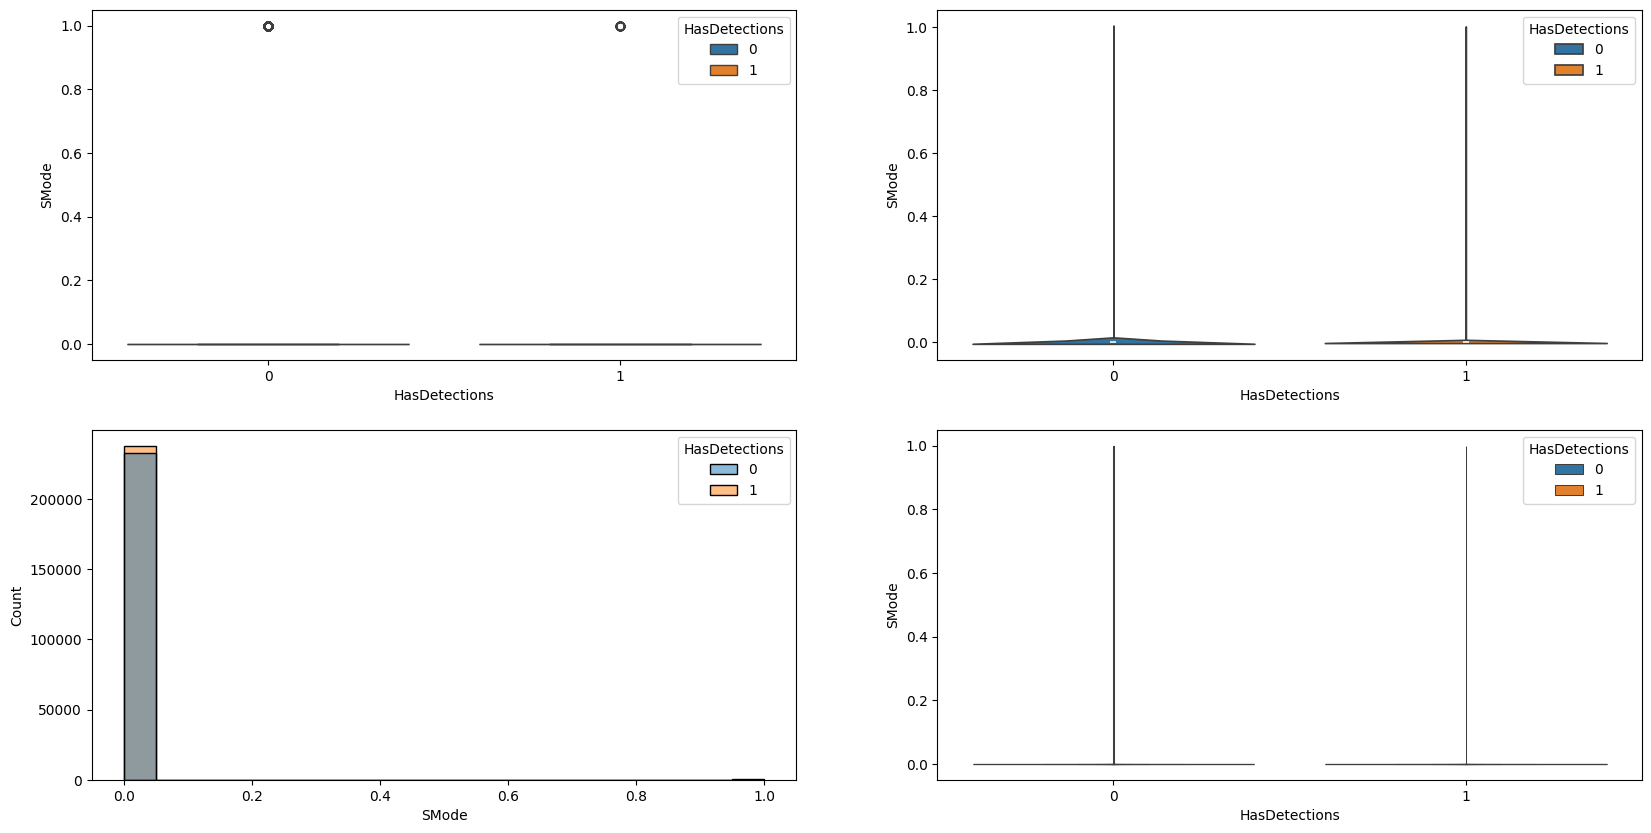

In [119]:
AnalisisAtributo(df,df.columns[27],tar=TARGET)

In [120]:
df['SMode'].value_counts(normalize=True)*100

SMode
0.00   99.96
1.00    0.04
Name: proportion, dtype: float64

In [121]:
columns_to_delete.append(df.columns[27])

#### 3.28- Atributo[28] - IeVerIdentifier

Atributo Numérico
El atributo 'IeVerIdentifier' tiene 3209 valores nulos (0.64%)

Descripción estadístiica:
count   496,791.00
mean        126.66
std          42.63
min           8.00
25%         111.00
50%         135.00
75%         137.00
max         429.00
Name: IeVerIdentifier, dtype: float64

El atributo tiene 179 valores únicos

TOP 10 porcentaje de valores únicos:
IeVerIdentifier
137.00   43.83
117.00   19.73
108.00    5.27
111.00    5.23
98.00     3.95
135.00    2.46
74.00     2.28
53.00     2.27
94.00     1.94
105.00    1.94
Name: proportion, dtype: float64


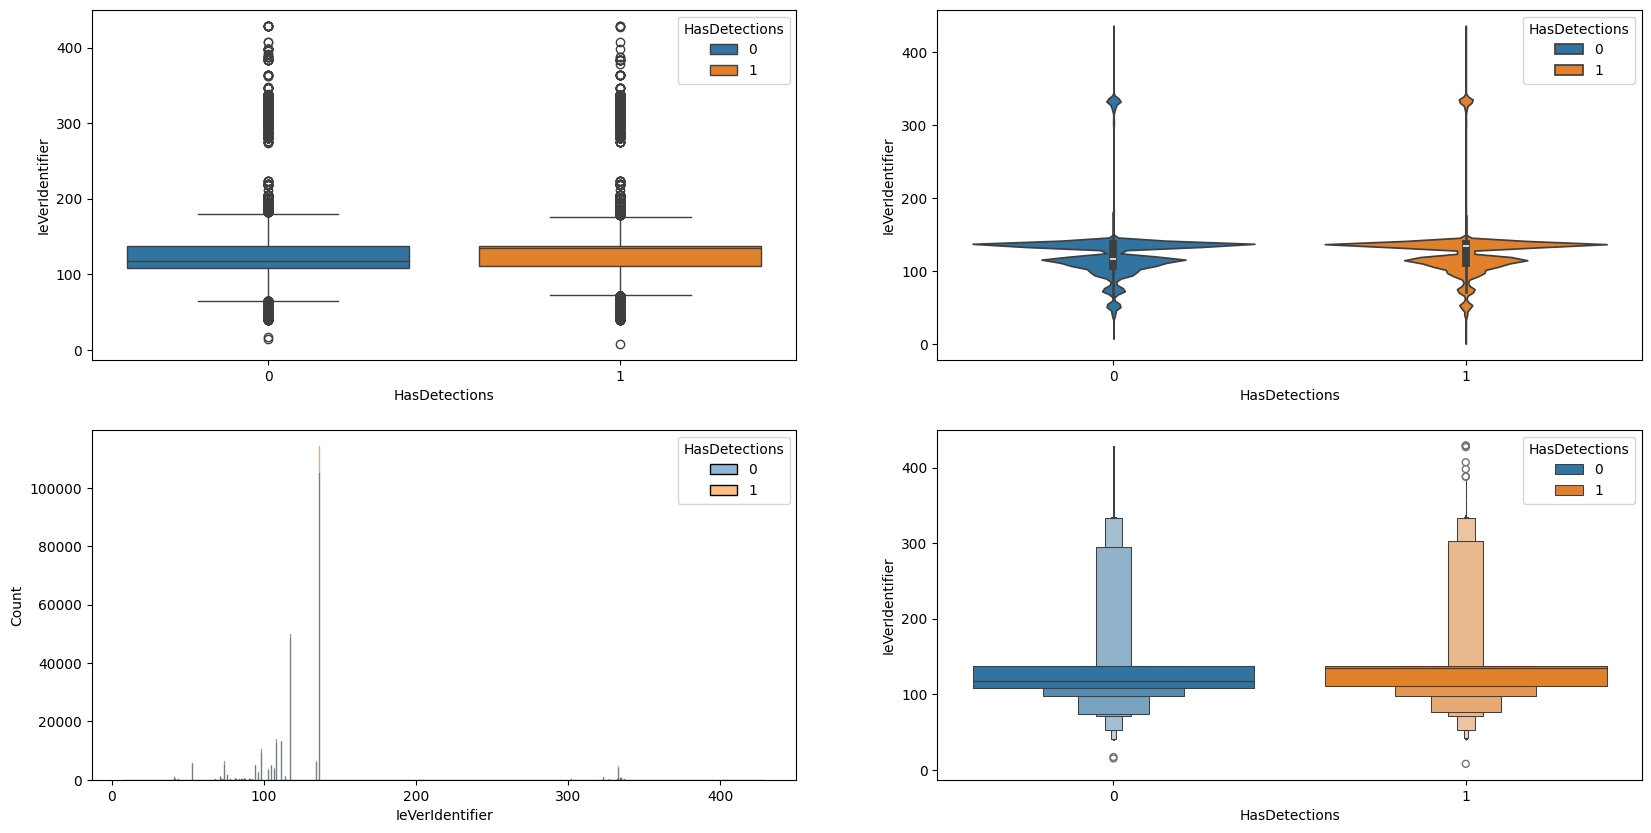

In [122]:
AnalisisAtributo(df,df.columns[28],tar=TARGET)

In [123]:
(df['IeVerIdentifier'].value_counts(dropna=False,normalize=True)*100).head(15)

IeVerIdentifier
137.00   43.83
117.00   19.73
108.00    5.27
111.00    5.23
98.00     3.95
135.00    2.46
74.00     2.28
53.00     2.27
94.00     1.94
105.00    1.94
333.00    1.75
107.00    1.42
103.00    1.27
96.00     0.94
76.00     0.65
Name: proportion, dtype: float64

In [124]:
top5=df['IeVerIdentifier'].value_counts(normalize=True).head().index.tolist()
df['IeVerIdentifier']=df['IeVerIdentifier'].apply(lambda x: x if x in top5 else 0)
del(top5)

Atributo Numérico
El atributo 'IeVerIdentifier' tiene 0 valores nulos (0.0%)

Descripción estadístiica:
count   500,000.00
mean         98.50
std          53.52
min           0.00
25%          98.00
50%         117.00
75%         137.00
max         137.00
Name: IeVerIdentifier, dtype: float64

El atributo tiene 6 valores únicos

TOP 10 porcentaje de valores únicos:
IeVerIdentifier
137.00   43.83
0.00     21.99
117.00   19.73
108.00    5.27
111.00    5.23
98.00     3.95
Name: proportion, dtype: float64


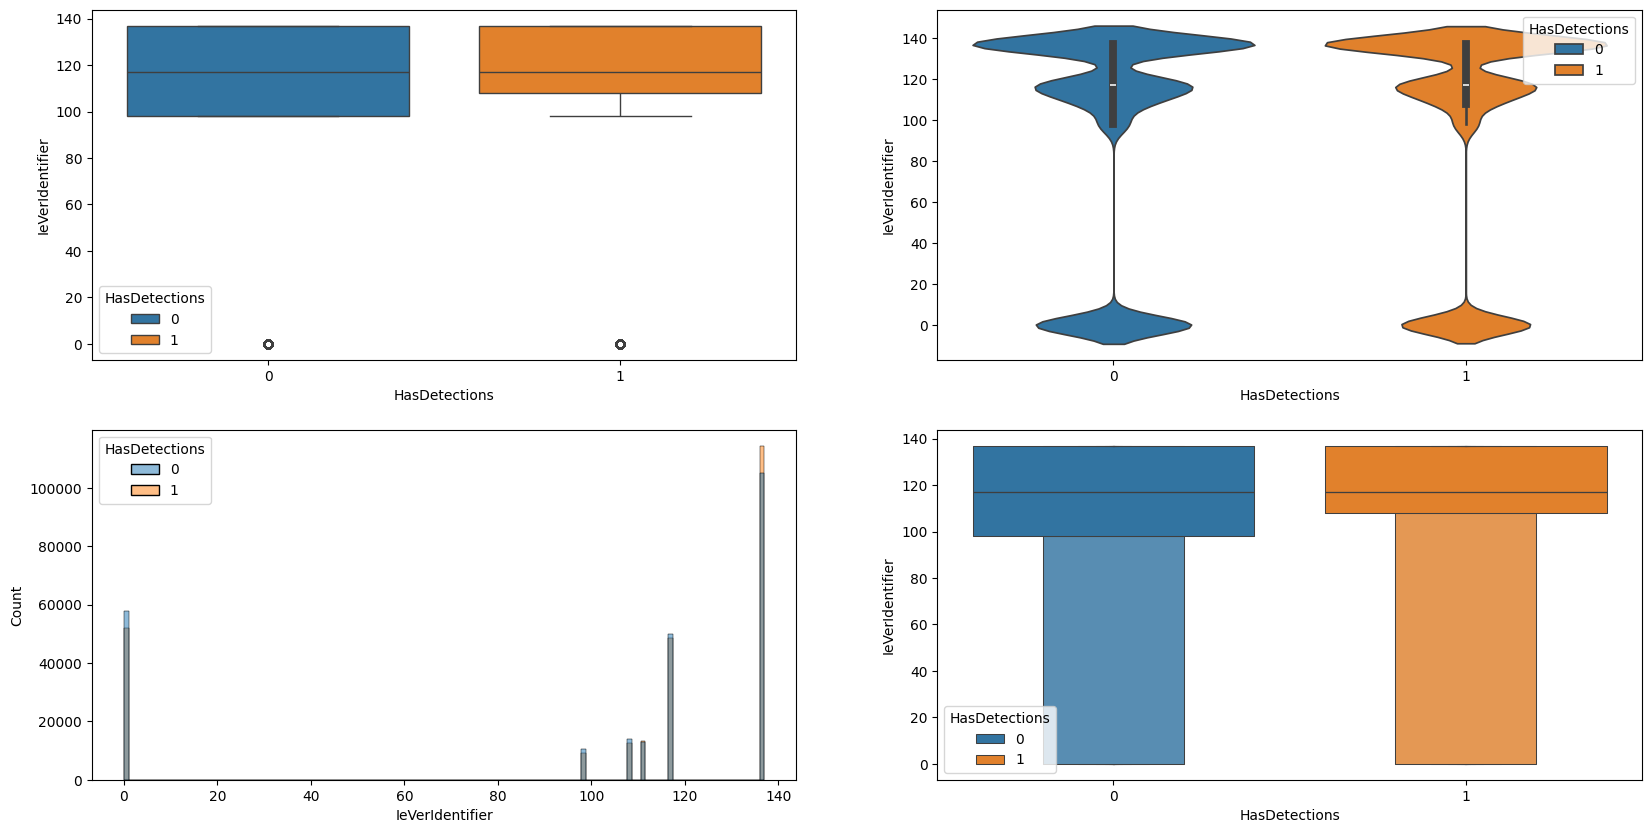

In [125]:
AnalisisAtributo(df,df.columns[28],tar=TARGET)

#### 3.29- Atributo[29] - SmartScreen

Atributo Categórico
El atributo 'SmartScreen' tiene 178596 valores nulos (35.72%)

Descripción estadístiica:

count           321404
unique              12
top       RequireAdmin
freq            241594
Name: SmartScreen, dtype: object


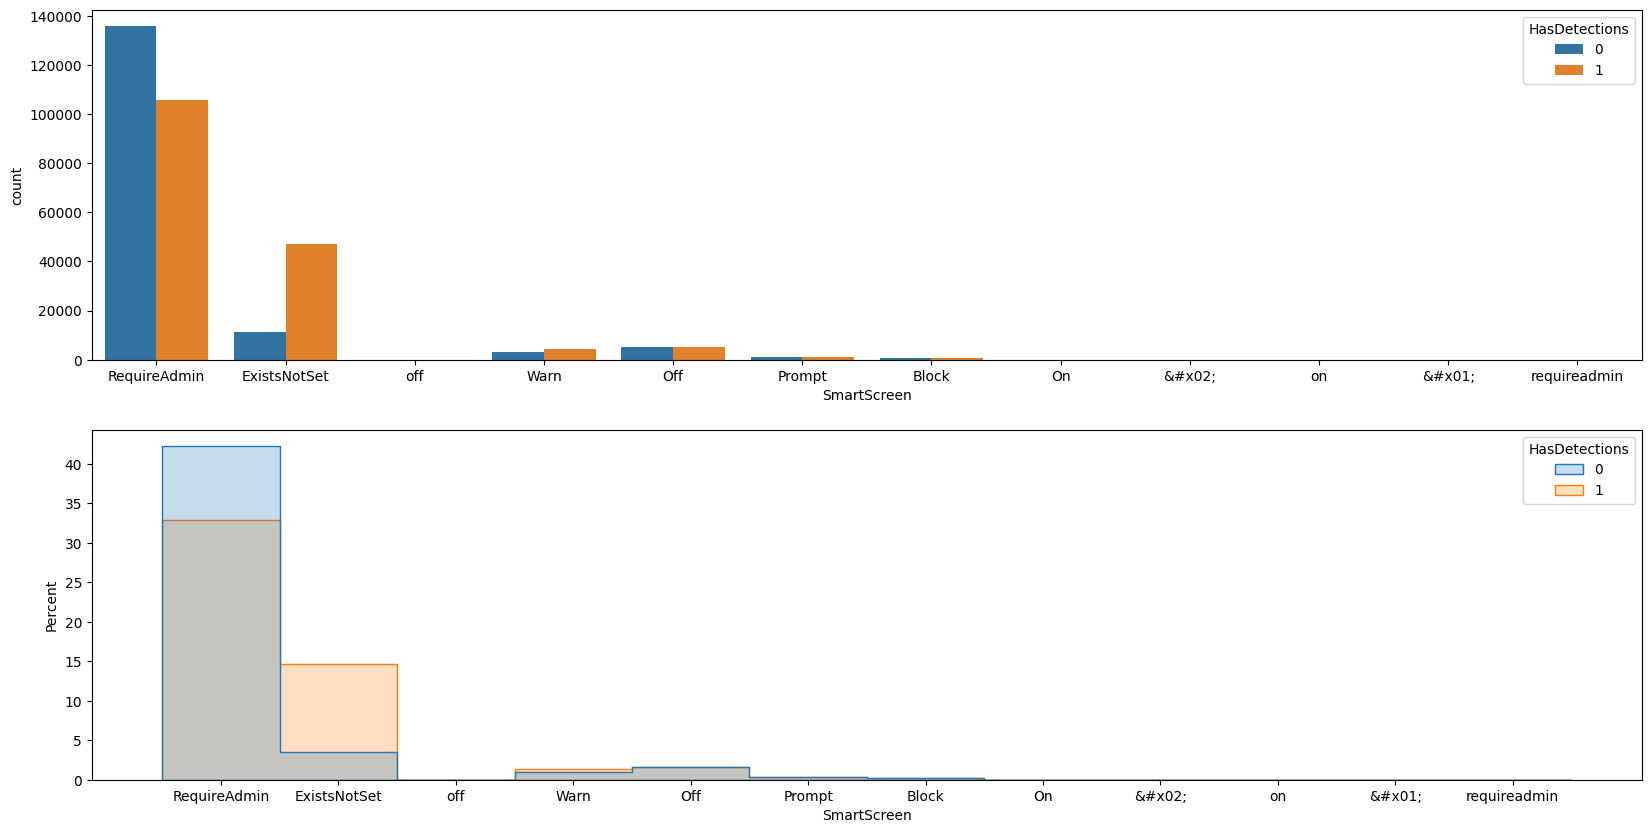

Equipos  Proporcion_Equipos  Infectados  Proporcion_Infectados
SmartScreen                                                                 
RequireAdmin   241594               48.32      105890                  43.83
NaN            178596               35.72       85919                  48.11
ExistsNotSet    58497               11.70       47115                  80.54
Off             10388                2.08        5055                  48.66
Warn             7530                1.51        4306                  57.18
Prompt           1950                0.39         928                  47.59
Block            1274                0.25         640                  50.24
off                75                0.02          43                  57.33
On                 53                0.01          36                  67.92
&#x02;             20                0.00          11                  55.00
&#x01;             14                0.00           6                  42.86
on                  8                0.00           4                  50.00
requireadmin        1                0.00           0                   0.00

In [126]:
AnalisisAtributo(df,df.columns[29],tar=TARGET)

In [127]:
columns_to_delete.append(df.columns[29])

#### 3.30- Atributo[30] - Firewall

Atributo Numérico
El atributo 'Firewall' tiene 5162 valores nulos (1.03%)

Descripción estadístiica:
count   494,838.00
mean          0.98
std           0.15
min           0.00
25%           1.00
50%           1.00
75%           1.00
max           1.00
Name: Firewall, dtype: float64

El atributo tiene 2 valores únicos

TOP 10 porcentaje de valores únicos:
Firewall
1.00   96.81
0.00    2.15
NaN     1.03
Name: proportion, dtype: float64


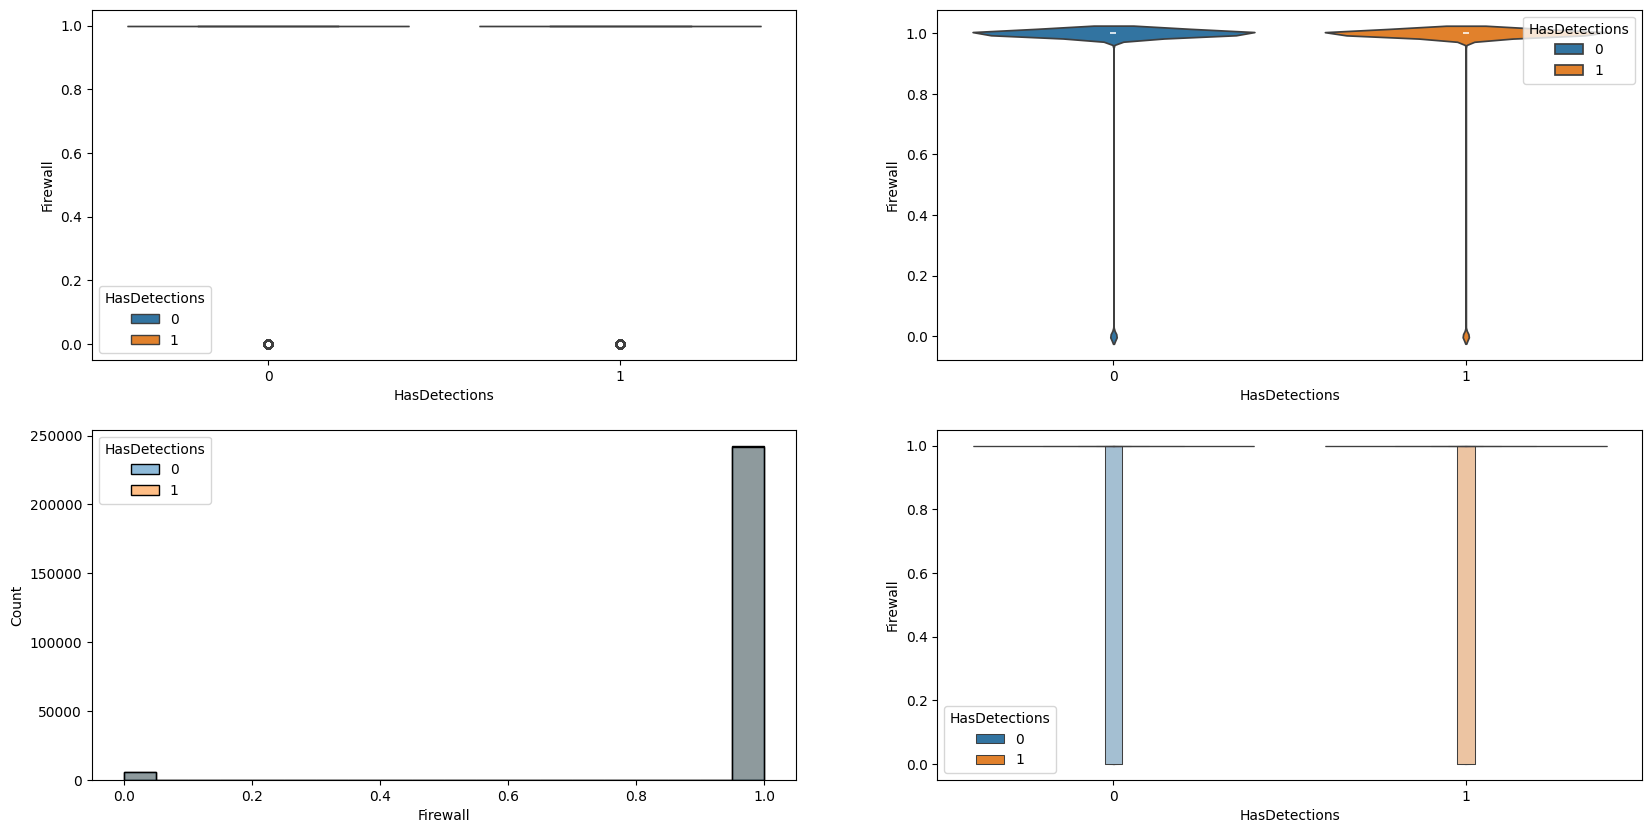

In [128]:
AnalisisAtributo(df,df.columns[30],tar=TARGET)

In [129]:
columns_to_delete.append(df.columns[30])

#### 3.31- Atributo[31] - UacLuaenable

Atributo Numérico
El atributo 'UacLuaenable' tiene 623 valores nulos (0.12%)

Descripción estadístiica:
count     499,377.00
mean           13.73
std         8,995.85
min             0.00
25%             1.00
50%             1.00
75%             1.00
max     6,357,062.00
Name: UacLuaenable, dtype: float64

El atributo tiene 5 valores únicos

TOP 10 porcentaje de valores únicos:
UacLuaenable
1.00           99.26
0.00            0.62
NaN             0.12
48.00           0.00
2.00            0.00
6,357,062.00    0.00
Name: proportion, dtype: float64


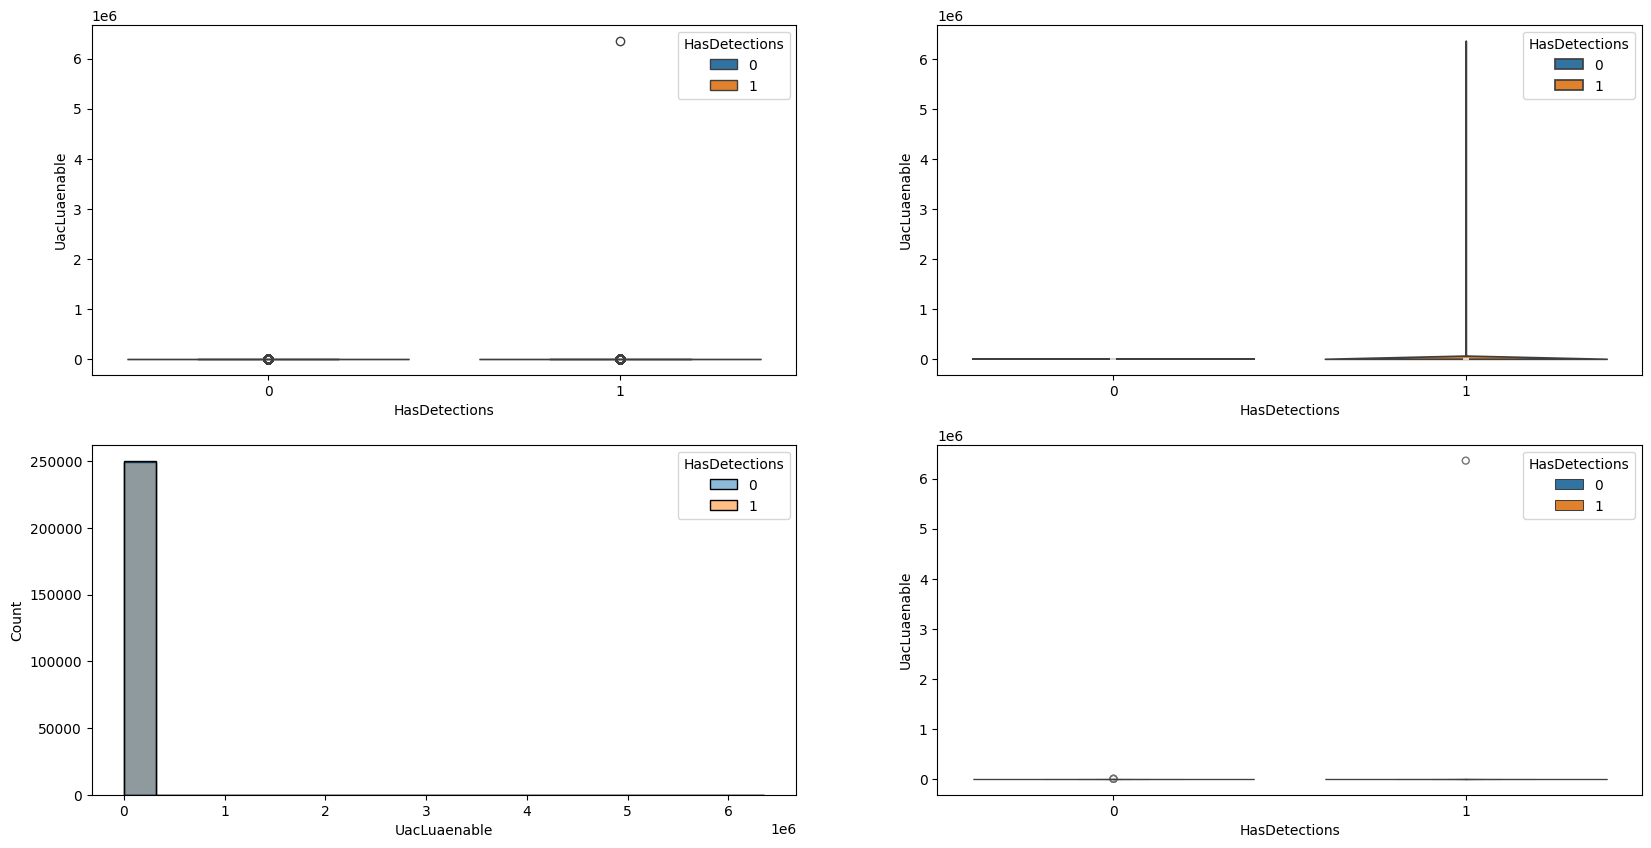

In [130]:
AnalisisAtributo(df,df.columns[31],tar=TARGET)

In [131]:
columns_to_delete.append(df.columns[31])

#### 3.32- Atributo[32] - Census_MDC2FormFactor

Atributo Categórico
El atributo 'Census_MDC2FormFactor' tiene 0 valores nulos (0.0%)

Descripción estadístiica:

count       500000
unique          12
top       Notebook
freq        320948
Name: Census_MDC2FormFactor, dtype: object


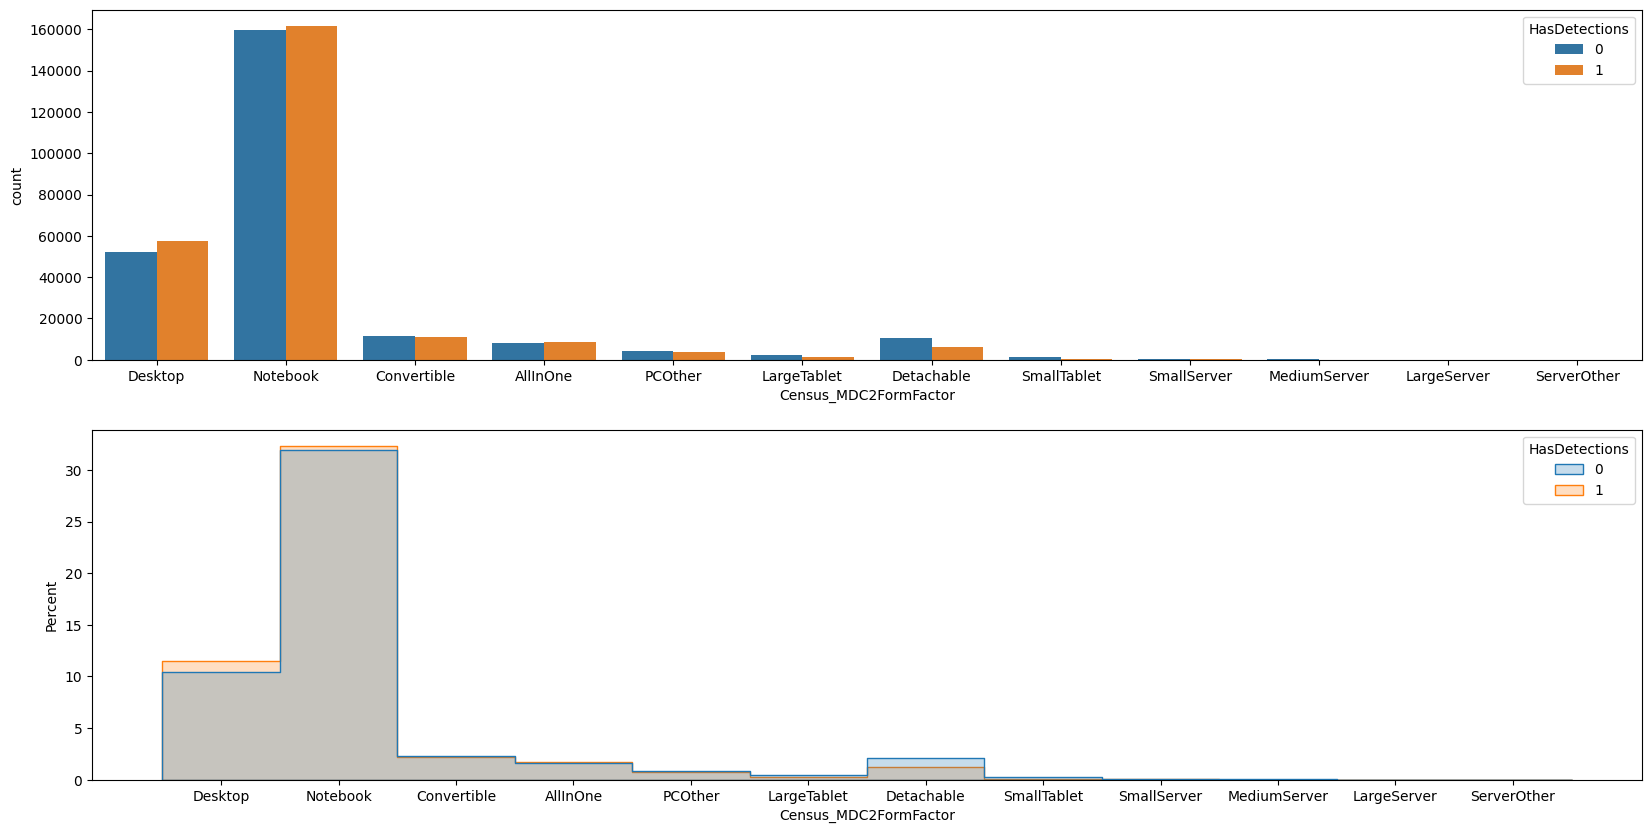

Equipos  Proporcion_Equipos  Infectados  \
Census_MDC2FormFactor                                            
Notebook                320948               64.19      161411   
Desktop                 109527               21.91       57306   
Convertible              22369                4.47       11025   
Detachable               16802                3.36        6351   
AllInOne                 16372                3.27        8384   
PCOther                   7800                1.56        3715   
LargeTablet               3645                0.73        1138   
SmallTablet               1797                0.36         360   
SmallServer                496                0.10         191   
MediumServer               192                0.04          62   
LargeServer                 50                0.01          10   
ServerOther                  2                0.00           0   

                       Proporcion_Infectados  
Census_MDC2FormFactor                         
Notebook                               50.29  
Desktop                                52.32  
Convertible                            49.29  
Detachable                             37.80  
AllInOne                               51.21  
PCOther                                47.63  
LargeTablet                            31.22  
SmallTablet                            20.03  
SmallServer                            38.51  
MediumServer                           32.29  
LargeServer                            20.00  
ServerOther                             0.00

In [132]:
AnalisisAtributo(df,df.columns[32],tar=TARGET)

In [133]:
top2=('Notebook', 'Desktop')
df['Census_MDC2FormFactor']=df['Census_MDC2FormFactor'].apply(lambda x: x if x in top2 else 'Other')
del(top2)

Atributo Categórico
El atributo 'Census_MDC2FormFactor' tiene 0 valores nulos (0.0%)

Descripción estadístiica:

count       500000
unique           3
top       Notebook
freq        320948
Name: Census_MDC2FormFactor, dtype: object


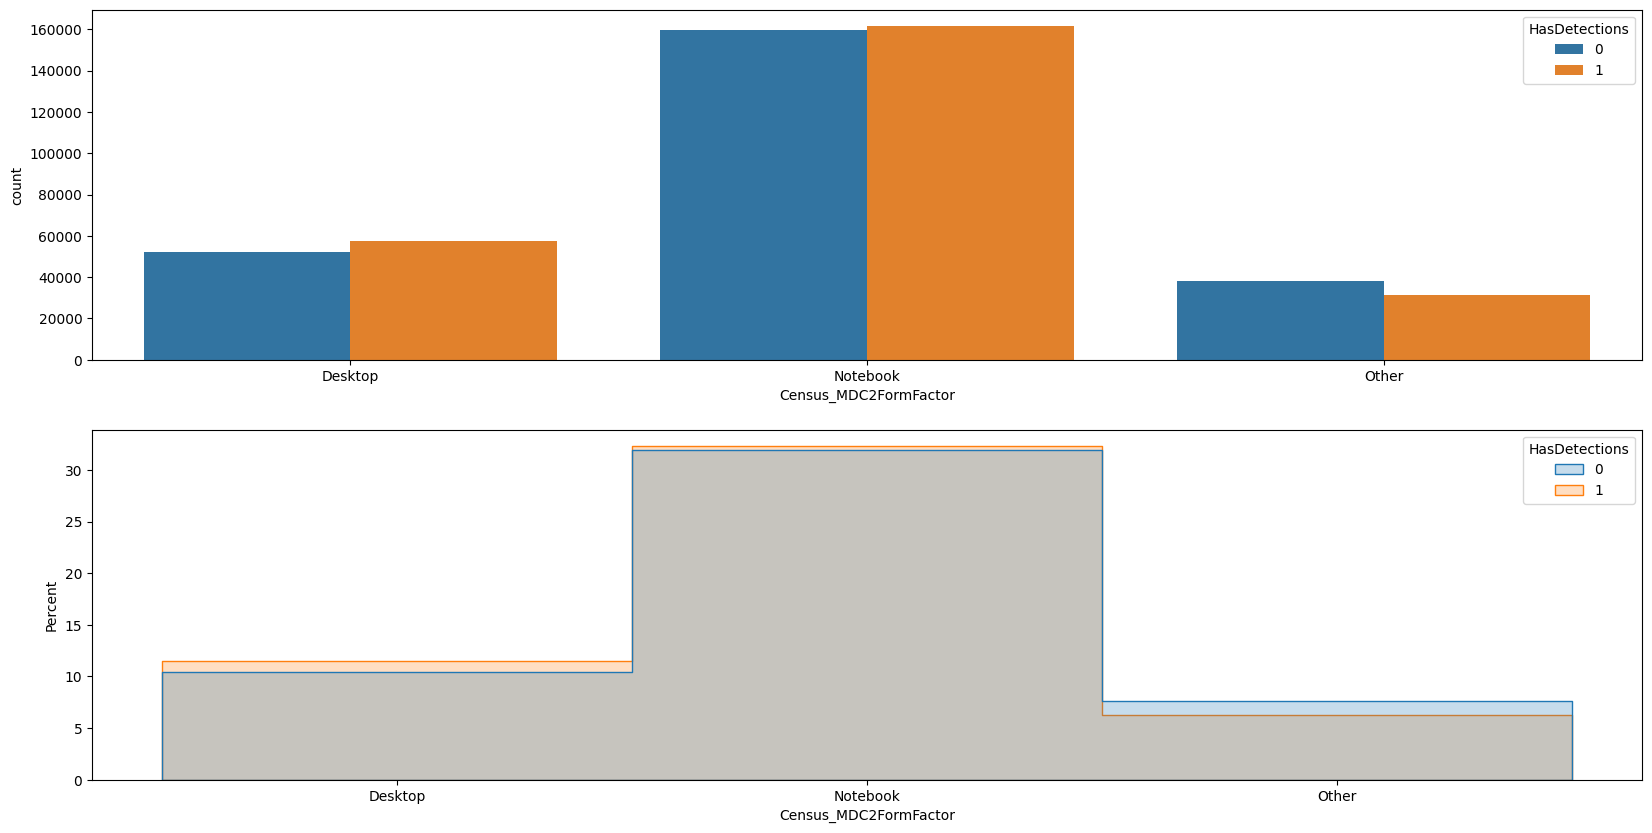

Equipos  Proporcion_Equipos  Infectados  \
Census_MDC2FormFactor                                            
Notebook                320948               64.19      161411   
Desktop                 109527               21.91       57306   
Other                    69525               13.90       31236   

                       Proporcion_Infectados  
Census_MDC2FormFactor                         
Notebook                               50.29  
Desktop                                52.32  
Other                                  44.93

In [134]:
AnalisisAtributo(df,df.columns[32],tar=TARGET)

#### 3.33- Atributo[33] - Census_DeviceFamily

Atributo Categórico
El atributo 'Census_DeviceFamily' tiene 0 valores nulos (0.0%)

Descripción estadístiica:

count              500000
unique                  3
top       Windows.Desktop
freq               499183
Name: Census_DeviceFamily, dtype: object


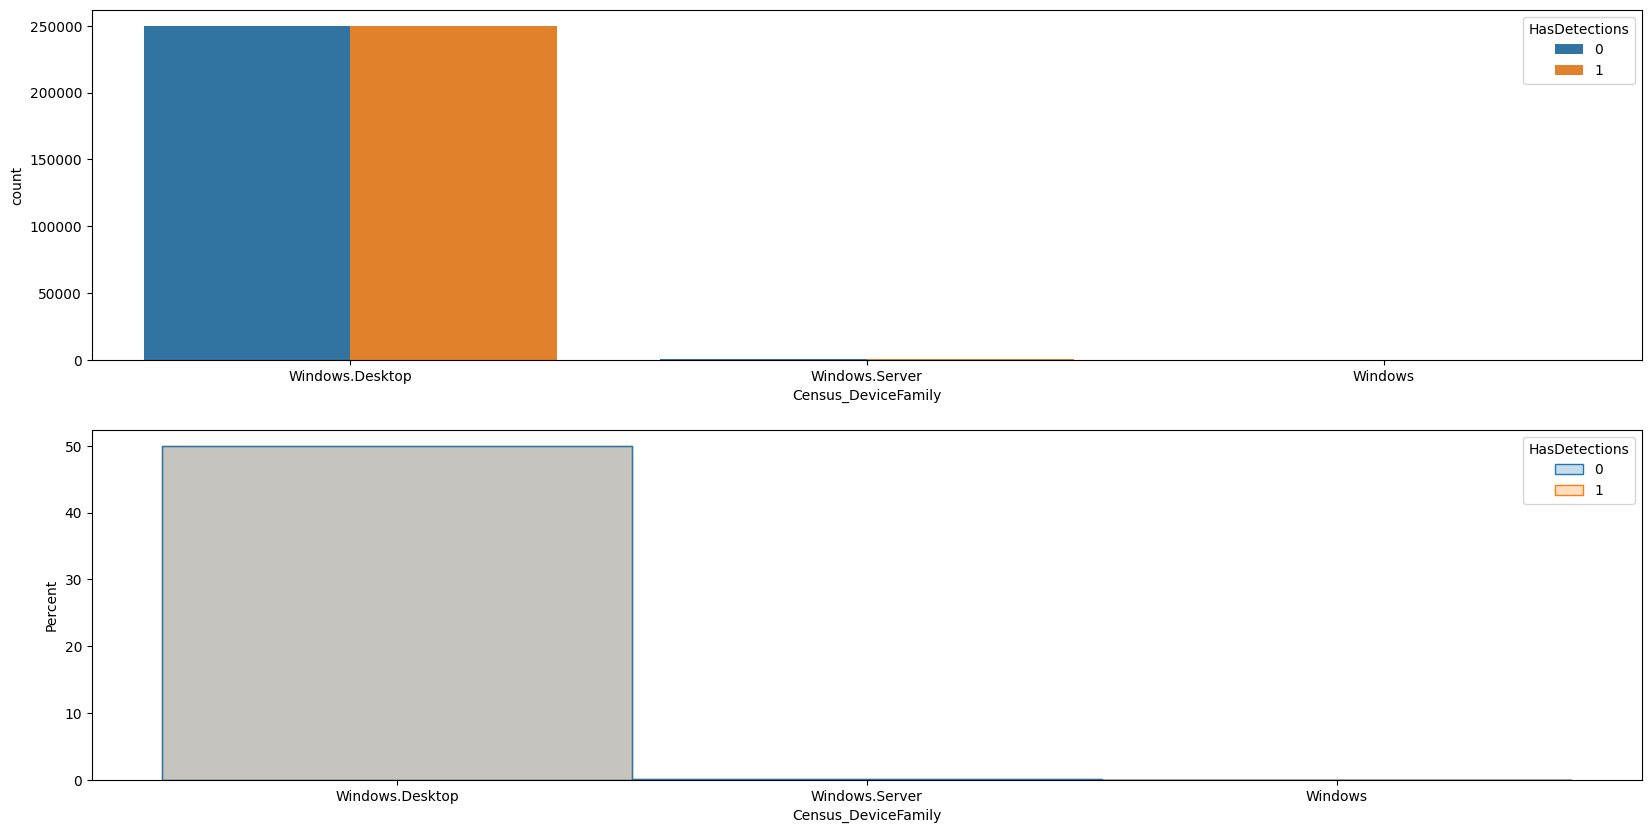

Equipos  Proporcion_Equipos  Infectados  \
Census_DeviceFamily                                            
Windows.Desktop       499183               99.84      249651   
Windows.Server           816                0.16         302   
Windows                    1                0.00           0   

                     Proporcion_Infectados  
Census_DeviceFamily                         
Windows.Desktop                      50.01  
Windows.Server                       37.01  
Windows                               0.00

In [135]:
AnalisisAtributo(df,df.columns[33],tar=TARGET)

In [136]:
columns_to_delete.append(df.columns[33])

#### 3.34- Atributo[34] - Census_OEMNameIdentifier

Atributo Numérico
El atributo 'Census_OEMNameIdentifier' tiene 5381 valores nulos (1.08%)

Descripción estadístiica:
count   494,619.00
mean      2,218.65
std       1,315.71
min          54.00
25%       1,443.00
50%       2,102.00
75%       2,668.00
max       6,143.00
Name: Census_OEMNameIdentifier, dtype: float64

El atributo tiene 1589 valores únicos

TOP 10 porcentaje de valores únicos:
Census_OEMNameIdentifier
2,668.00   14.40
2,102.00   11.58
1,443.00   10.64
2,206.00   10.38
585.00     10.06
525.00      9.46
4,589.00    3.48
4,730.00    3.40
1,980.00    3.23
4,142.00    2.24
Name: proportion, dtype: float64


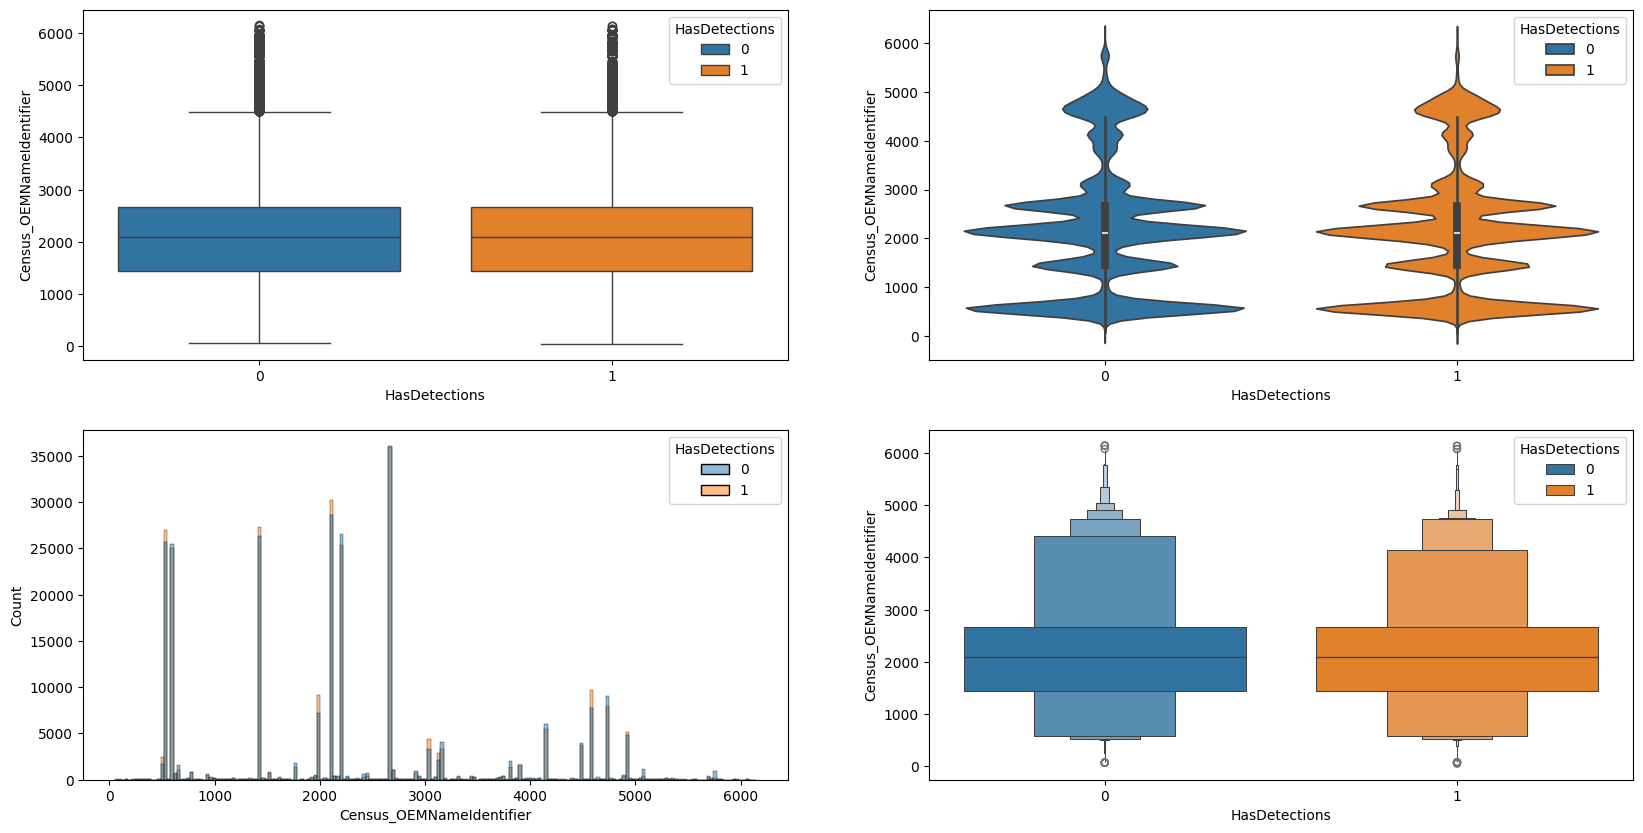

In [137]:
AnalisisAtributo(df,df.columns[34],tar=TARGET)

In [138]:
(df['Census_OEMNameIdentifier'].value_counts(dropna=False, normalize=False)).head(20)

Census_OEMNameIdentifier
2,668.00    72011
2,102.00    57924
1,443.00    53210
2,206.00    51888
585.00      50304
525.00      47299
4,589.00    17404
4,730.00    16993
1,980.00    16157
4,142.00    11212
4,490.00     7727
4,909.00     7638
3,035.00     7596
3,150.00     7249
NaN          5381
3,133.00     4504
530.00       4219
516.00       4069
1,780.00     2779
666.00       2681
Name: count, dtype: int64

In [139]:
top10=(df['Census_OEMNameIdentifier'].value_counts(dropna=False, normalize=False)).head(10).index.tolist()
df['Census_OEMNameIdentifier']=df['Census_OEMNameIdentifier'].apply(lambda x: x if x in top10 else 0)
del(top10)

Atributo Numérico
El atributo 'Census_OEMNameIdentifier' tiene 0 valores nulos (0.0%)

Descripción estadístiica:
count   500,000.00
mean      1,596.13
std       1,334.66
min           0.00
25%         525.00
50%       1,443.00
75%       2,206.00
max       4,730.00
Name: Census_OEMNameIdentifier, dtype: float64

El atributo tiene 11 valores únicos

TOP 10 porcentaje de valores únicos:
Census_OEMNameIdentifier
0.00       21.12
2,668.00   14.40
2,102.00   11.58
1,443.00   10.64
2,206.00   10.38
585.00     10.06
525.00      9.46
4,589.00    3.48
4,730.00    3.40
1,980.00    3.23
Name: proportion, dtype: float64


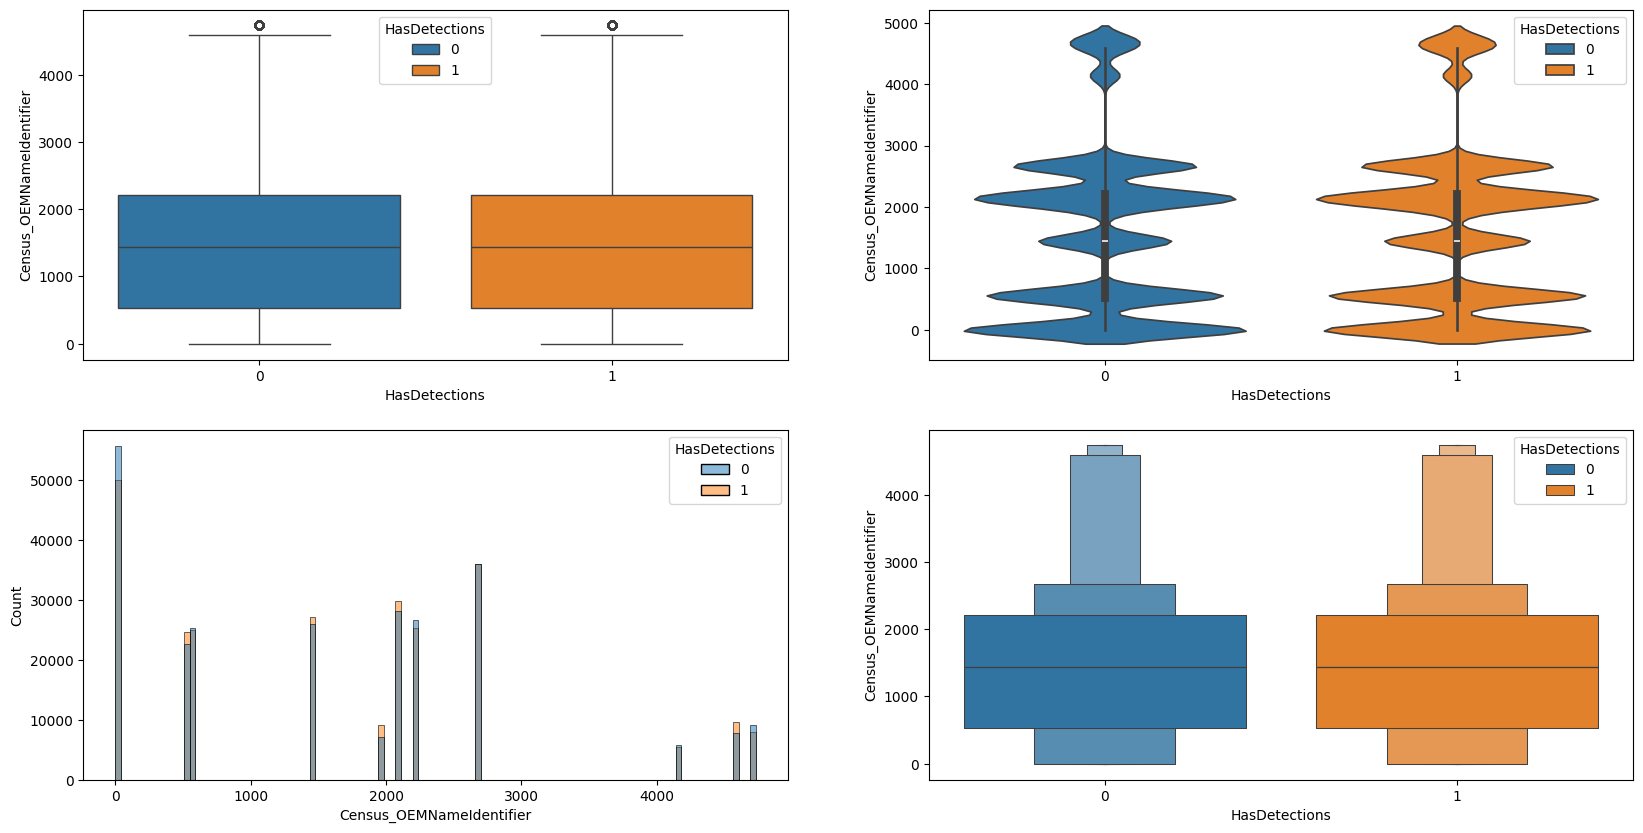

In [140]:
AnalisisAtributo(df,df.columns[34],tar=TARGET)

#### 3.35- Atributo[35] - Census_OEMModelIdentifier

Atributo Numérico
El atributo 'Census_OEMModelIdentifier' tiene 5764 valores nulos (1.15%)

Descripción estadístiica:
count   494,236.00
mean    239,128.05
std      72,048.88
min           1.00
25%     189,641.75
50%     247,520.00
75%     304,438.00
max     345,493.00
Name: Census_OEMModelIdentifier, dtype: float64

El atributo tiene 40697 valores únicos

TOP 10 porcentaje de valores únicos:
Census_OEMModelIdentifier
313,586.00   3.42
242,491.00   2.95
317,701.00   1.54
317,708.00   1.31
NaN          1.15
228,975.00   0.88
188,345.00   0.81
241,876.00   0.79
245,824.00   0.76
244,755.00   0.57
Name: proportion, dtype: float64


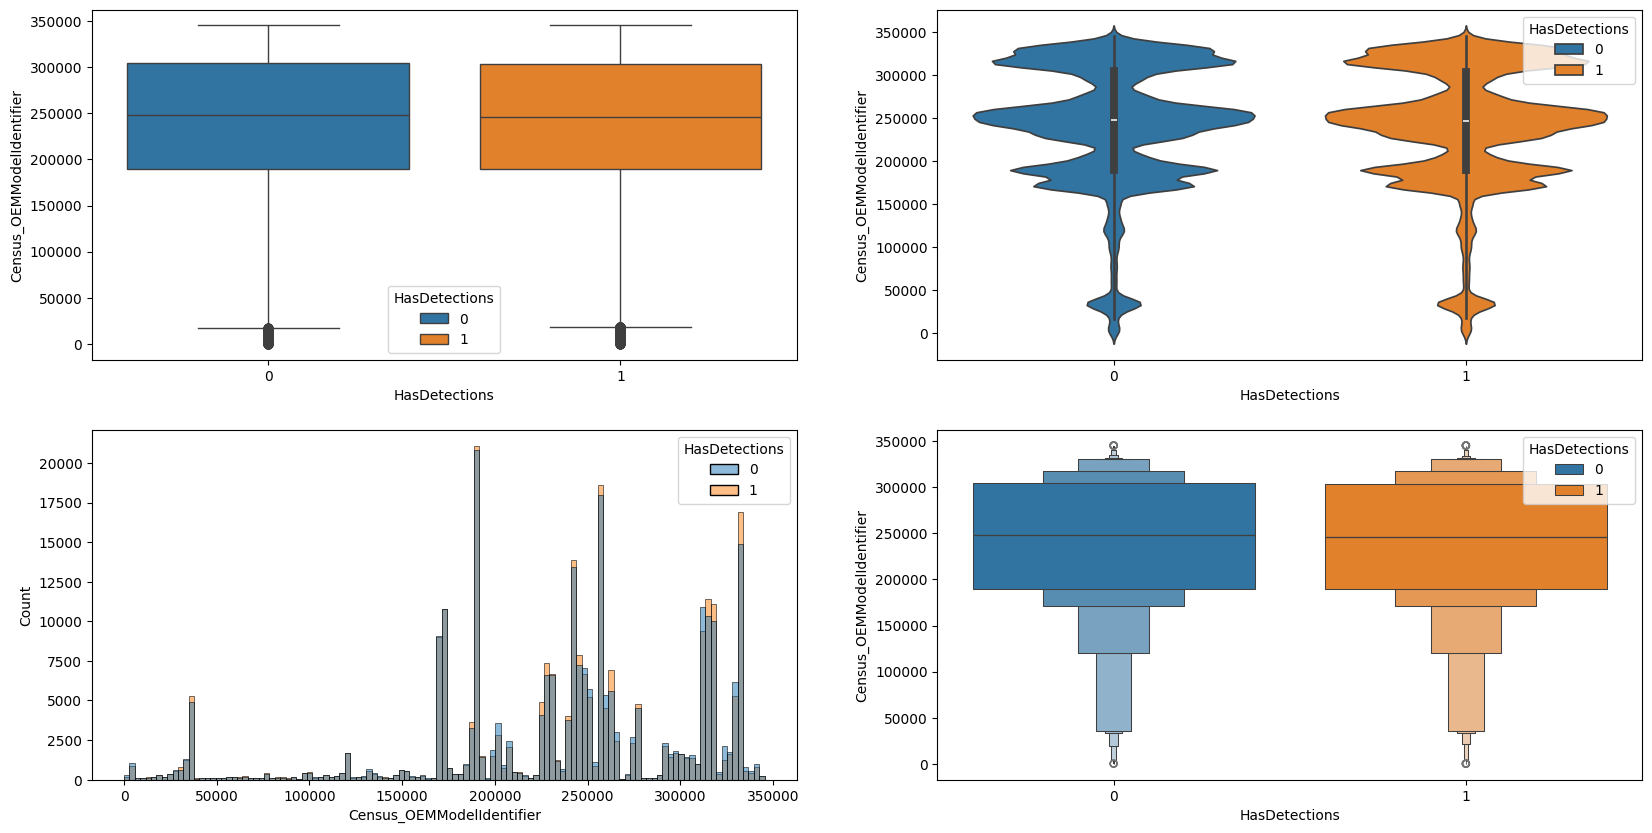

In [141]:
AnalisisAtributo(df,df.columns[35],tar=TARGET)

In [142]:
(df['Census_OEMModelIdentifier'].value_counts(dropna=True, normalize=False)).head(25)

Census_OEMModelIdentifier
313,586.00    17092
242,491.00    14726
317,701.00     7676
317,708.00     6541
228,975.00     4389
188,345.00     4063
241,876.00     3929
245,824.00     3815
244,755.00     2826
248,045.00     2496
313,507.00     2115
256,480.00     1954
241,805.00     1839
251,630.00     1682
171,320.00     1631
246,715.00     1622
241,911.00     1574
229,920.00     1535
228,726.00     1497
256,585.00     1493
313,506.00     1328
313,504.00     1283
248,395.00     1254
256,682.00     1248
229,929.00     1195
Name: count, dtype: int64

In [143]:
df[['Census_OEMModelIdentifier']][df['Census_OEMModelIdentifier']<1000].sum()

Census_OEMModelIdentifier   65,013.00
dtype: float64

#### 3.36- Atributo[36] - Census_ProcessorCoreCount

Atributo Numérico
El atributo 'Census_ProcessorCoreCount' tiene 2347 valores nulos (0.47%)

Descripción estadístiica:
count   497,653.00
mean          3.99
std           2.07
min           1.00
25%           2.00
50%           4.00
75%           4.00
max          88.00
Name: Census_ProcessorCoreCount, dtype: float64

El atributo tiene 27 valores únicos

TOP 10 porcentaje de valores únicos:
Census_ProcessorCoreCount
4.00    60.82
2.00    25.84
8.00     9.80
12.00    1.04
6.00     0.80
1.00     0.80
NaN      0.47
16.00    0.20
3.00     0.15
32.00    0.02
Name: proportion, dtype: float64


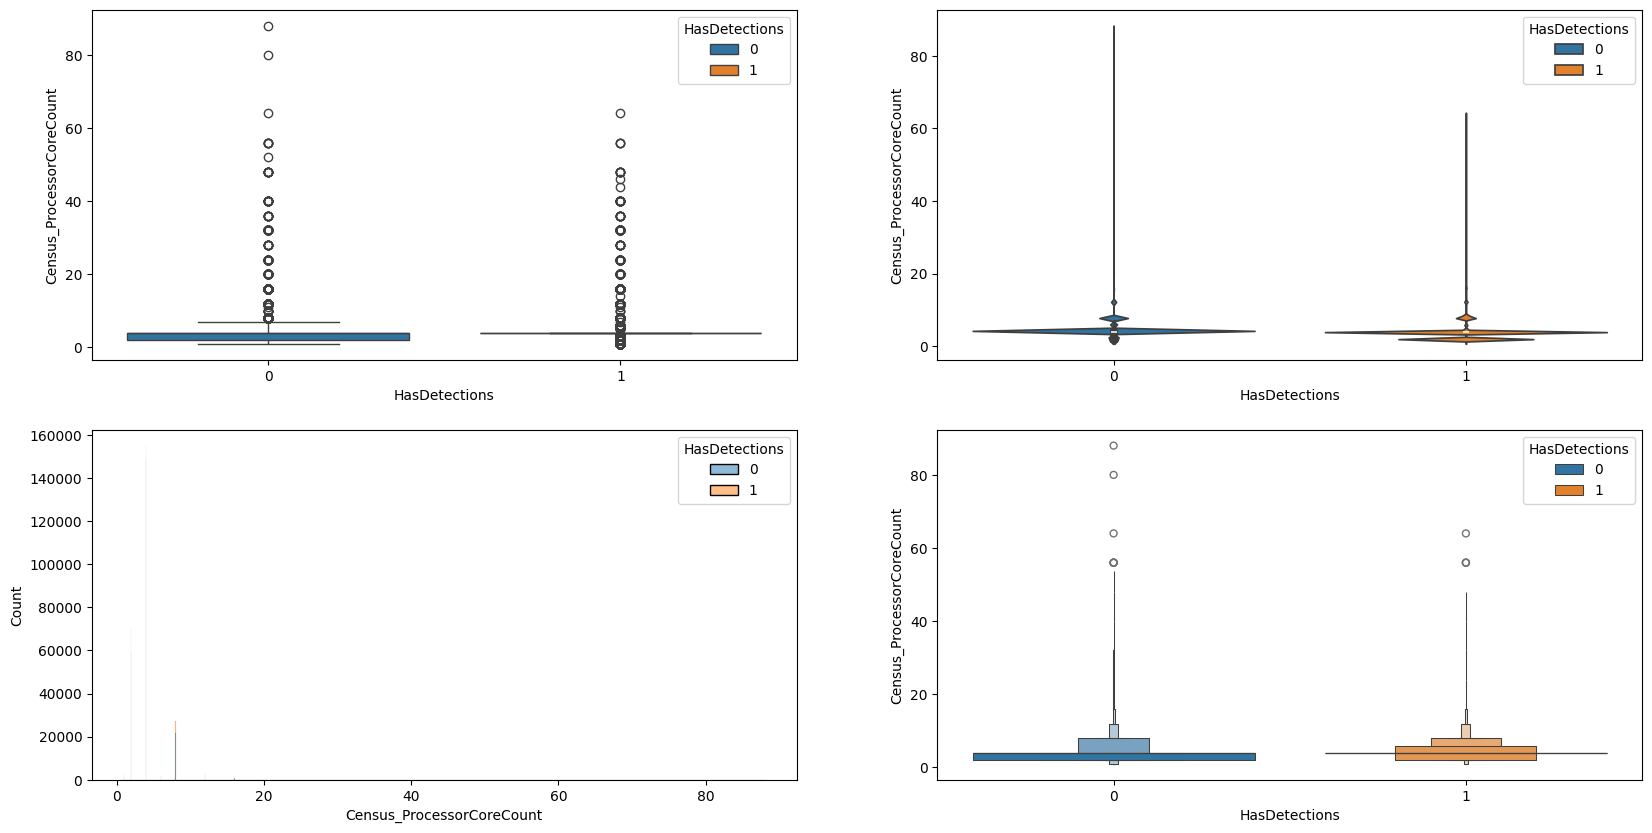

In [144]:
AnalisisAtributo(df,df.columns[36],tar=TARGET)

In [145]:
df['Census_ProcessorCoreCount'].value_counts(dropna=False,normalize=False)

Census_ProcessorCoreCount
4.00     304102
2.00     129178
8.00      48995
12.00      5184
6.00       4023
1.00       3980
NaN        2347
16.00      1006
3.00        752
32.00       113
20.00        97
24.00        95
40.00        39
28.00        17
36.00        16
48.00        15
5.00         10
10.00        10
56.00         8
7.00          3
11.00         2
64.00         2
52.00         1
44.00         1
88.00         1
80.00         1
14.00         1
46.00         1
Name: count, dtype: int64

In [146]:
top3=df['Census_ProcessorCoreCount'].value_counts().index.tolist()[:3]
df['Census_ProcessorCoreCount']=df['Census_ProcessorCoreCount'].apply(lambda x: x if x in top3 else 0)
del(top3)

In [147]:
df['Census_ProcessorCoreCount'].dtype

dtype('float64')

Atributo Numérico
El atributo 'Census_ProcessorCoreCount' tiene 0 valores nulos (0.0%)

Descripción estadístiica:
count   500,000.00
mean          3.73
std           1.76
min           0.00
25%           2.00
50%           4.00
75%           4.00
max           8.00
Name: Census_ProcessorCoreCount, dtype: float64

El atributo tiene 4 valores únicos

TOP 10 porcentaje de valores únicos:
Census_ProcessorCoreCount
4.00   60.82
2.00   25.84
8.00    9.80
0.00    3.55
Name: proportion, dtype: float64


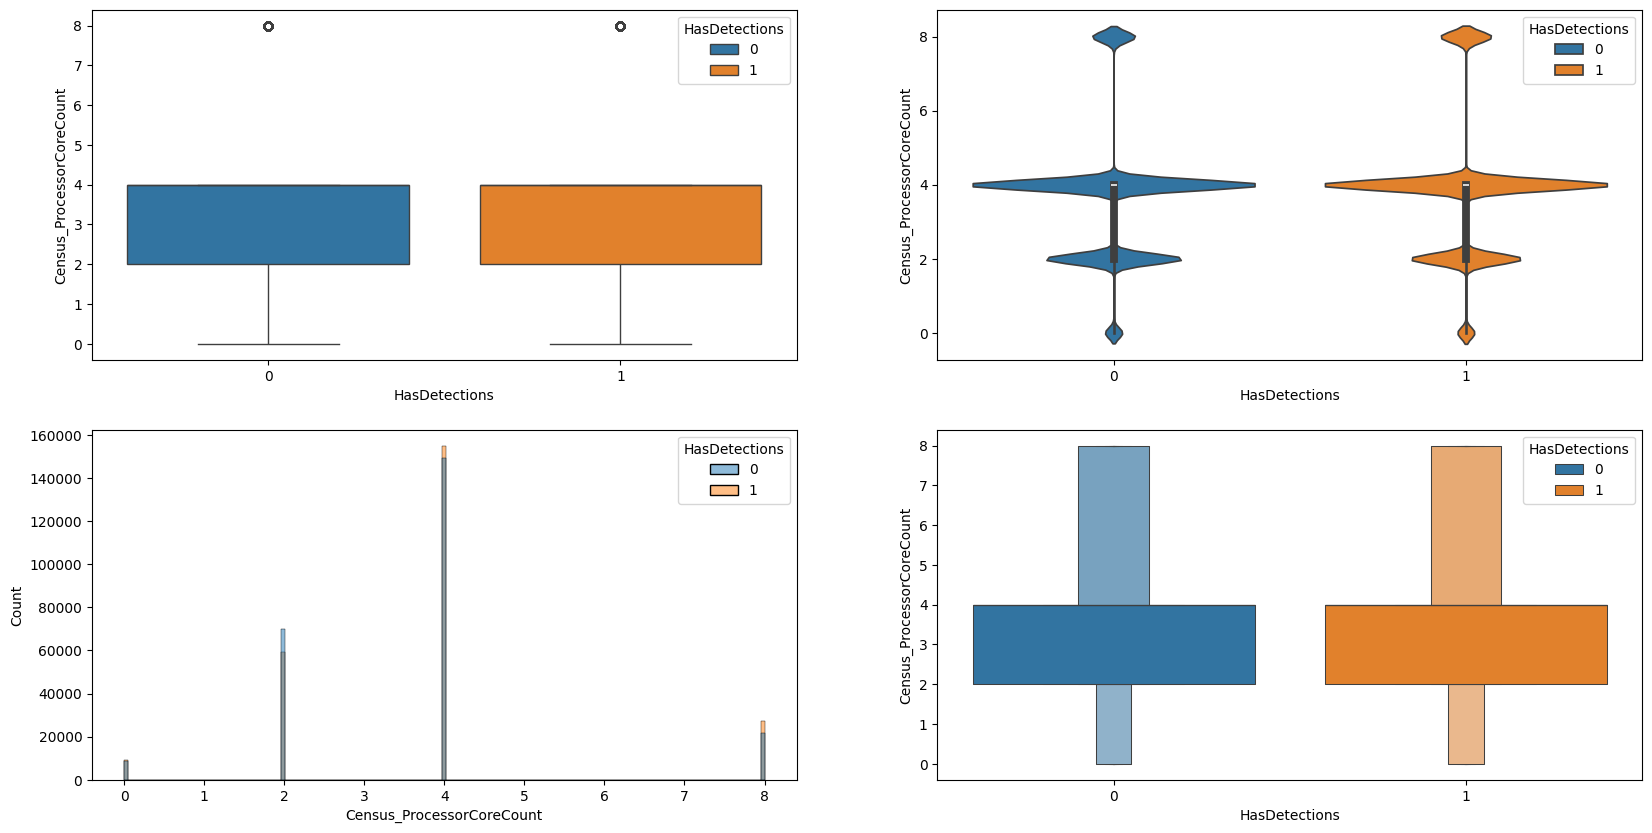

In [148]:
AnalisisAtributo(df,df.columns[36],tar=TARGET)

#### 3.37- Atributo[37] - Census_ProcessorManufacturerIdentifier

Atributo Numérico
El atributo 'Census_ProcessorManufacturerIdentifier' tiene 2347 valores nulos (0.47%)

Descripción estadístiica:
count   497,653.00
mean          4.53
std           1.29
min           1.00
25%           5.00
50%           5.00
75%           5.00
max          10.00
Name: Census_ProcessorManufacturerIdentifier, dtype: float64

El atributo tiene 4 valores únicos

TOP 10 porcentaje de valores únicos:
Census_ProcessorManufacturerIdentifier
5.00    87.81
1.00    11.72
NaN      0.47
10.00    0.00
3.00     0.00
Name: proportion, dtype: float64


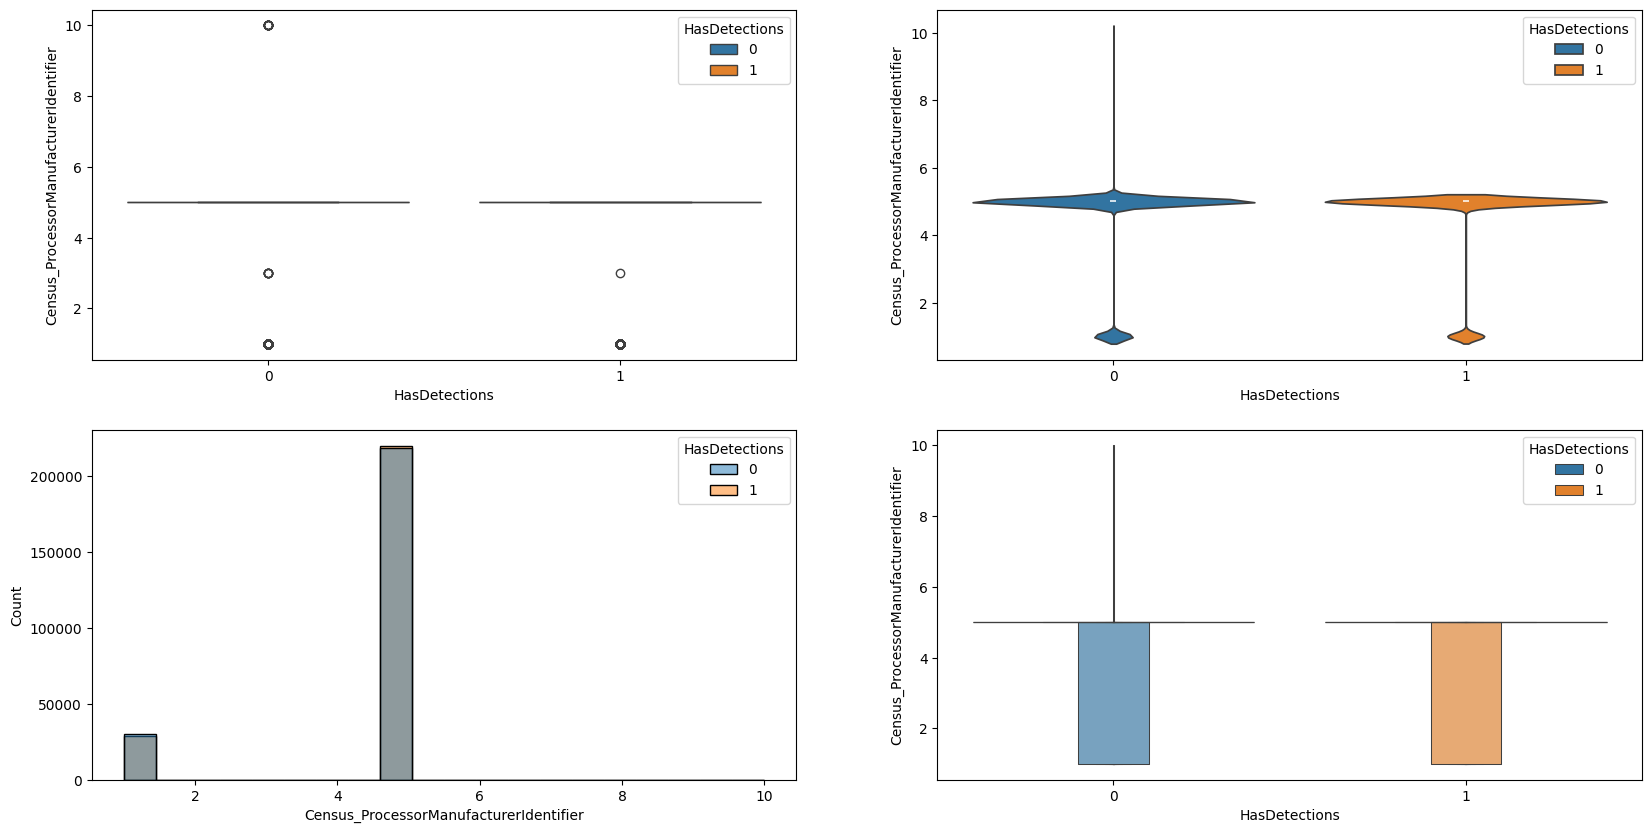

In [149]:
AnalisisAtributo(df,df.columns[37],tar=TARGET)

In [150]:
columns_to_delete.append(df.columns[37])

#### 3.38- Atributo[38] - Census_ProcessorModelIdentifier

Atributo Numérico
El atributo 'Census_ProcessorModelIdentifier' tiene 2349 valores nulos (0.47%)

Descripción estadístiica:
count   497,651.00
mean      2,370.99
std         842.14
min           3.00
25%       1,998.00
50%       2,500.00
75%       2,877.00
max       4,472.00
Name: Census_ProcessorModelIdentifier, dtype: float64

El atributo tiene 2243 valores únicos

TOP 10 porcentaje de valores únicos:
Census_ProcessorModelIdentifier
2,697.00   3.24
1,998.00   2.97
2,660.00   2.15
2,373.00   1.98
1,992.00   1.90
2,382.00   1.90
2,640.00   1.70
2,097.00   1.49
1,985.00   1.48
1,848.00   1.39
Name: proportion, dtype: float64


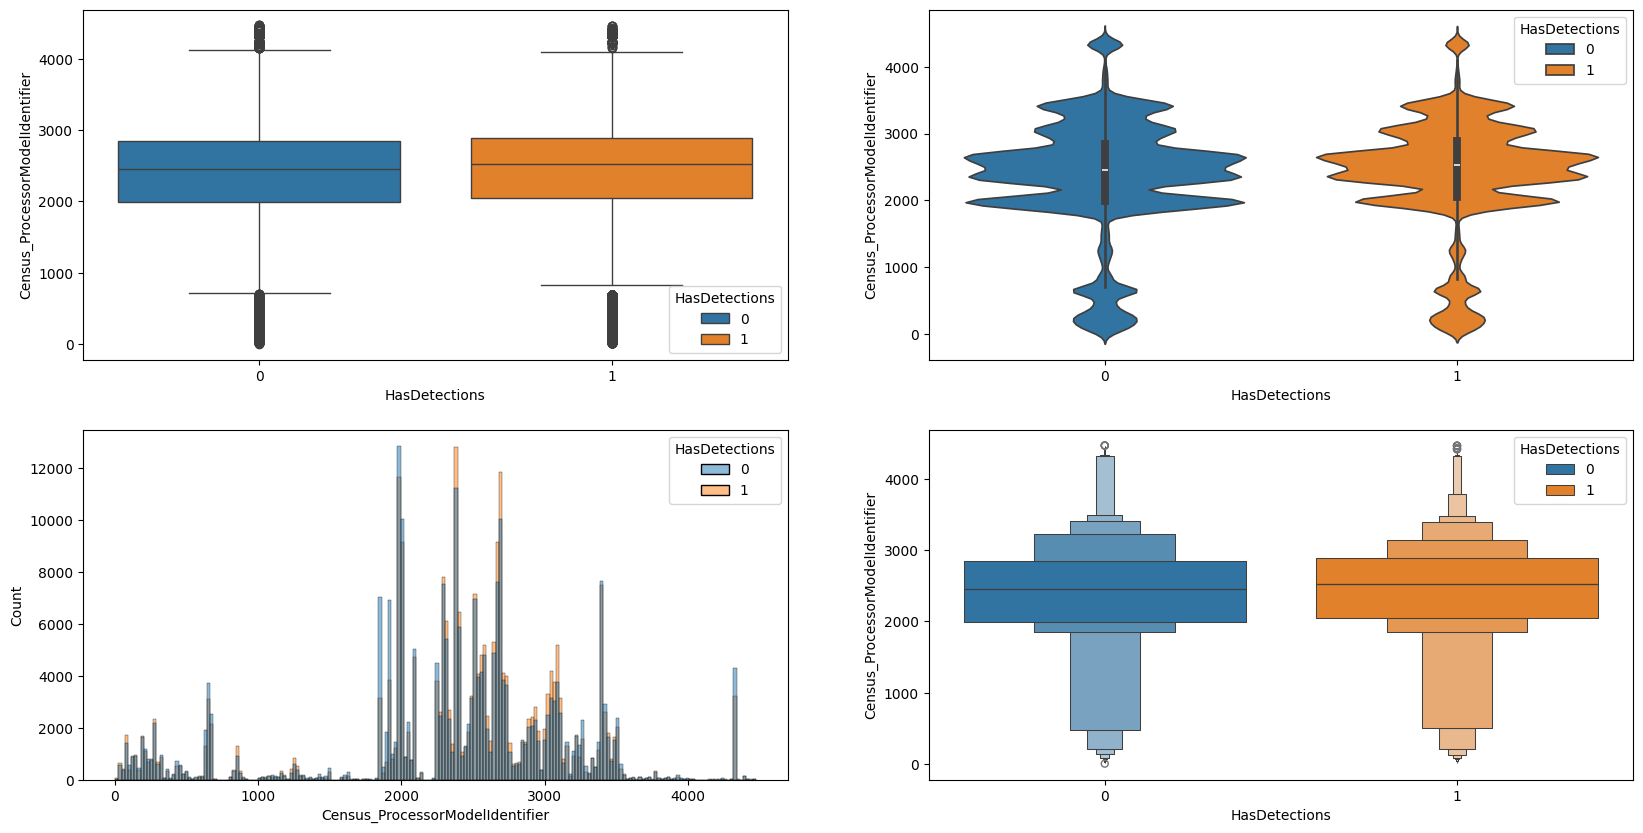

In [151]:
AnalisisAtributo(df,df.columns[38],tar=TARGET)

#### 3.39- Atributo[39] - Census_ProcessorClass

Atributo Categórico
El atributo 'Census_ProcessorClass' tiene 497918 valores nulos (99.58%)

Descripción estadístiica:

count     2082
unique       3
top        mid
freq      1196
Name: Census_ProcessorClass, dtype: object


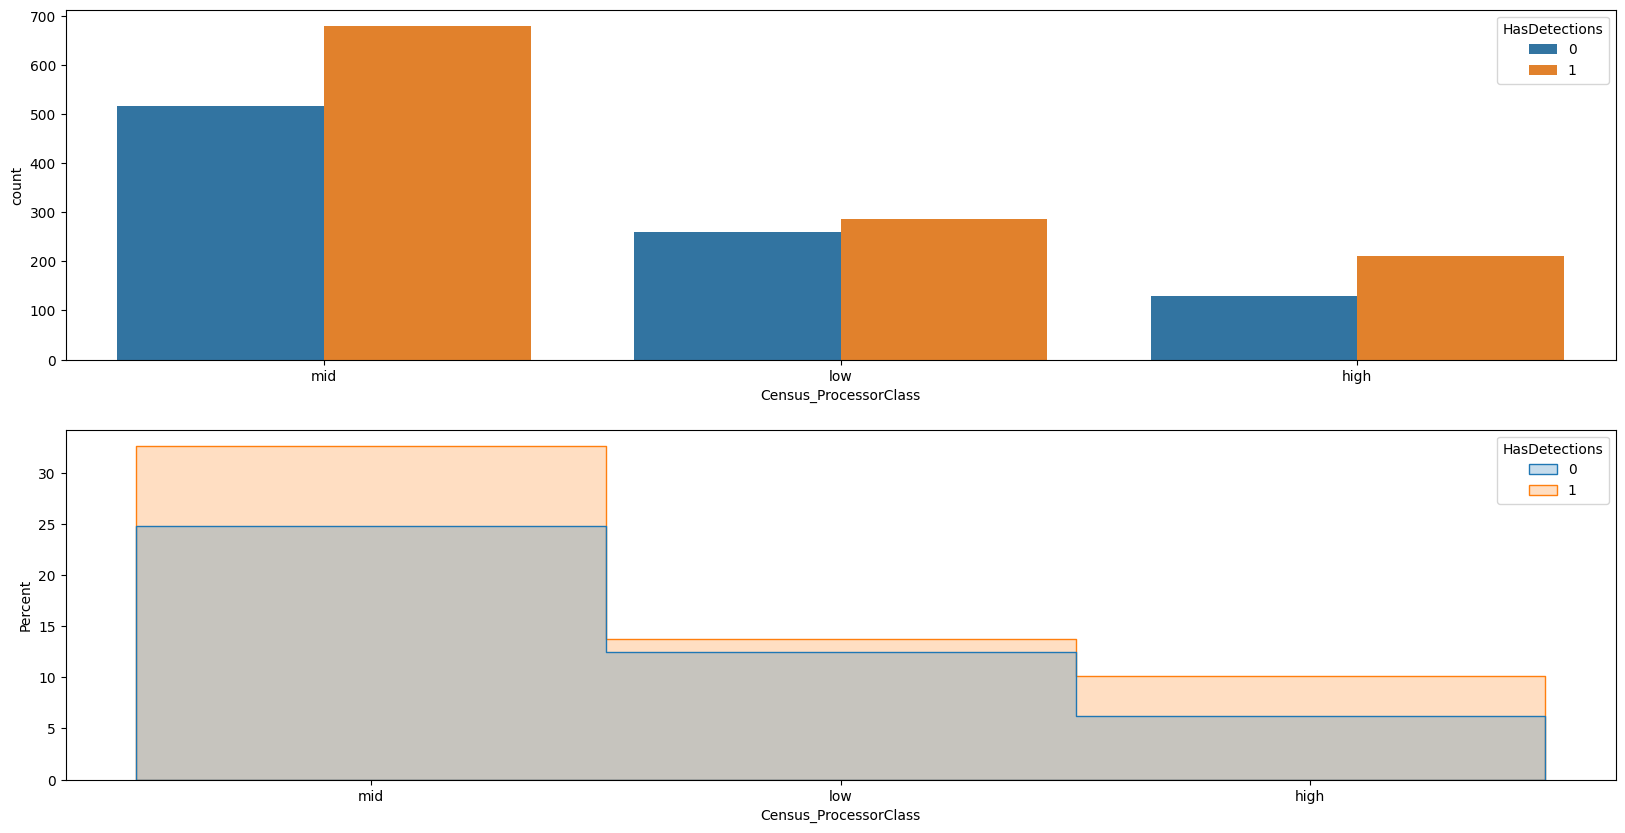

Equipos  Proporcion_Equipos  Infectados  \
Census_ProcessorClass                                            
NaN                     497918               99.58      248776   
mid                       1196                0.24         679   
low                        546                0.11         287   
high                       340                0.07         211   

                       Proporcion_Infectados  
Census_ProcessorClass                         
NaN                                    49.96  
mid                                    56.77  
low                                    52.56  
high                                   62.06

In [152]:
AnalisisAtributo(df,df.columns[39],tar=TARGET)

In [153]:
columns_to_delete.append(df.columns[39])

#### Eliminación de atributos indicados

In [154]:
columns_to_delete

['Census_OSInstallLanguageIdentifier',
 'Census_IsPortableOperatingSystem',
 'Census_IsFlightingInternal',
 'Census_IsFlightsDisabled',
 'Census_FlightRing',
 'Census_ThresholdOptIn',
 'Census_IsWIMBootEnabled',
 'Census_IsVirtualDevice',
 'Census_IsPenCapable',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'IsProtected',
 'AutoSampleOptIn',
 'PuaMode',
 'SMode',
 'SmartScreen',
 'Firewall',
 'UacLuaenable',
 'Census_DeviceFamily',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorClass']

In [155]:
#df.drop(columns_to_delete, axis=1, inplace=True)

# 4.- Conclusiones Univariable

## 4.1.- Numéricas

- **{0} Census_OSInstallLanguageIdentifier** -- _(OS lenguage numerical identifier)_</br> 
 Identificador del idioma del SO codificado dle 1 al 39. Tiene un 0.67% de nulos y una fuerte correlación (0.98) con el siguiente atributo (Census_OSUILocaleIdentifier), el cual no presenta nulos.</br> 
 _[Eliminar atributo]_</br></br>
- **{1} Census_OSUILocaleIdentifier** -- _(Equipment Location numerical identifier)_</br> 
Es numérica pero no tiene sentido ordinal. Cada valor identifica una localización diferente (1-162). Hay muchos equipos entre los valores 20 y 40 que probablemente repesenten localizaciones con mucha densidad de población.</br> 
 _[Se pasa a Int8]_</br></br>
- **{3} Census_IsPortableOperatingSystem** -- _(Indicates whether OS is booted up and running via Windows)_</br> 
 Atributo Boleano. El 99% de los valores son 0 con uan distribución del TARGET del 50% y una std de 0,02. Este atributo no aporta nada al algoritmo. </br> 
_[Eliminar atributo]_</br></br>
- **{6} Census_IsFlightingInternal** -- _(No Description available)_</br> 
 Atributo Boleano. El 99% de los valores son 0. Tiene un 83% de nulos que no hay forma objetiva de imputar. Este atributo no aporta nada al algoritmo. </br> 
_[Eliminar atributo]_</br></br>
- **{7} Census_IsFlightsDisabled** -- _(Indicates if the machine is participating in flighting.)_</br> 
 Atributo Boleano. El 99% de los valores son 0. Tiene un 1.79% de nulos que no hay forma objetiva de imputar. Este atributo no aporta nada al algoritmo. </br> 
_[Eliminar atributo]_</br></br>
- **{9} Census_ThresholdOptIn** -- _(No Description available)_</br> 
 Atributo Boleano. El 99% de los valores son 0. Tiene un 63.62% de nulos que no hay forma objetiva de imputar. Este atributo no aporta nada al algoritmo. </br> 
_[Eliminar atributo]_</br></br>
- **{10} Census_FirmwareManufacturerIdentifier** -- _(No Description available)_</br> 
Categoría NO ordinal con 2% de nulos. Tiene 303 valores únicos, muchos de ellos con una unica representación en la muestra.  Por debajo del TOP4, la representación de cada variable es inferior a 10%. Por debajo del 10% de la muestra, se les asigna el valor 0 para quedarnos con un TOP5.</br> 
_[Nulos imputados con 0 y minoritarias agrupadas en 0]_</br></br>
- **{11} Census_FirmwareVersionIdentifier** -- _(No Description available)_</br> 
Categoría NO ordinal con 1.8% de nulos. No hay correlación con el atributo anterior. Al tratarse de versiones, saldrían demasiadas variables para un OHE. Imputaremos los nulos con la moda y agrupamos por número inicial de versión.  
_[Nulos imputados con moda, pasado a Int64 y agrupación por numero inicial de version]_</br></br>
- **{12} Census_IsSecureBootEnabled** -- _(Indicates if Secure Boot mode is enabled.)_</br> 
Atributo Boleano. Distribución 50/50.   
_[Ningún cambio]_</br></br>
- **{13} Census_IsWIMBootEnabled** -- _(No Description available)_</br> 
Todos los valores son 0 con el Target distribuido 50/50. Tiene un 63.5% de nulos. NO aporta nada. </br> 
_[Eliminar atributo]_</br></br>
- **{14} Census_IsVirtualDevice** -- _(Identifies a Virtual Machine)_</br> 
Atributo Boleano. Sólo tiene un 0.18% de nulos pero la distribución del atributo está repartida en un 99/1% (el 99% de la muestra no es una maquina virtual) pese a que el targuet esté 50/50. NO aporta nada al algoritmo.</br> 
_[Eliminar atributo]_</br></br>
- **{15} Census_IsTouchEnabled** -- _(Is this a touch device ?)_</br> 
Atributo Boleano. La muestra está repartida en una proporción dle 87/12%, no tiene nulos y el target tiene proporción 50/50.</br> 
_[Ningún cambio]_</br></br>
- **{16} Census_IsPenCapable** -- _(Is the device capable of pen input ?)_</br> 
Atributo Boleano. La muestra está repartida en una proporción dle 96/4%, no tiene nulos y el target tiene proporción 50/50. Demasiada diferencia en el muestreo.</br> 
_[Eliminar atributo]_</br></br>
- **{17} Census_IsAlwaysOnAlwaysConnectedCapable** -- _(Retreives information about whether the battery enables the device to be AlwaysOnAlwaysConnected.)_</br> 
Atributo Boleano. La muestra está repartida en una proporción dle 95/5%, tiene un 1% de nulos y el target tiene proporción 50/50.</br> 
_[Eliminar atributo]_</br></br>
- **{18} Wdft_IsGamer** -- _(Indicates whether the device is a gamer device or not based on its hardware combination.)_</br> 
Atributo Boleano. La muestra está repartida en una proporción del 71/28, tiene un 3.4% de nulos y el target tiene proporción 50/50. Imputamos le valor mínimo (0) ya que por lo generla, los equipos gamer suelen llevar software dedicado para identificación de Hardware. Si asumimos que el nulo es que no ha podido identificar el Hardware, podemos asumir también que el equipo, porbablemente no sea Gamer </br> 
_[Imputamos el valor minimo]_</br></br>
- **{19} Wdft_RegionIdentifier** -- _(No Description available)_</br> 
Es numérica pero no tiene sentido ordinal. Tiene un 3.4% de nulos y el target tiene proporción 50/50.Se imputa la moda. Hay variables con una representación inferior al 1%. Todas las inferiores al 10% se agrupan en un nevo conjunto denaminado 0.</br> 
_[Imputamos moda y agrupar por debajo del 10% para un top 6]_</br></br>
- **{20} OsSuite** -- _(No Description available)_</br> 
Es numérica pero no tiene sentido ordinal. No tiene nulos. Tiene sólo 9 valores diferentes; el 96% de la muestra se encuentran distribuida en 5 valores. Agrupamos todas las demás muestras en el valor 0</br> 
_[Agrupamos muestras pequeñas con etiqueta 0]_</br></br>
- **{24} IsProtected** -- _(This is a calculated field derived from the Spynet Report's AV Products field. Returns: a. TRUE if there is at least one active and up)_</br> 
Atributo Boleano. Tiene 1926 nulos (0.39%). El 95% de la muestra recae en 1. Teniendo en cuenta que no podemos imputar nulos de forma objetiva y el sesgo de la muestra, decidimos eliminarla.</br> 
_[Eliminar atributo]_</br></br>
- **{25} AutoSampleOptIn** -- _(This is the SubmitSamplesConsent value passed in from the service, available on CAMP 9+)_</br> 
Atributo Boleano. Sólo tiene 14 entradas con valor 0. Se elimina.</br> 
_[Eliminar atributo]_</br></br>
- **{27} SMode** -- _(This field is set to true when the device is known to be in 'S Mode', as in, Windows 10 S mode, where only Microsoft Store apps can be installed)_</br> 
Atributo Boleano. Tiene un 6% de nulos. 99,6%  de la muestra en 0. Se elimina.</br> 
_[Eliminar atributo]_</br></br>
- **{28} IeVerIdentifier** -- _(No Description available)_</br> 
Hace referencia a versiones de IE. 0.64% de nulos. 99,6%  de la muestra en 0. 60% de la representación en 4 variables. Hacemos un TOP6 unificando las veriones minoritarias y los nulos en la verion 0. </br> 
_[Agrupamos muestras pequeñas con etiqueta 0]_</br></br>
- **{30} Firewall** -- _(This attribute is true (1) for Windows 8.1 and above if windows firewall is enabled, as reported by the service.)_</br> 
El 97% de la muestra está en unmismo atributo. Tiene un 1% de nulos. Lo eliminamos. </br> 
_[Eliminar atributo]_</br></br>
- **{31} UacLuaenable** -- _(This attribute reports whether or not the "administrator in Admin Approval Mode" user type is disabled or enabled in UAC.)_</br> 
El 99.26% de la muestra está en unmismo atributo. Tiene un 0.12% de nulos. Lo eliminamos. </br> 
_[Eliminar atributo]_</br></br>
- **{34} Census_OEMNameIdentifier** -- _(No Description available)_</br> 
Es numérica pero no tiene sentido ordinal. Tiene 1589 valores únicos, un 1% de nulos. Agrupamos en versión 0 todos los atributos con menos de 10000 entradas creando un Top11. </br> 
_[Agrupar Nulos y minoritarias en 0]_</br></br>
- **{35} Census_OEMModelIdentifier** -- _(No Description available)_</br> 
Es numérica pero no tiene sentido ordinal. Tiene 40697 valores únicos, un 1.15% de nulos. Muestra muy repartida. La variable con más peso representa un 3.24% de la muestra (17000 entradas). Imputamos los nulos con la moda al no ser ordinal. Si introduce ruido al modelo se elimina. </br> 
_[Imputar nulos cocon Moda y si introduce ruido al modelo, eliminar]_</br></br>
- **{36} Census_ProcessorCoreCount** -- _(Number of logical cores in the processor)_</br> 
Es numérica con sentido ordinal. Tiene 27 valores únicos y un 0.47% de nulos. El 90% de la muestra se reparte en 3 atributos. Agruparemos las minoritarias y los nulos en la categoría 0. </br> 
_[Agrupamos minoritarios y nulos en 0]_</br></br>
- **{37} Census_ProcessorManufacturerIdentifier** -- _(No Description available)_</br> 
Es numérica pero no tiene sentido ordinal. Muestra poco distribuida con target 50/50. No aporta información. Se elimina. </br> 
_[Eliminar atributo]_</br></br>
- **{38} Census_ProcessorModelIdentifier** -- _(No Description available)_</br> 
Es numérica pero no tiene sentido ordinal. Imputamos nulos ocn Moda la no ser ordinal. </br> 
_[Imputar nulos con Moda]_</br></br>

## 4.2.- Categóricas

- **{2} Census_OSWUAutoUpdateOptionsName** -- _(Friendly name of the WindowsUpdate auto)_</br> 
 Las categorías 'Off','DownloadNotify' y 'AutoInstallAndRebootAtMaintenanceTime' Son muy pequeñas en comparación a las otras 3. Como ya existe la categoría UNKWNON, las agrupamos. </br> 
 _[Agrupar categorias minoritarias en 'UNKNOWN' ya existente]_</br></br>
 - **{4} Census_GenuineStateName** -- _(Friendly name of OSGenuineStateID. 0 = Genuine)_</br> 
 La variable 'IS_GENUINE' agrupa 88,3% de los casos con uan distribución dle TARGET del 49,9%. La variable 'INVALID_LICENSE' representa un 9% de la muestra, mientras que las otras 2 juntas representan menos de un 3%.</br>
 _[Agrupamos variables minoritarias en 'INVALID_LICENSE]_</br></br>
 - **{5} Census_ActivationChannel** -- _(Retail license key or Volume license key for a machine.)_</br> 
 Hay 6 variables diferentes. 2 hacen referencia a 'Retail', 2 a 'OEM' y 2 a 'Volume. Por separado algunos subgrupos representan menos del 0.1%</br> 
 _[Se agrupan los subgupos de cada categoria]_</br></br>
  - **{8} Census_FlightRing** -- _( The ring that the device user would like to receive flights for. This might be different from the ring of the OS which is currently installed if the user changes the ring after getting a flight from a different ring.)_</br> 
 La variable 'Retail' tiene el 93,6% de los registros con una distribución del TARGET del 50%. Las otras 7 variables acumulan un 0.6% de la muestra con la misma distribución de TARGET. La variable 'Retail tiene demasiada presencia y no va a aportar nada al algoritmo.</br> 
 _[Eliminar atributo]_</br></br>
 - **{21} OsPlatformSubRelease** -- _(Returns the OS Platform sub)_</br> 
Hay 9 categorías únicas. La categoría 'prers5' representa un 0.23% de la muestra con una 44/56 % de distribución del target. Como hace referncia a versiones previas a la versión de W10 de Octubre del 2018, la agruparemos con la versión rs1</br> 
_[Agrupamos prers5 con rs1]_</br></br>
 - **{22} OsBuildLab** -- _(Build lab that generated the current OS. Example: 9600.17630.amd64fre.winblue_r7.150109)_</br> 
Hay 453 categorías únicas. Hay 1 nulo. El 70% de la muestra queda representado por 4 categorías diferentes. El resto tienen una representación inferior al 2%. Las que representan menos del 2% se agrupan en 'Other'</br> 
_[Agrupamos en 'Other' por debajo del 2% de representación]_</br></br>
 - **{23} SkuEdition** -- _(The goal of this feature is to use the Product Type defined in the MSDN to map to a 'SKU)_</br> 
Hay 8 categorías únicas. El 98% de la muestra restá representado por las versiones 'Pro' y 'Home'. Las otras 6 categorías representan menos de un 1% por separado. Se agrupan en 'Other'</br> 
_[Agrupamos en 'Other' las categorias minoritarias]_</br></br>
 - **{23} PuaMode** -- _(Pua Enabled mode from the service)_</br> 
Tiene un 99.97% de nulos. Se elimina</br> 
_[Eliminar atributo]_</br></br>
 - **{29} SmartScreen** -- _(This is the SmartScreen enabled string value from registry. If the value exists but is blank, the value "ExistsNotSet" is sent in telemetry.)_</br> 
Atributo con 35.7% de nulos y distribución muy sesgada. Se elimina.</br> 
_[Eliminar atributo]_</br></br>
 - **{32} Census_MDC2FormFactor** -- _(A grouping based on a combination of Device Census level hardware characteristics. The logic used to define Form Factor is rooted in business and industry standards and aligns with how people think about their device.)_</br> 
Sin nulos. 85% de la muestra repartido en 2 atributos. El resto de atributos se agrupan en 'Other'.</br> 
_[Agrupar minoritarios en 'Other']_</br></br>
 - **{33} Census_DeviceFamily** -- _(AKA DeviceClass. Indicates the type of device that an edition of the OS is intended for.)_</br> 
Sin nulos. 99.84% de la muestra en 1 atributo cona distribución del target del 50%. Se elimina.</br> 
_[Eliminar atributo]_</br></br>
 - **{39} Census_ProcessorClass** -- _(A classification of processors into high/medium/low. Initially used for Pricing Level SKU. No longer maintained and updated)_</br> 
Tiene un 99% de nulos y la descripción indica que no se mantiene actualizada. Se elimina.</br> 
_[Eliminar atributo]_</br></br>